In this notebook I gather the data summary for the knobs construction using OMP as a feature selection tool.

In this study I use weights evaluated with OMP as initial settings for the model training.

In [1]:
import placetmachine as pl
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import os
import random
import pandas as pd

from sklearn.inspection import permutation_importance

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, OrthogonalMatchingPursuit, LassoLars, Lars

from functools import reduce

from sklearn.decomposition import PCA


In [2]:
def gather_data3(folder, supress_output = False):
    data = []
    _start, _end = 0, 2062

    feature_id = _start
    
    for i, filename in enumerate(os.listdir(folder)):
        with open(os.path.join(folder, filename), 'rb') as file:
            row_data = pk.load(file)

            data.append(row_data)
    if not supress_output:
        print(f"Found {i + 1} files.")
    
    res = pd.DataFrame(data)
    return res

In [16]:
FOLDER = "data/learning_storage/forward_backward/Y1_omp"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
21  regularizer_mod_5_4  5.000000e-07           1   
23  regularizer_mod_5_4  5.000000e-07           2   
5   regularizer_mod_5_4  5.000000e-07           3   
57  regularizer_mod_5_4  5.000000e-07           4   
7   regularizer_mod_5_4  5.000000e-07           5   
48  regularizer_mod_5_4  5.000000e-07           6   
36  regularizer_mod_5_4  5.000000e-07           7   
20  regularizer_mod_5_4  5.000000e-07           8   
55  regularizer_mod_5_4  5.000000e-07           9   
16  regularizer_mod_5_4  5.000000e-07          10   
29  regularizer_mod_5_4  5.000000e-07          11   
4   regularizer_mod_5_4  5.000000e-07          12   
44  regularizer_mod_5_4  5.000000e-07          13   
33  regularizer_mod_5_4  5.000000e-07          14   
54  regularizer_mod_5_4  5.000000e-07          15   
46  regularizer_mod_5_4  5.000000e-07          16   
18  regularizer_mod_5_4  5.000000e-07          17   
1   regularizer_mod_5_4  5.000

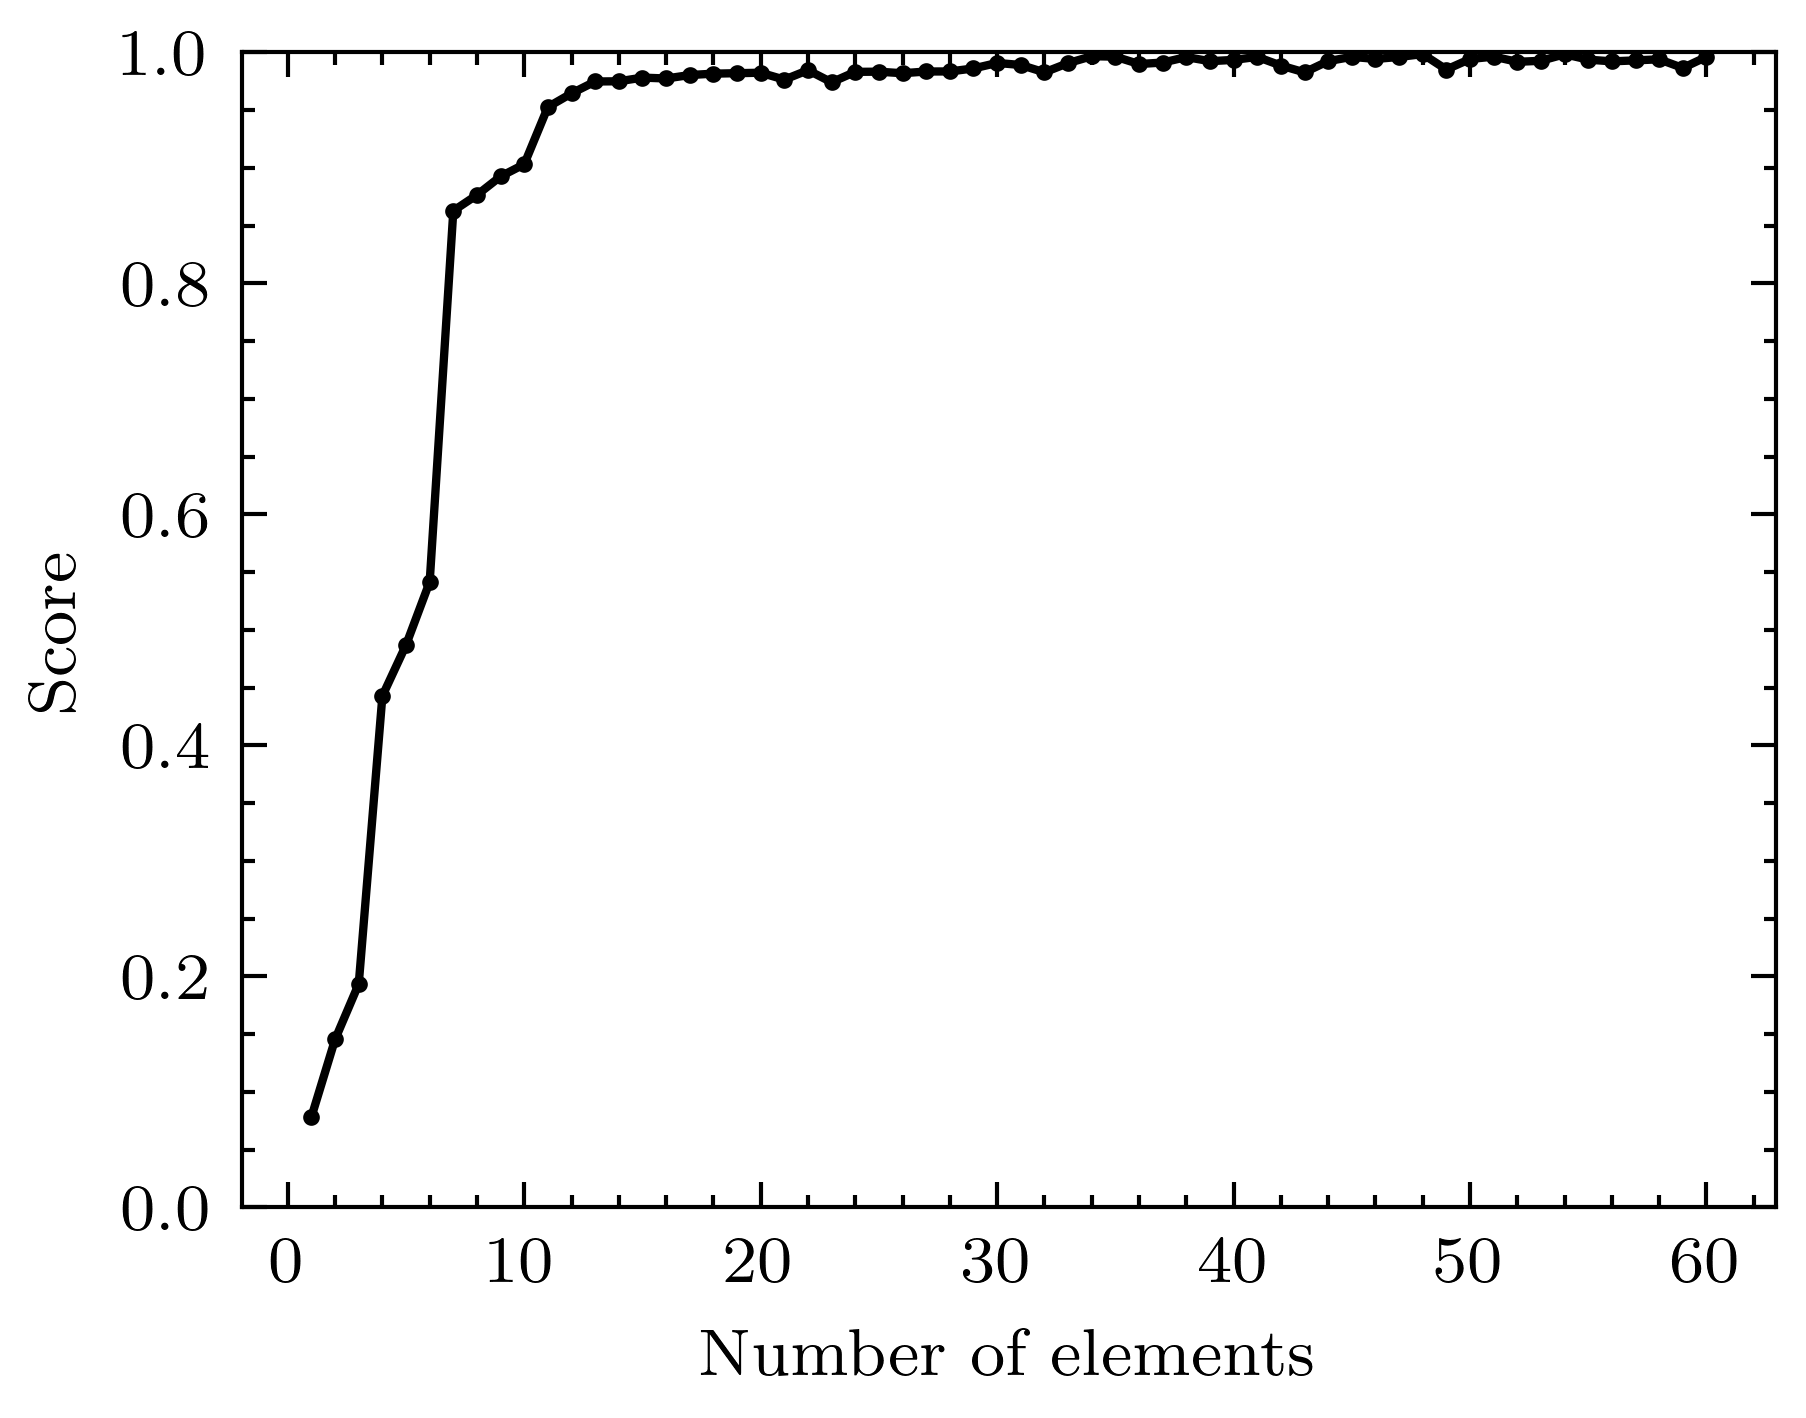

In [17]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

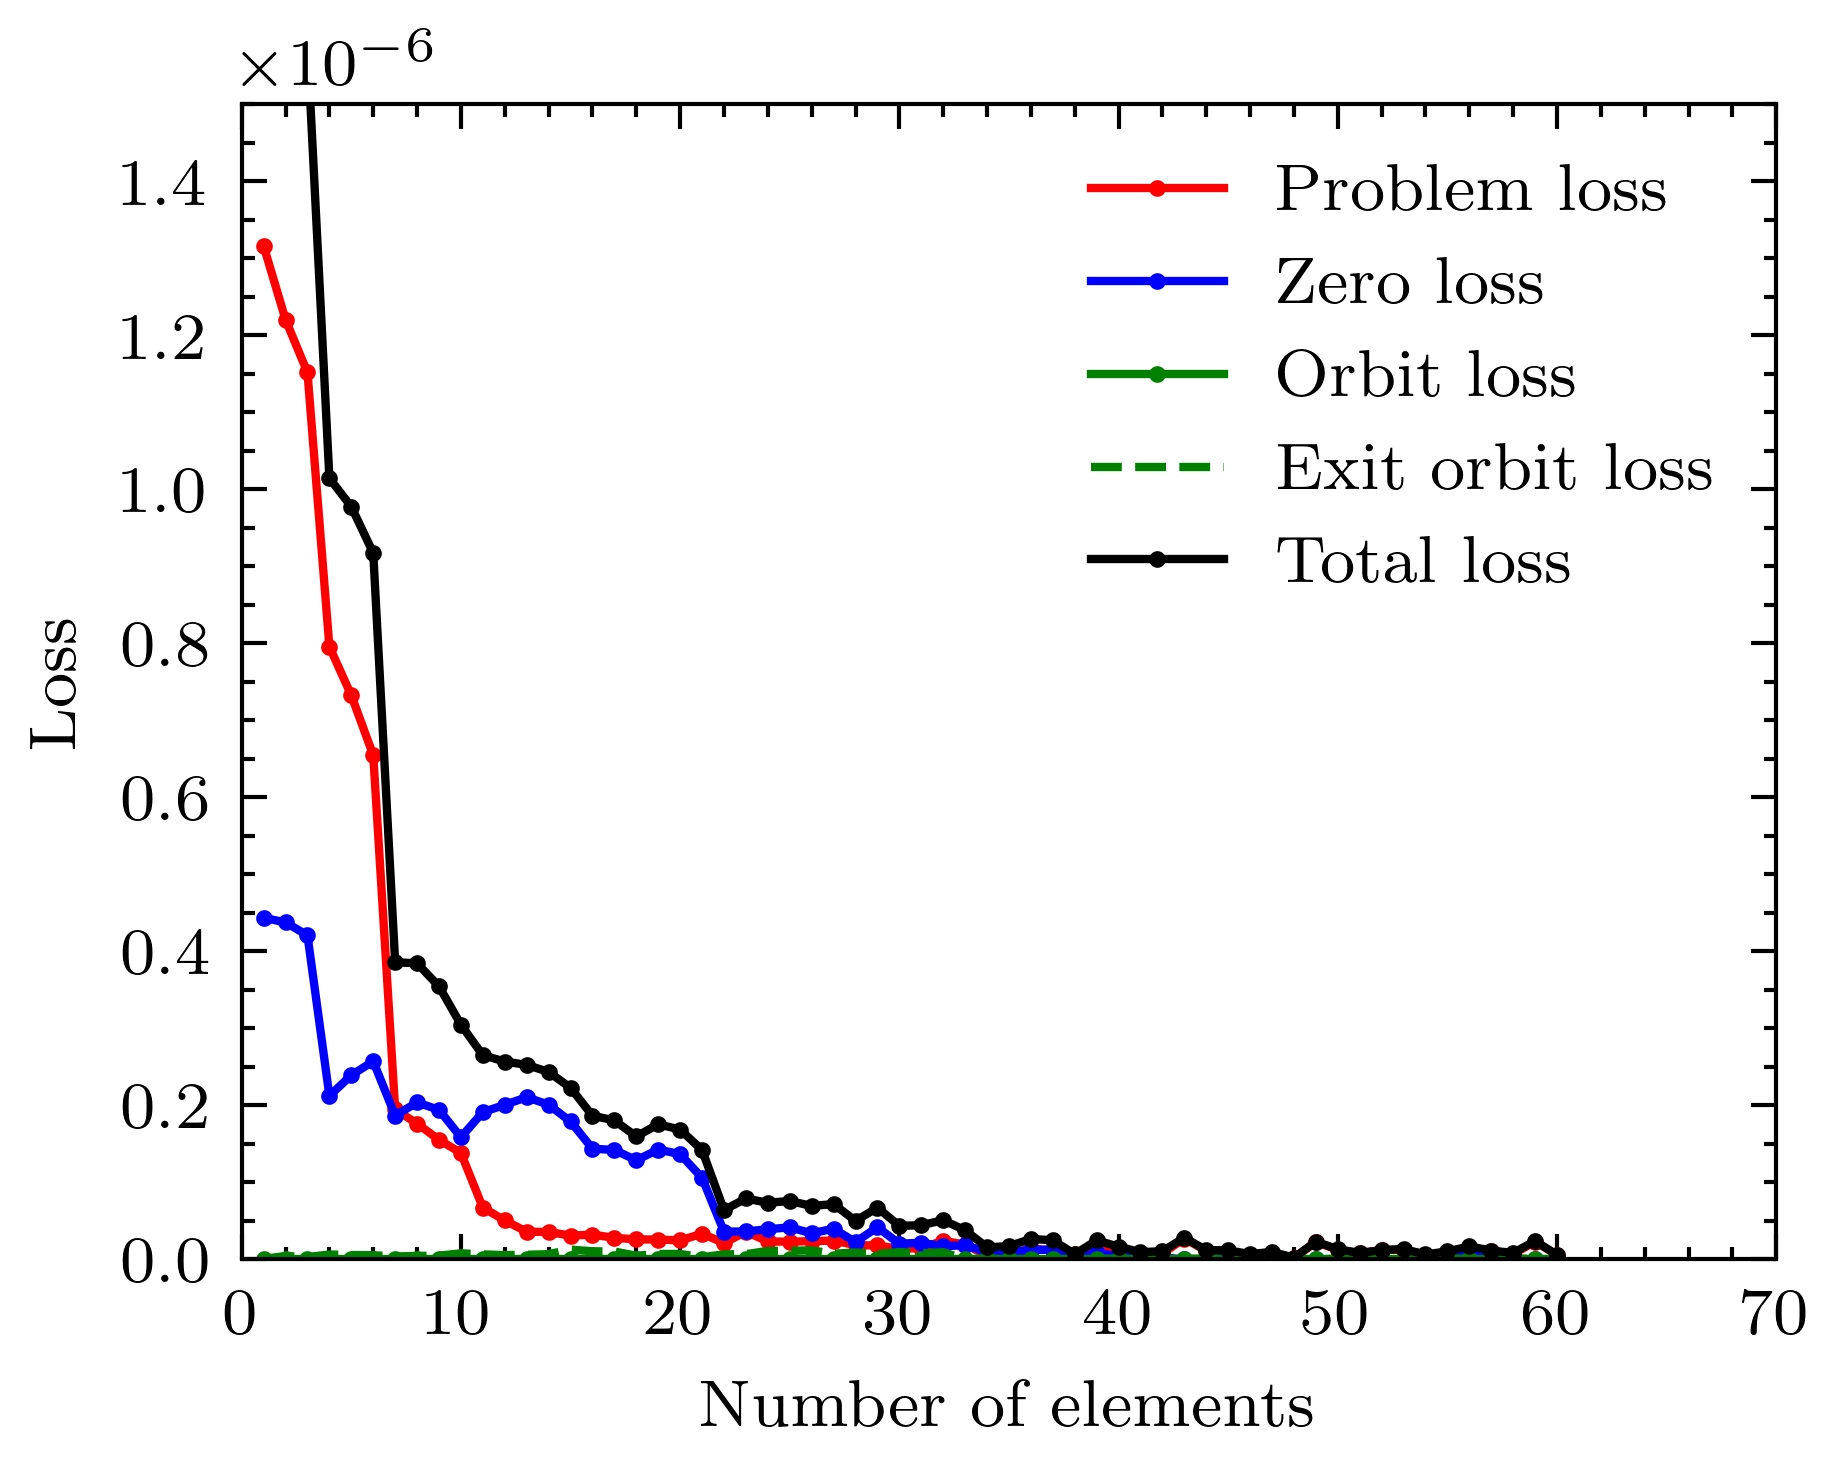

In [18]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y2**

In [20]:
FOLDER = "data/learning_storage/forward_backward/Y2_omp"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
53  regularizer_mod_5_4  5.000000e-07           1   
31  regularizer_mod_5_4  5.000000e-07           2   
52  regularizer_mod_5_4  5.000000e-07           3   
25  regularizer_mod_5_4  5.000000e-07           4   
15  regularizer_mod_5_4  5.000000e-07           5   
34  regularizer_mod_5_4  5.000000e-07           6   
50  regularizer_mod_5_4  5.000000e-07           7   
6   regularizer_mod_5_4  5.000000e-07           8   
41  regularizer_mod_5_4  5.000000e-07           9   
43  regularizer_mod_5_4  5.000000e-07          10   
49  regularizer_mod_5_4  5.000000e-07          11   
40  regularizer_mod_5_4  5.000000e-07          12   
56  regularizer_mod_5_4  5.000000e-07          13   
7   regularizer_mod_5_4  5.000000e-07          14   
59  regularizer_mod_5_4  5.000000e-07          15   
46  regularizer_mod_5_4  5.000000e-07          16   
33  regularizer_mod_5_4  5.000000e-07          17   
4   regularizer_mod_5_4  5.000

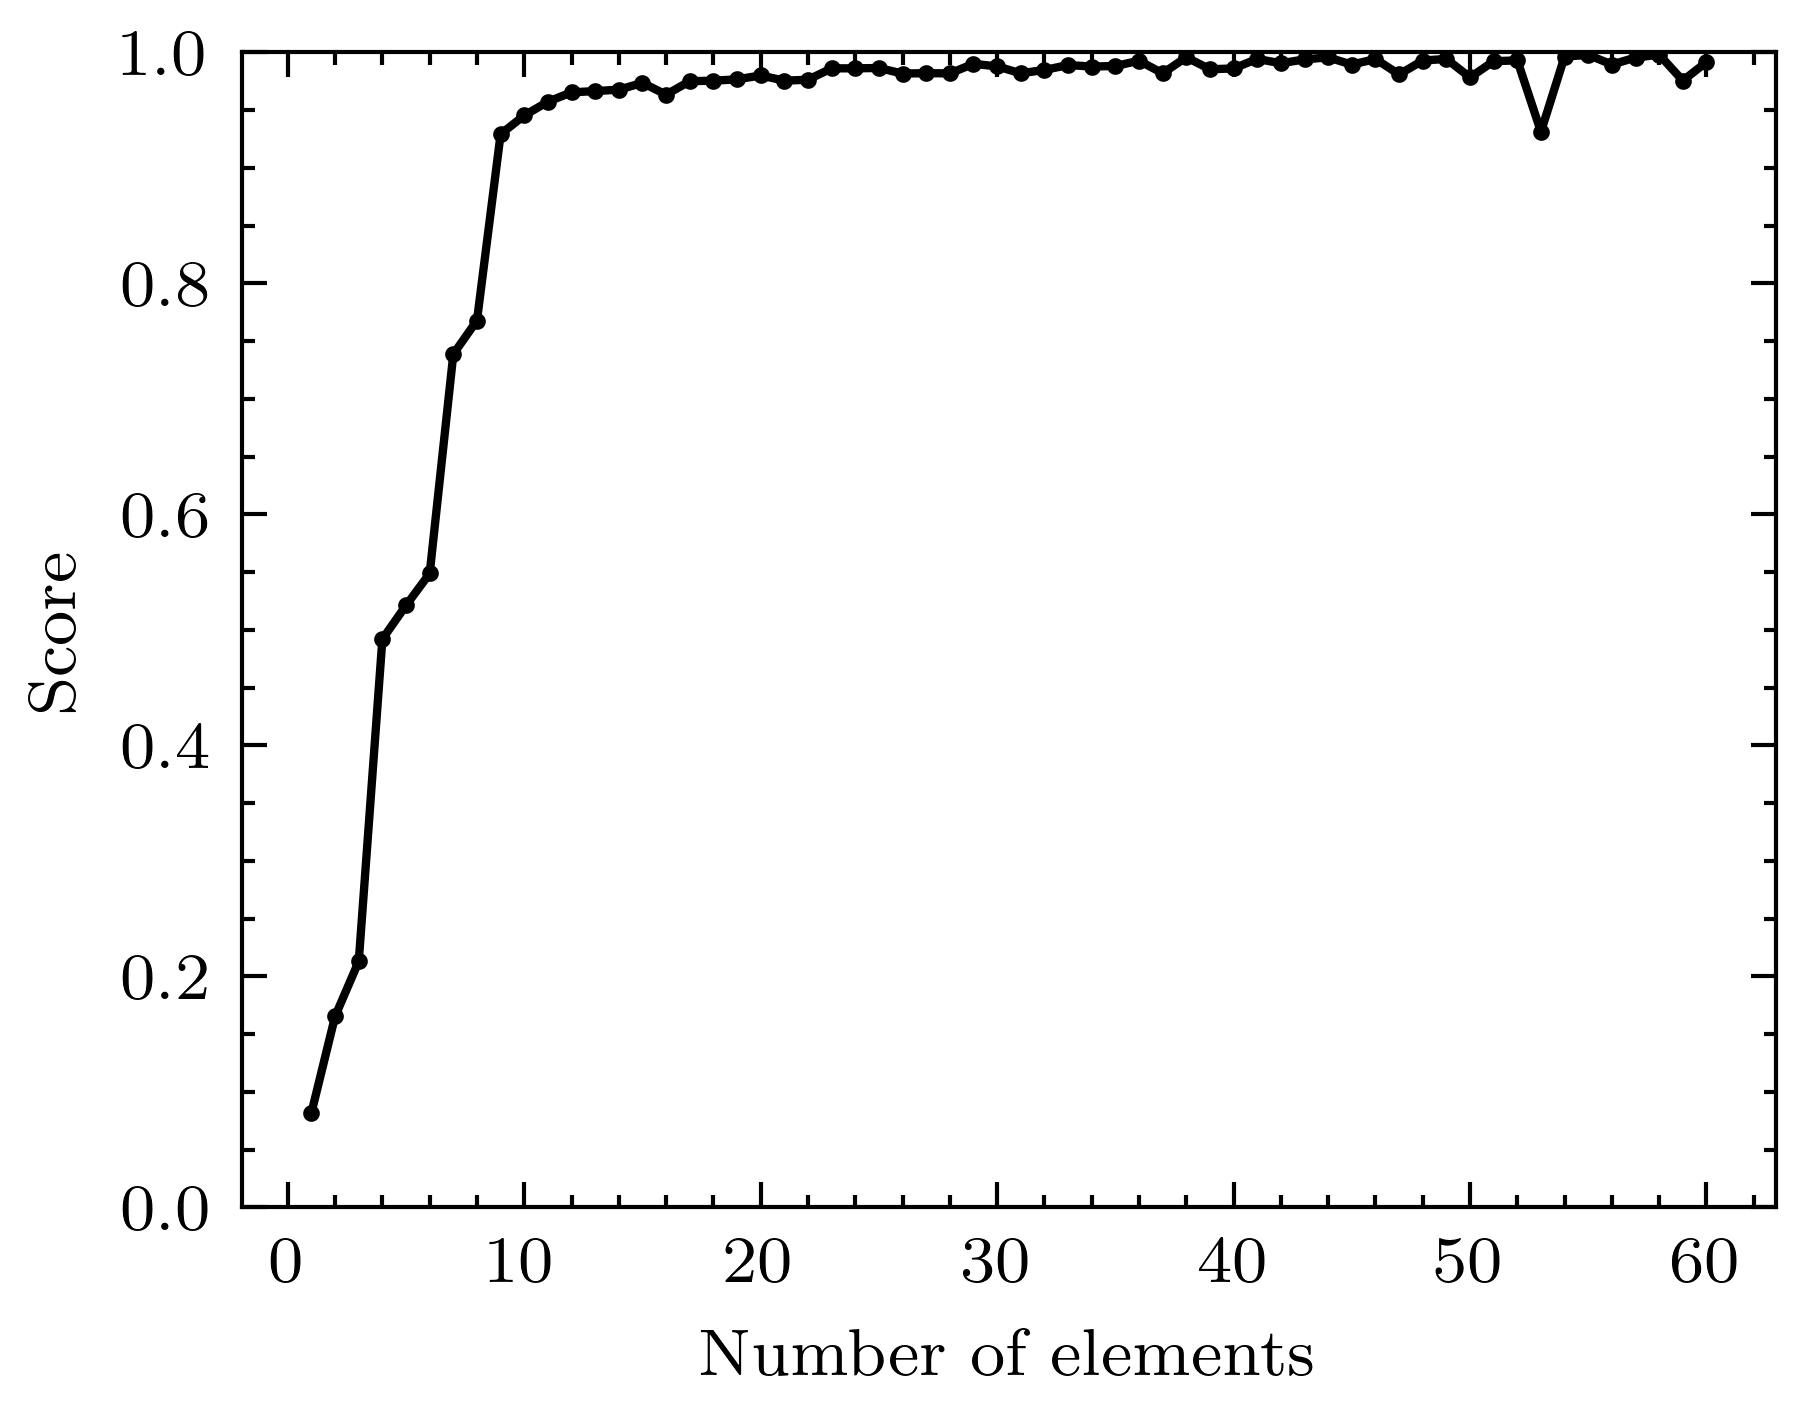

In [21]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

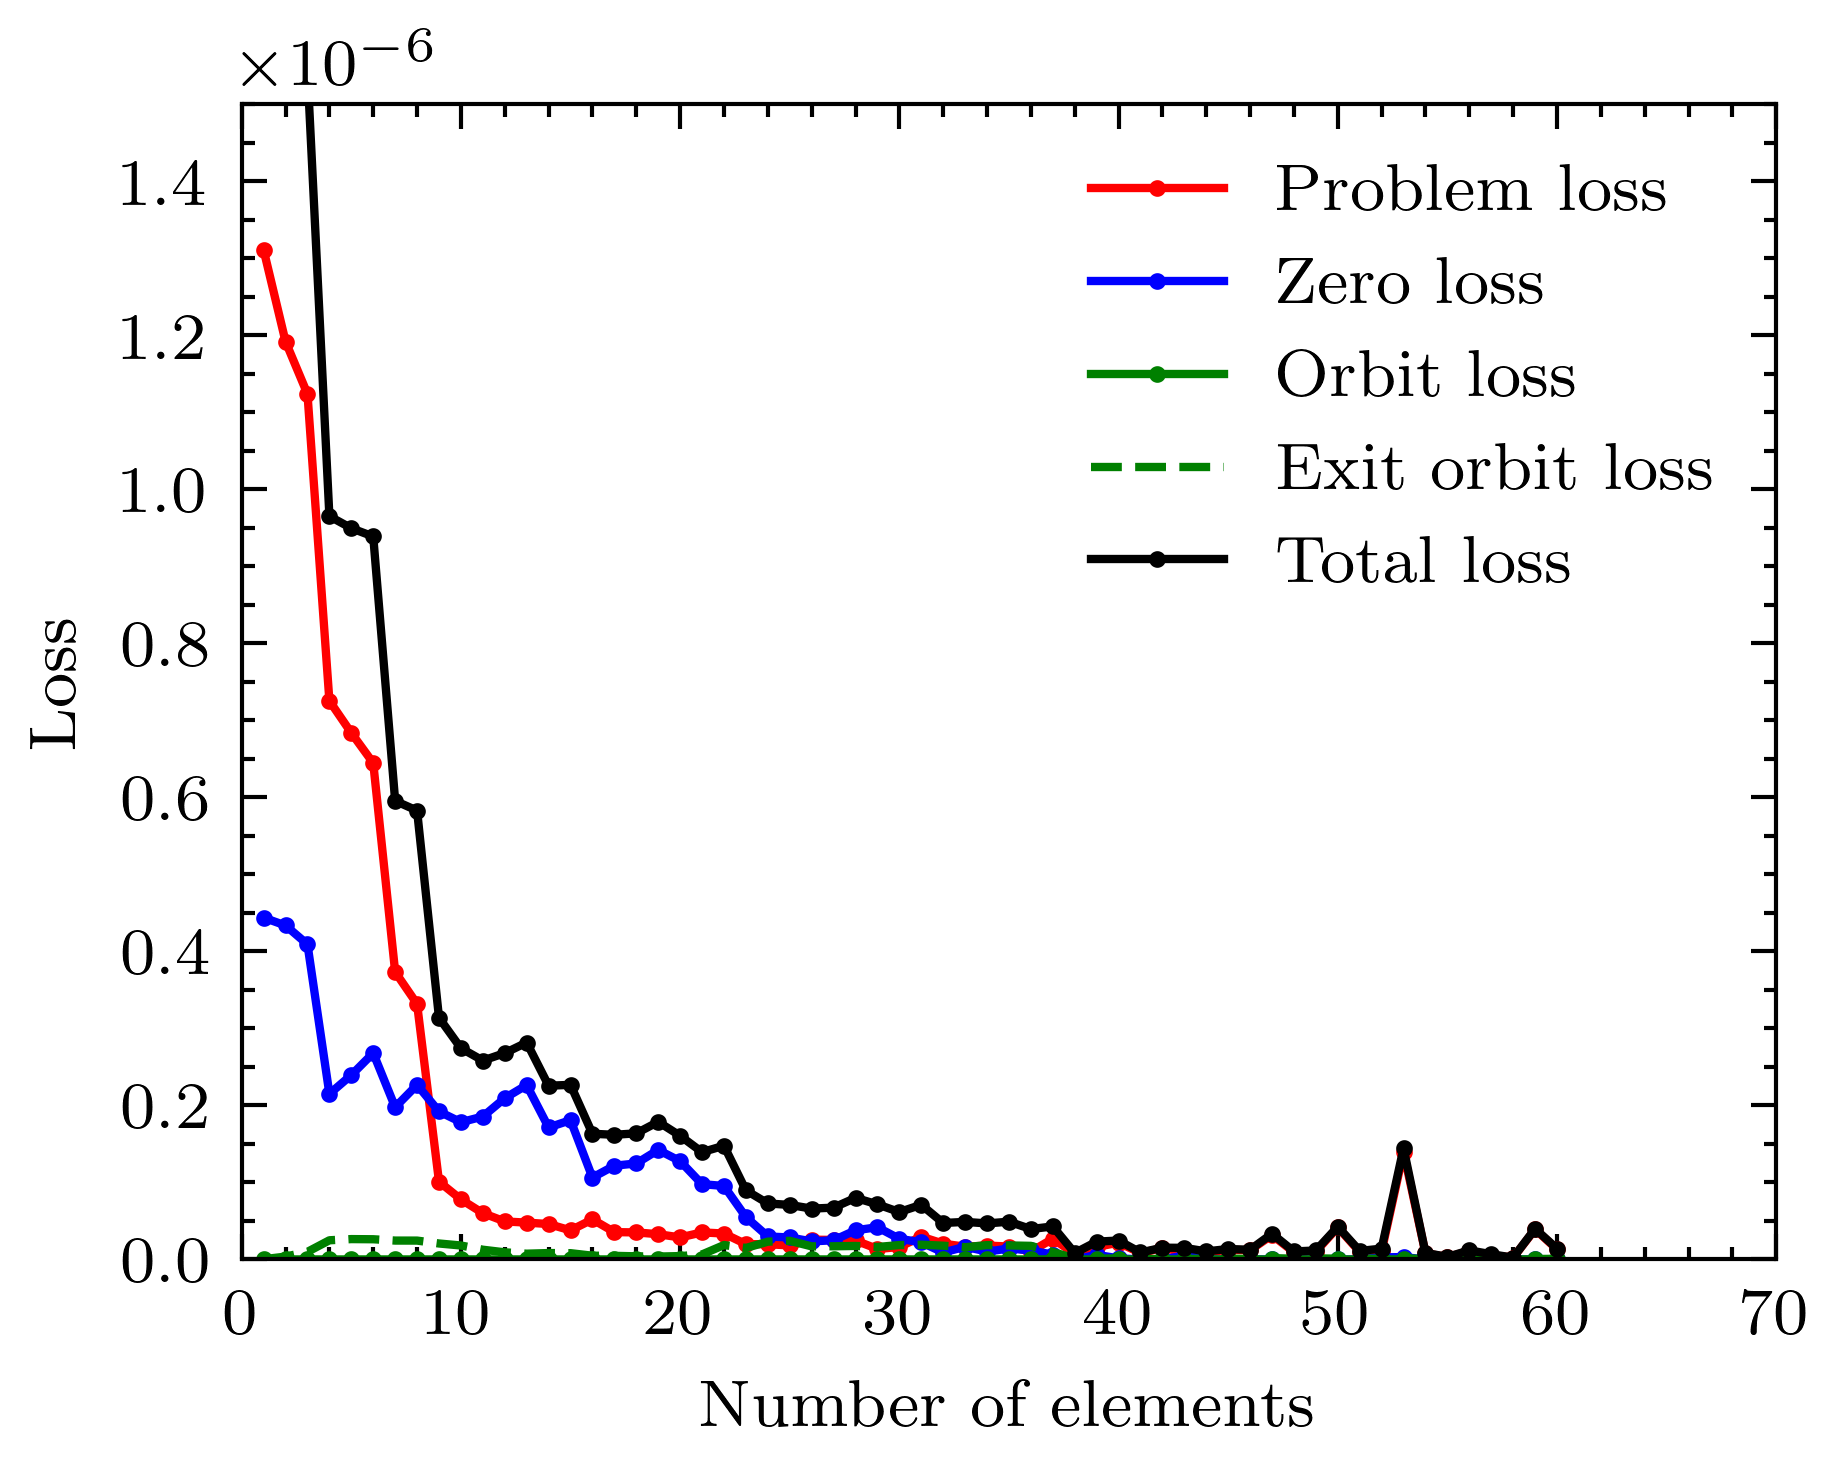

In [22]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y3**

In [29]:
FOLDER = "data/learning_storage/forward_backward/Y3_omp"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 57 files.
         Regularization         alpha  n_features  \
39  regularizer_mod_5_4  5.000000e-07           1   
55  regularizer_mod_5_4  5.000000e-07           2   
37  regularizer_mod_5_4  5.000000e-07           3   
4   regularizer_mod_5_4  5.000000e-07           4   
56  regularizer_mod_5_4  5.000000e-07           5   
52  regularizer_mod_5_4  5.000000e-07           6   
16  regularizer_mod_5_4  5.000000e-07           7   
48  regularizer_mod_5_4  5.000000e-07           8   
29  regularizer_mod_5_4  5.000000e-07           9   
30  regularizer_mod_5_4  5.000000e-07          10   
15  regularizer_mod_5_4  5.000000e-07          11   
3   regularizer_mod_5_4  5.000000e-07          12   
10  regularizer_mod_5_4  5.000000e-07          13   
26  regularizer_mod_5_4  5.000000e-07          14   
47  regularizer_mod_5_4  5.000000e-07          15   
38  regularizer_mod_5_4  5.000000e-07          16   
2   regularizer_mod_5_4  5.000000e-07          17   
36  regularizer_mod_5_4  5.000

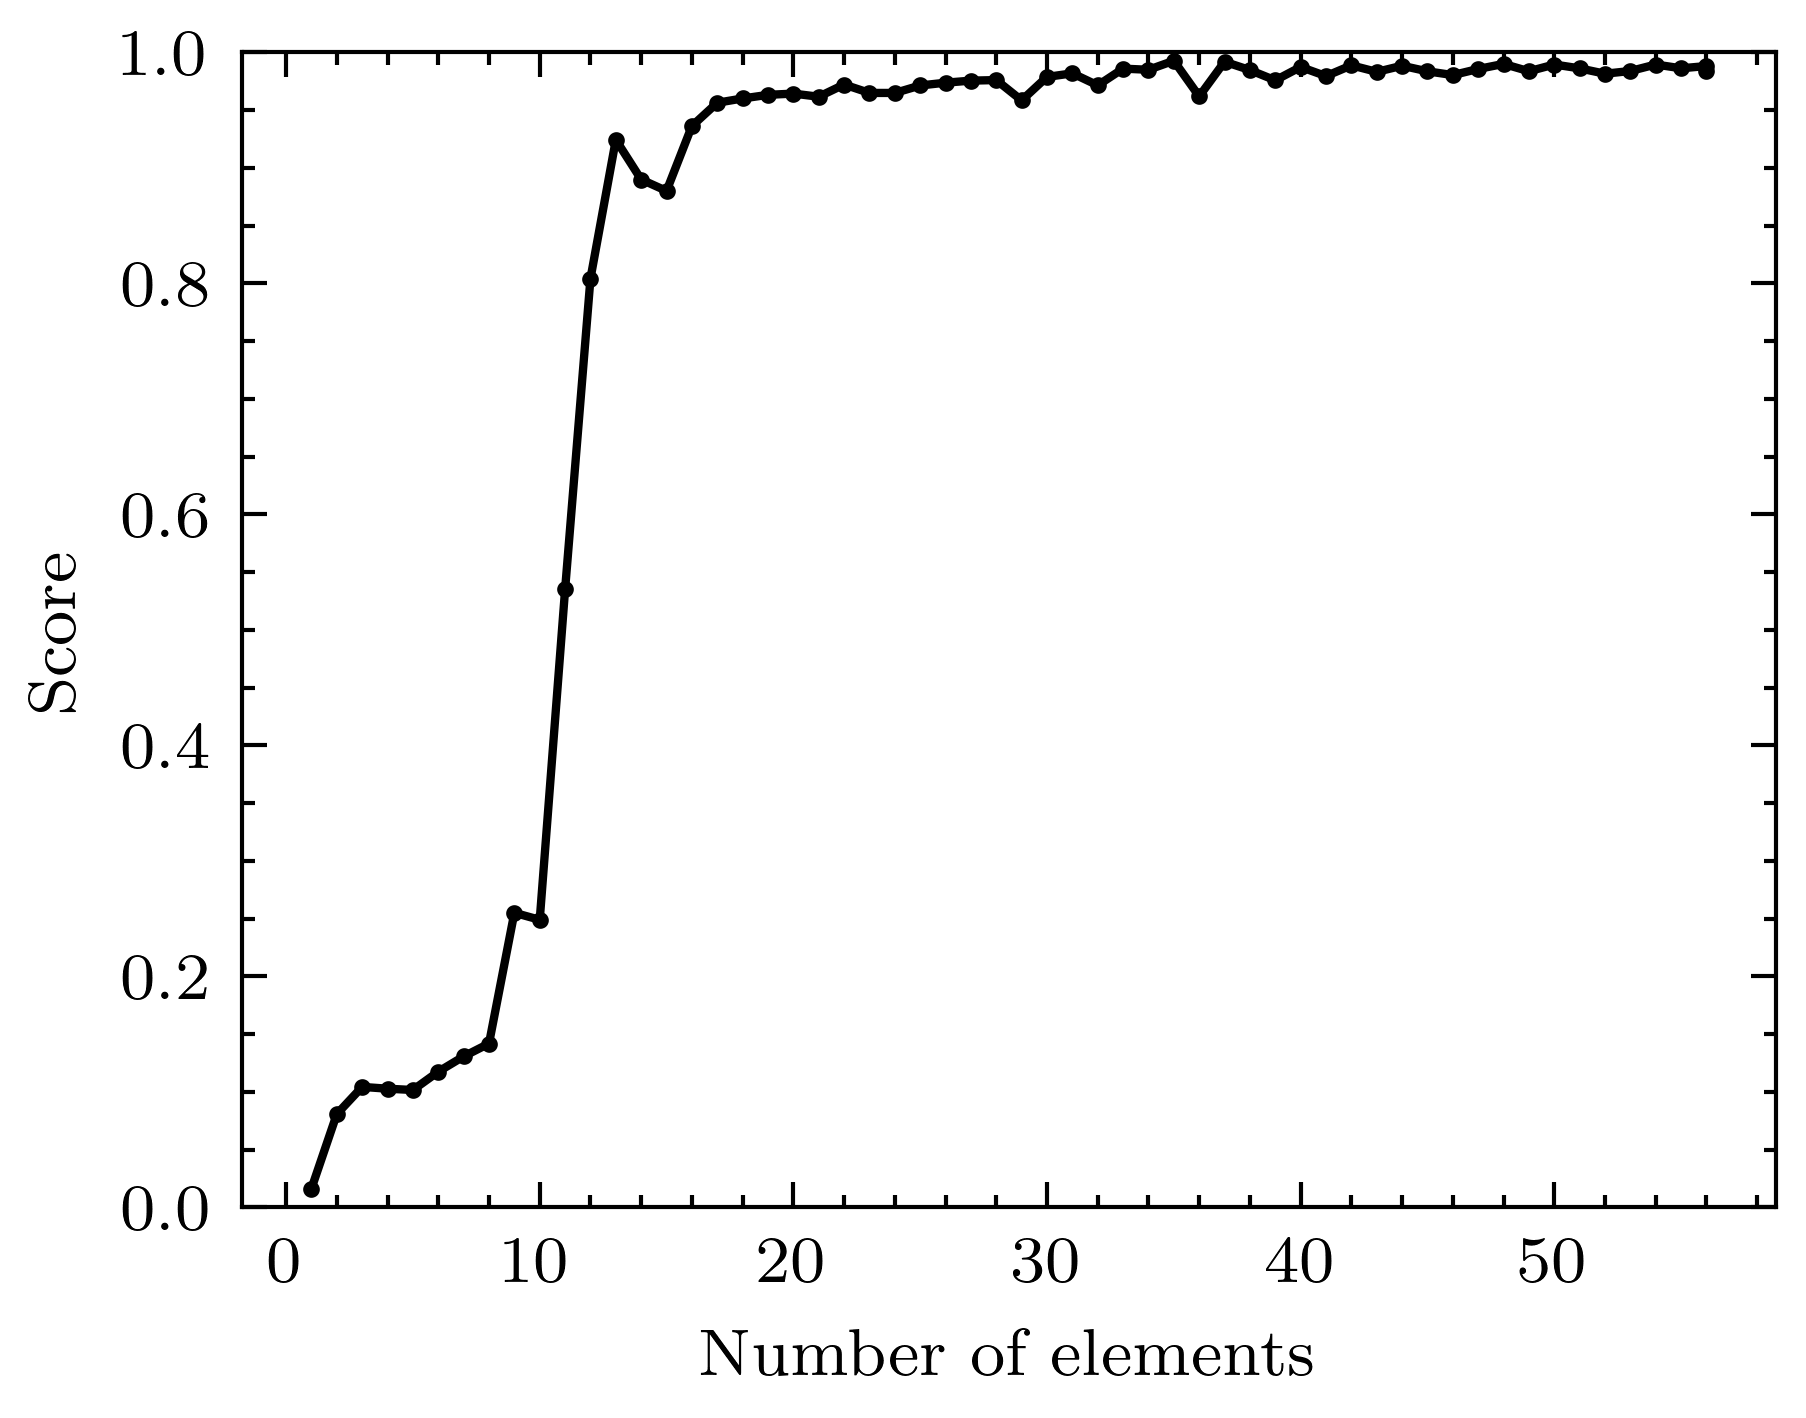

In [30]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

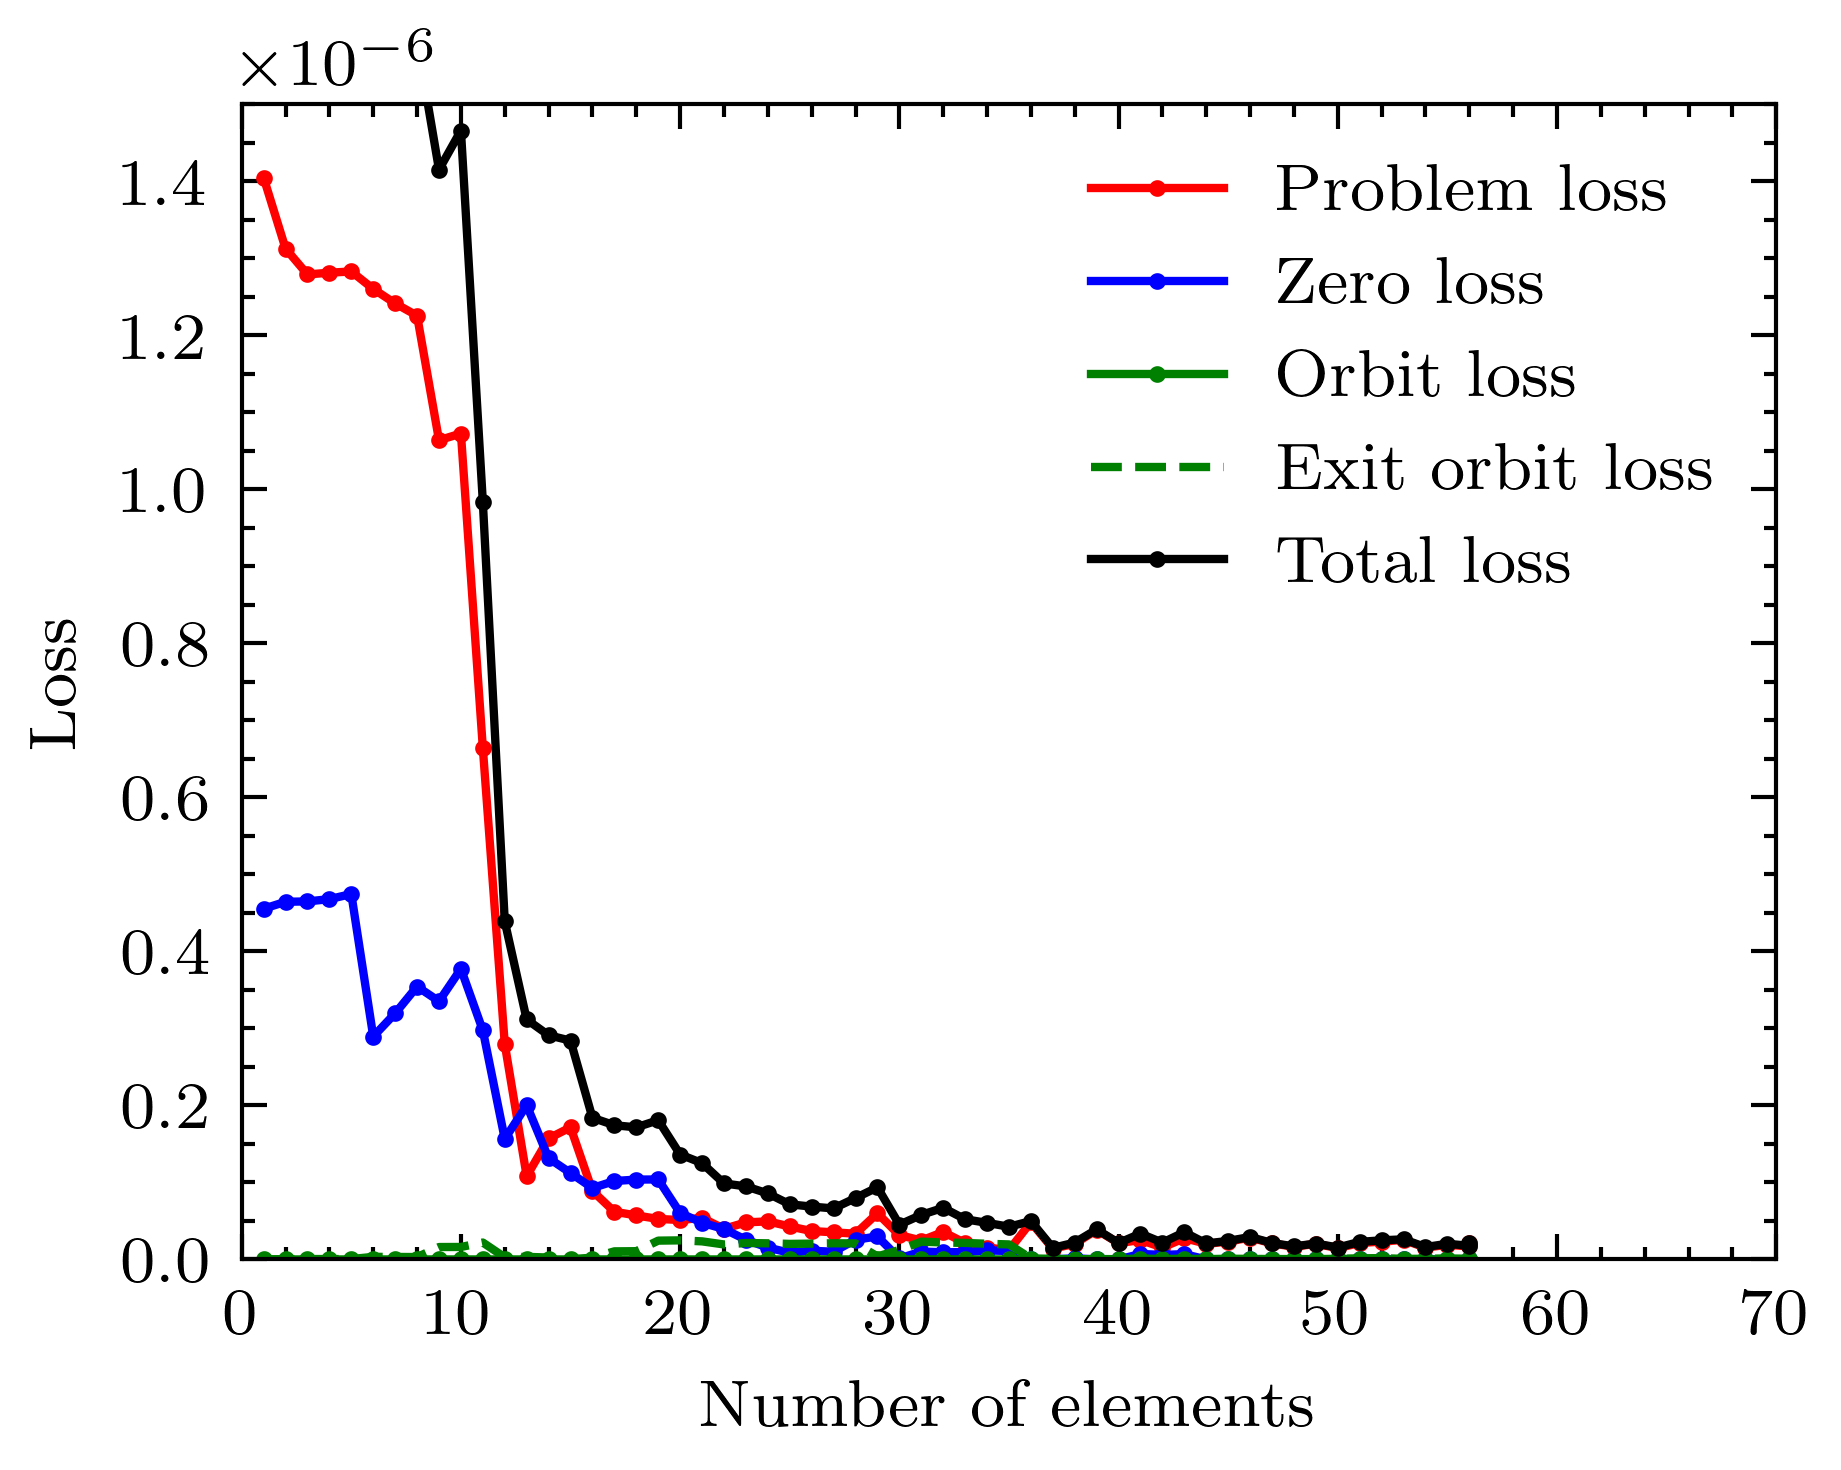

In [31]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y4**

In [38]:
FOLDER = "data/learning_storage/forward_backward/Y4_omp"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
41  regularizer_mod_5_4  5.000000e-07           1   
48  regularizer_mod_5_4  5.000000e-07           2   
14  regularizer_mod_5_4  5.000000e-07           3   
49  regularizer_mod_5_4  5.000000e-07           4   
7   regularizer_mod_5_4  5.000000e-07           5   
32  regularizer_mod_5_4  5.000000e-07           6   
20  regularizer_mod_5_4  5.000000e-07           7   
51  regularizer_mod_5_4  5.000000e-07           8   
30  regularizer_mod_5_4  5.000000e-07           9   
50  regularizer_mod_5_4  5.000000e-07          10   
54  regularizer_mod_5_4  5.000000e-07          11   
10  regularizer_mod_5_4  5.000000e-07          12   
15  regularizer_mod_5_4  5.000000e-07          13   
56  regularizer_mod_5_4  5.000000e-07          14   
2   regularizer_mod_5_4  5.000000e-07          15   
52  regularizer_mod_5_4  5.000000e-07          16   
45  regularizer_mod_5_4  5.000000e-07          17   
12  regularizer_mod_5_4  5.000

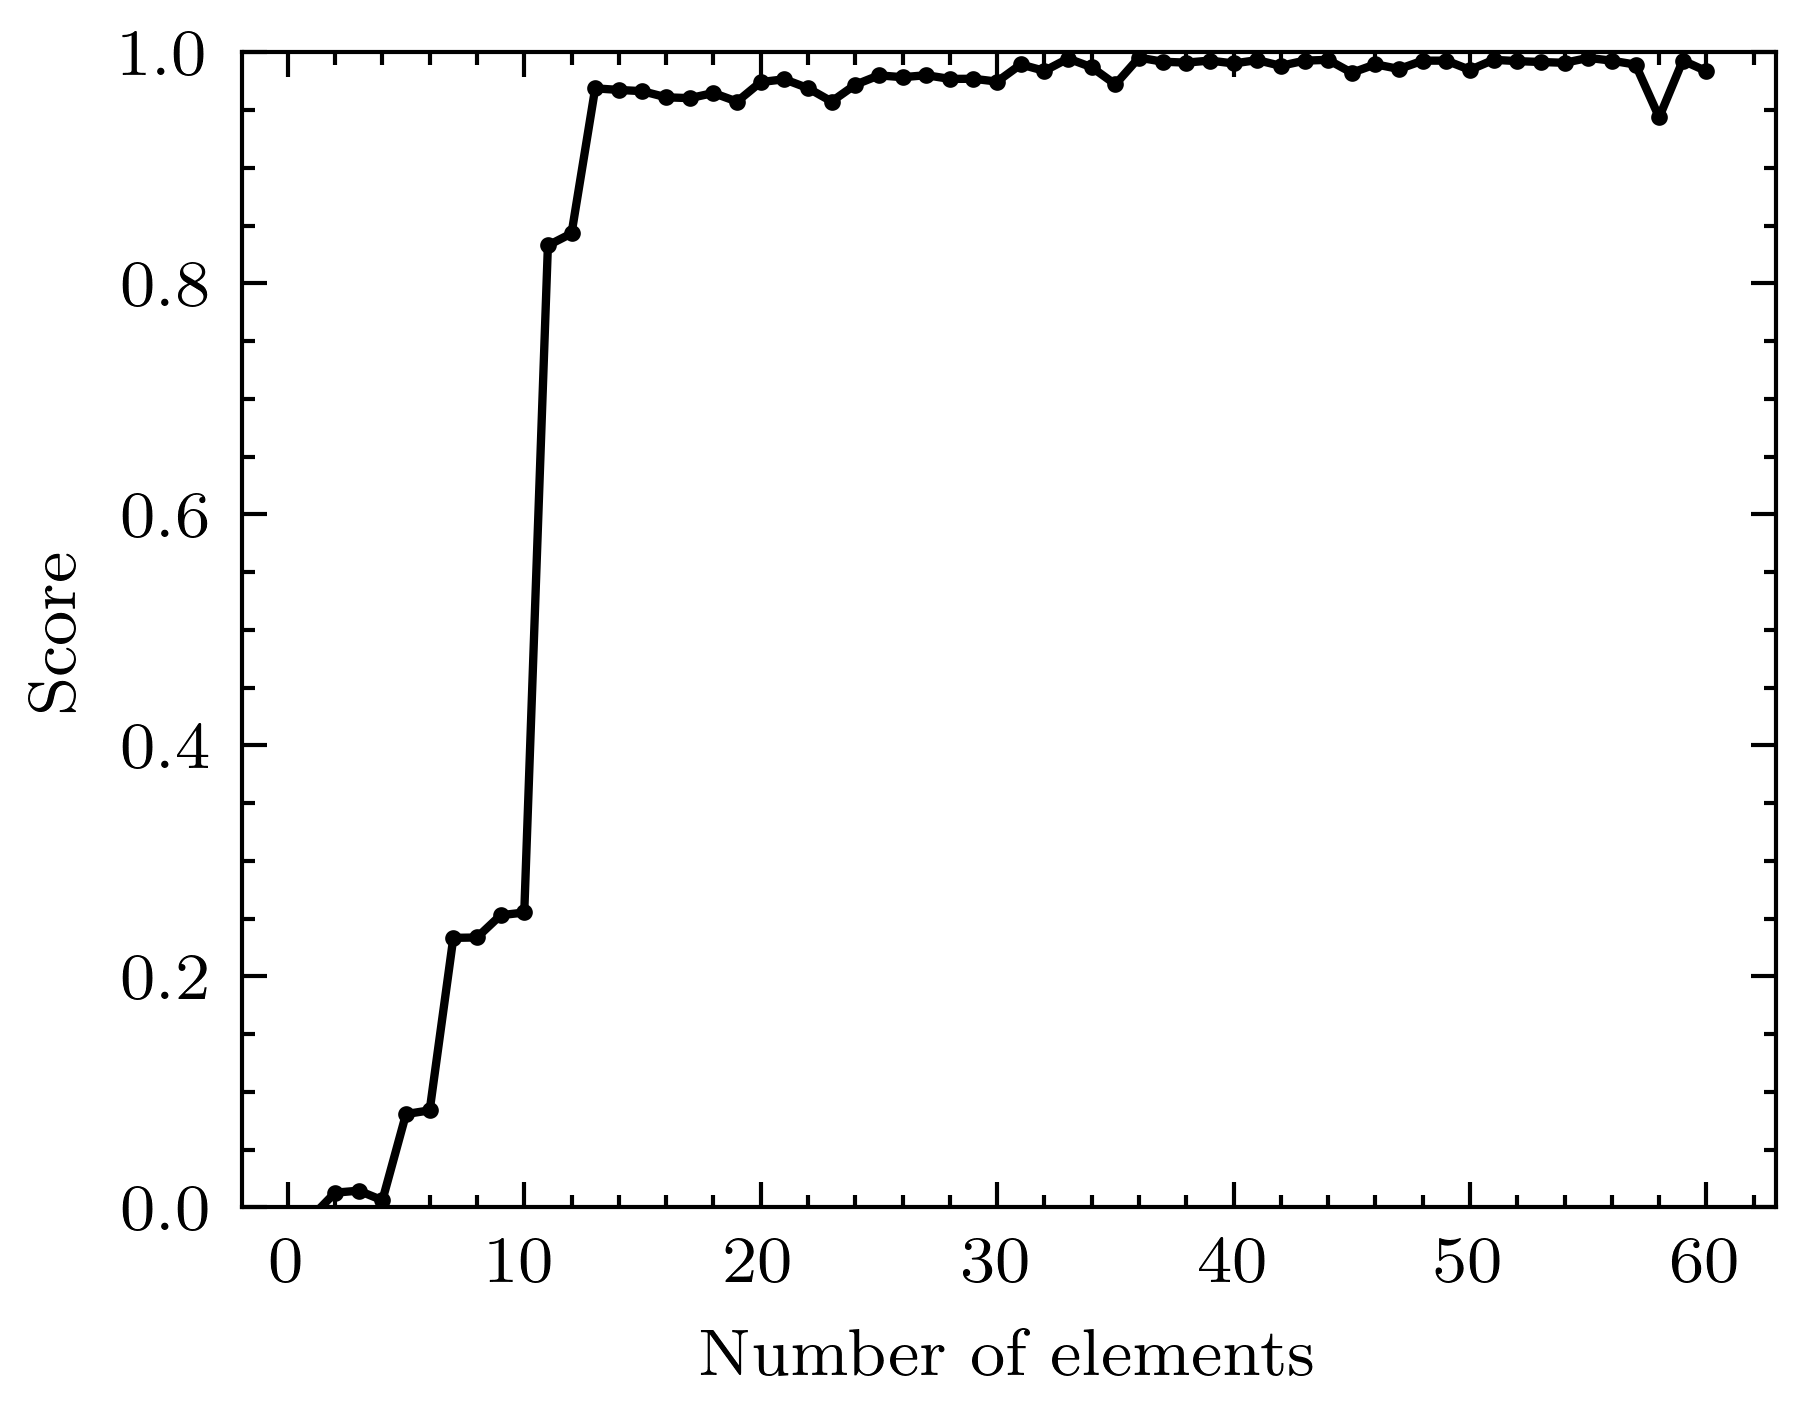

In [39]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

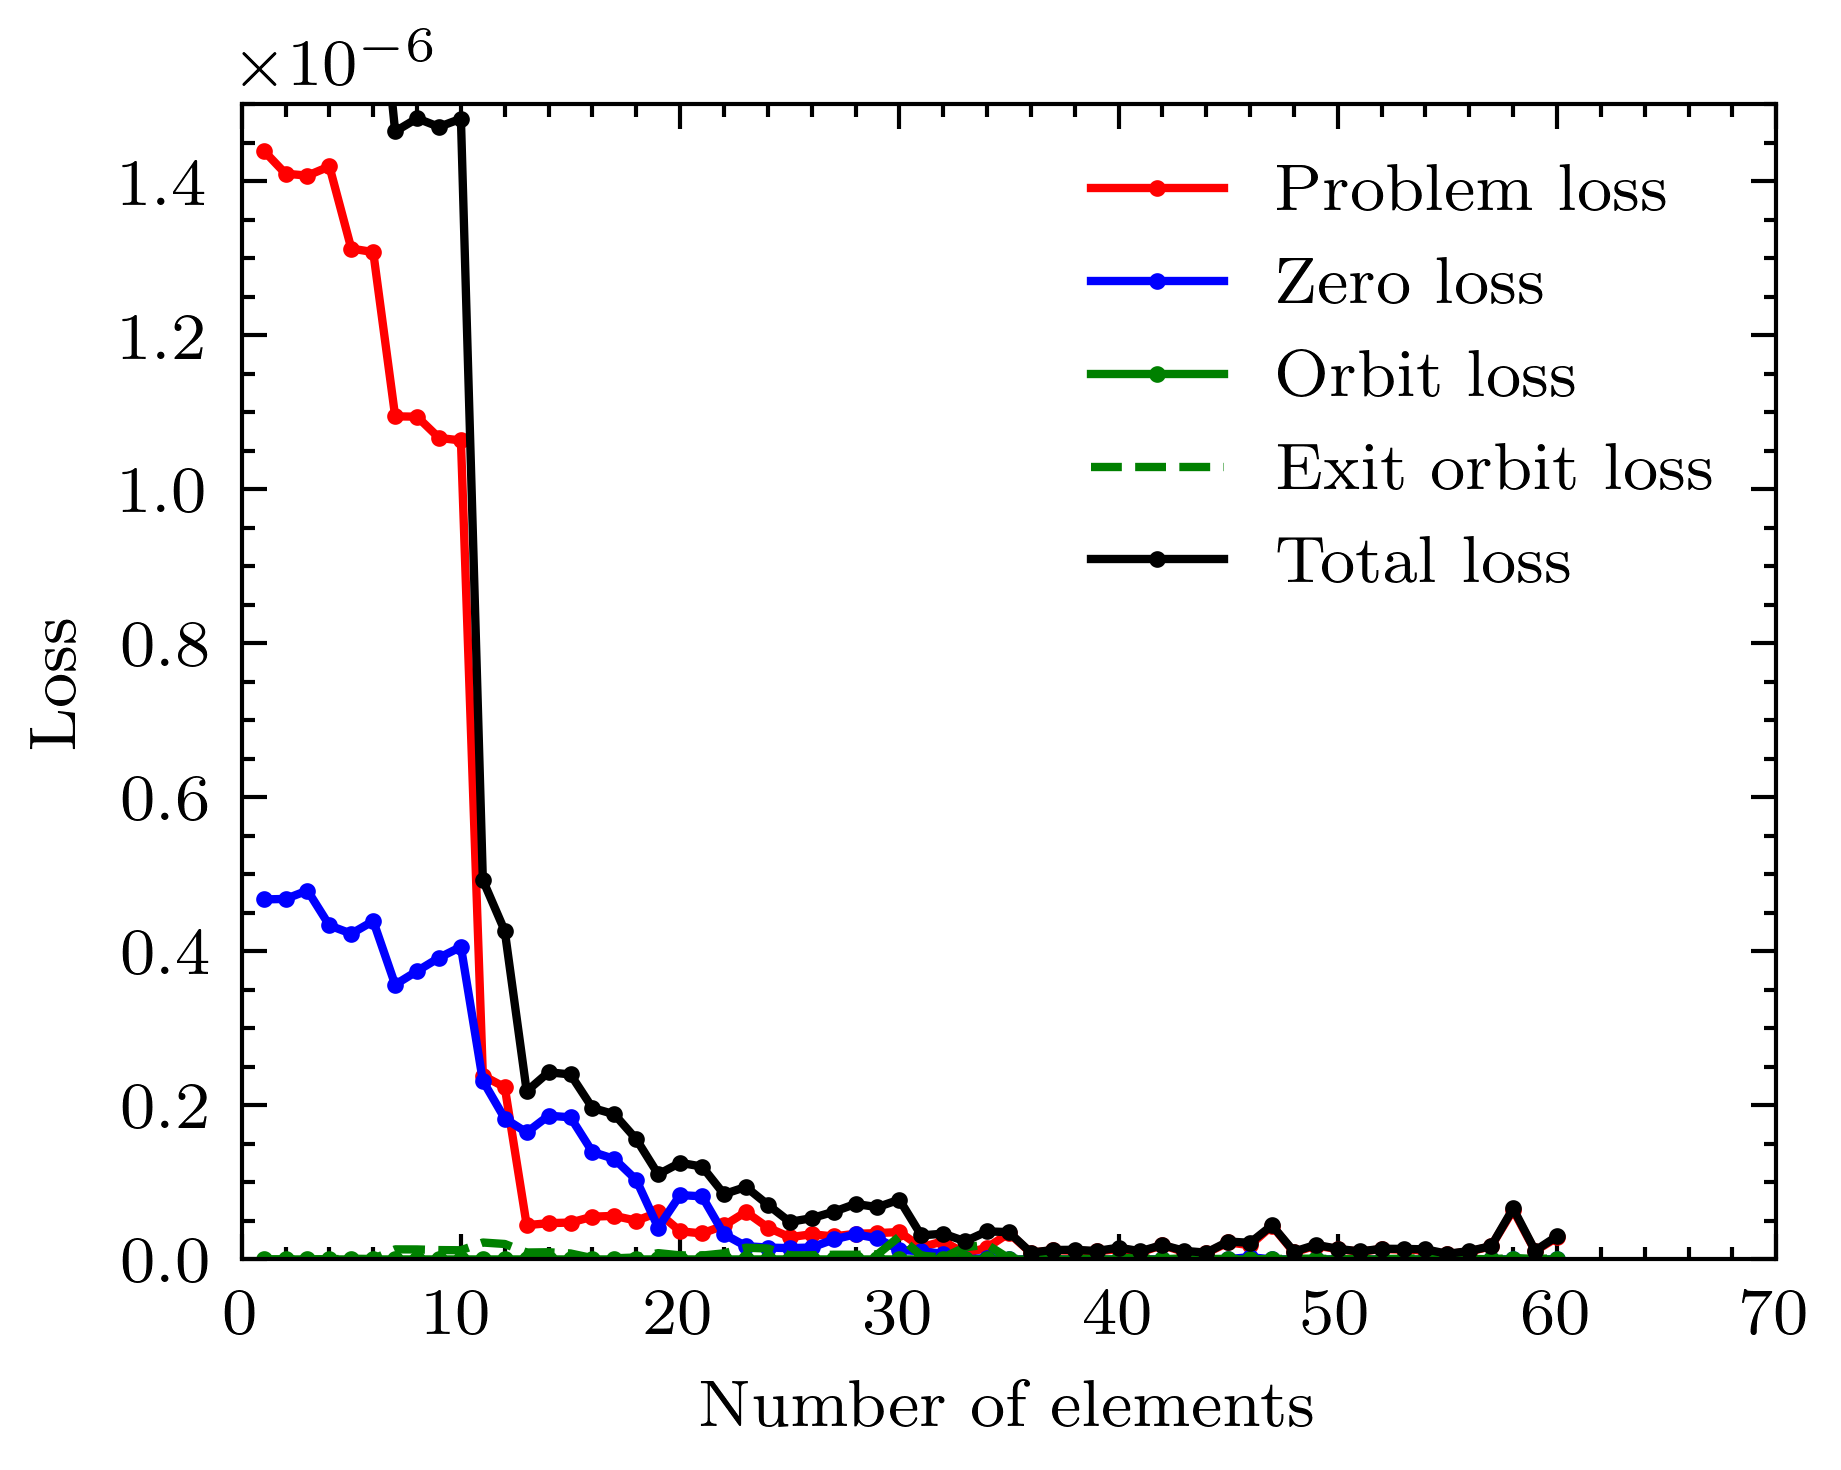

In [40]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y5**

In [41]:
FOLDER = "data/learning_storage/forward_backward/Y5_omp"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
2   regularizer_mod_5_4  5.000000e-07           1   
19  regularizer_mod_5_4  5.000000e-07           2   
34  regularizer_mod_5_4  5.000000e-07           3   
45  regularizer_mod_5_4  5.000000e-07           4   
22  regularizer_mod_5_4  5.000000e-07           5   
42  regularizer_mod_5_4  5.000000e-07           6   
50  regularizer_mod_5_4  5.000000e-07           7   
35  regularizer_mod_5_4  5.000000e-07           8   
27  regularizer_mod_5_4  5.000000e-07           9   
20  regularizer_mod_5_4  5.000000e-07          10   
21  regularizer_mod_5_4  5.000000e-07          11   
51  regularizer_mod_5_4  5.000000e-07          12   
43  regularizer_mod_5_4  5.000000e-07          13   
10  regularizer_mod_5_4  5.000000e-07          14   
3   regularizer_mod_5_4  5.000000e-07          15   
53  regularizer_mod_5_4  5.000000e-07          16   
25  regularizer_mod_5_4  5.000000e-07          17   
24  regularizer_mod_5_4  5.000

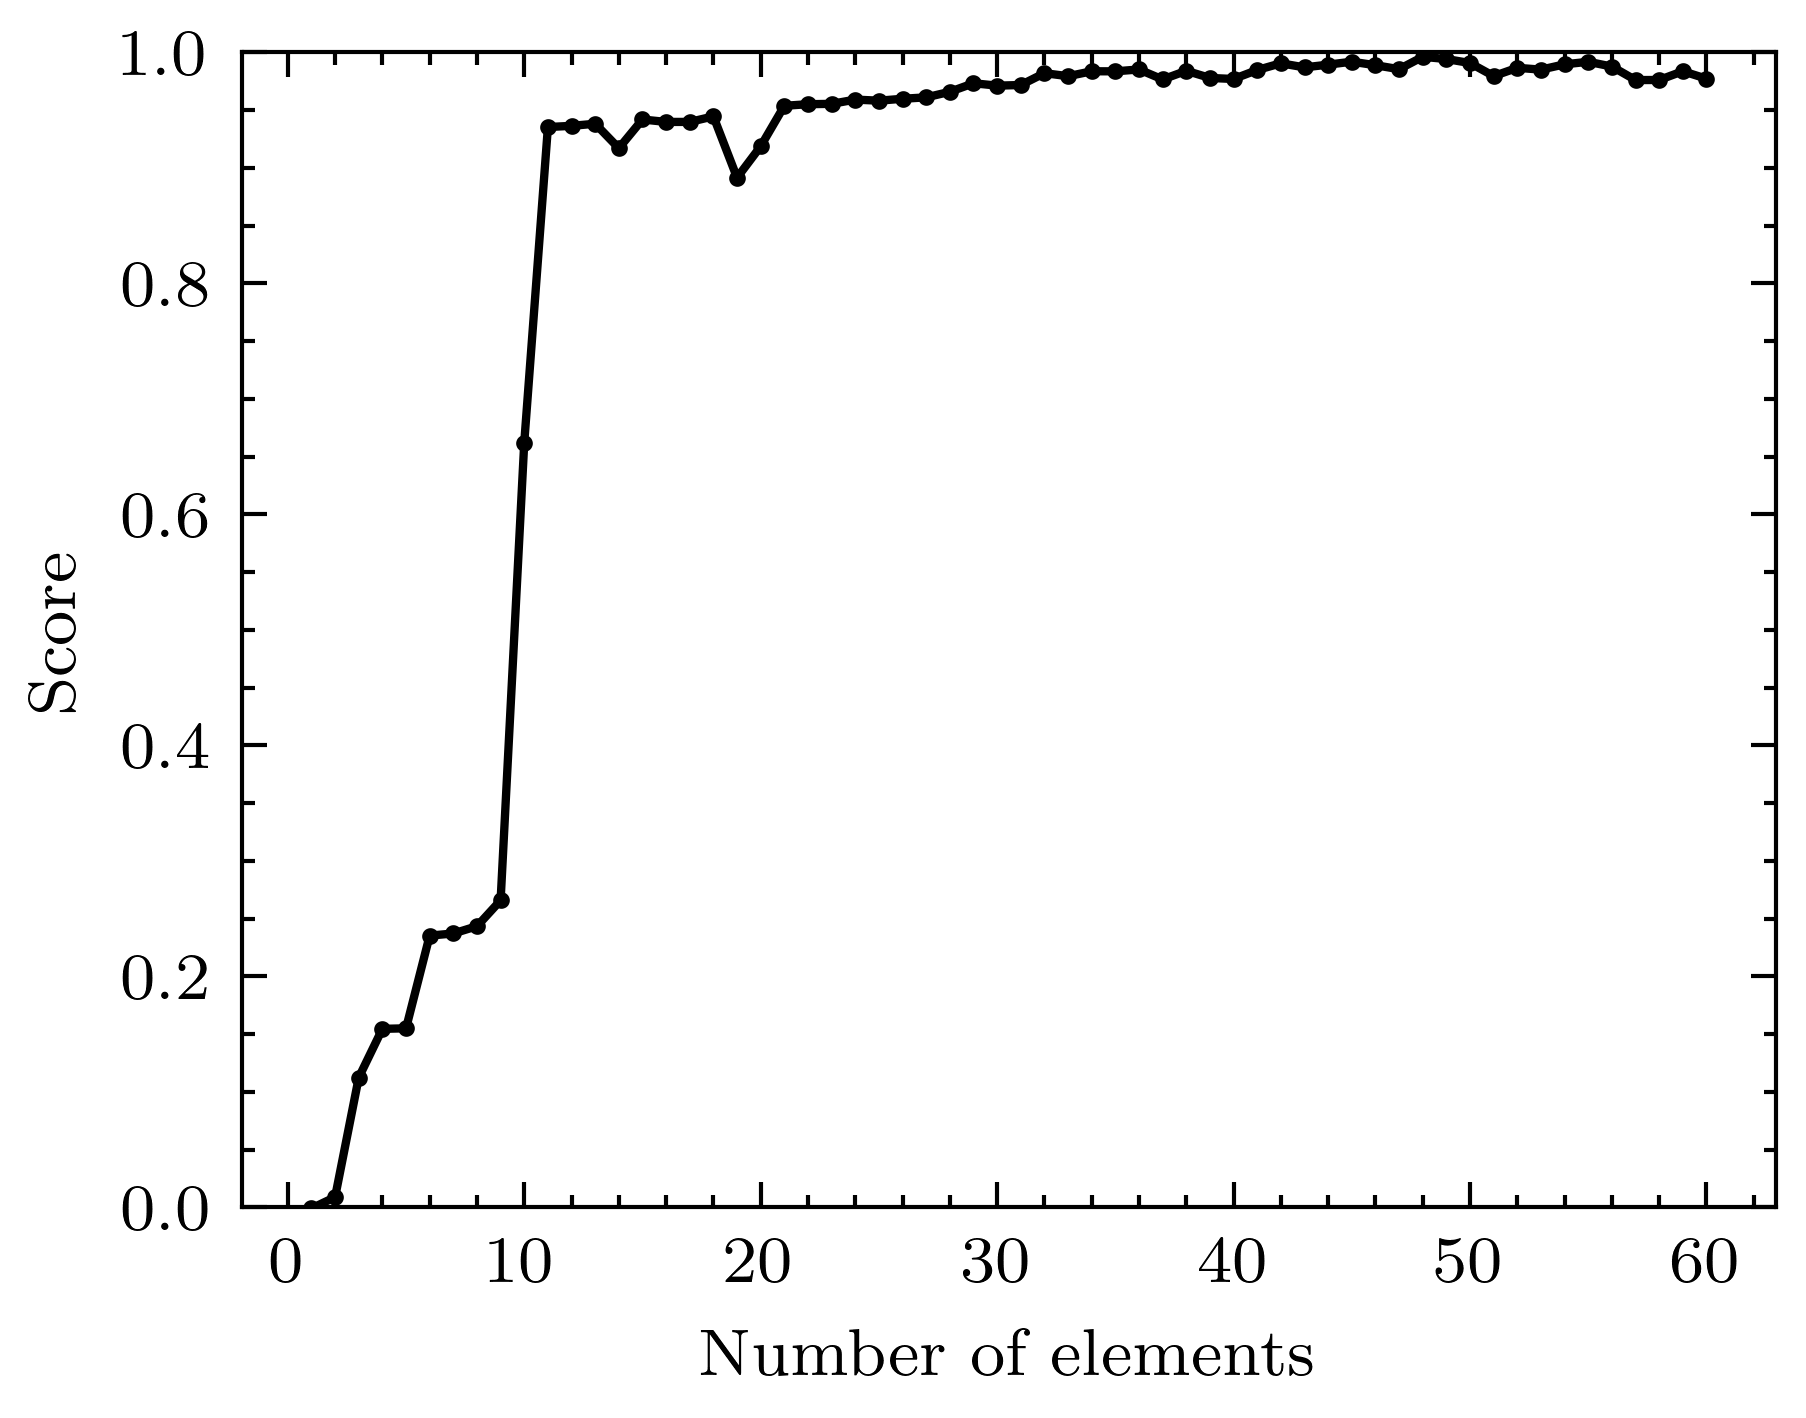

In [42]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

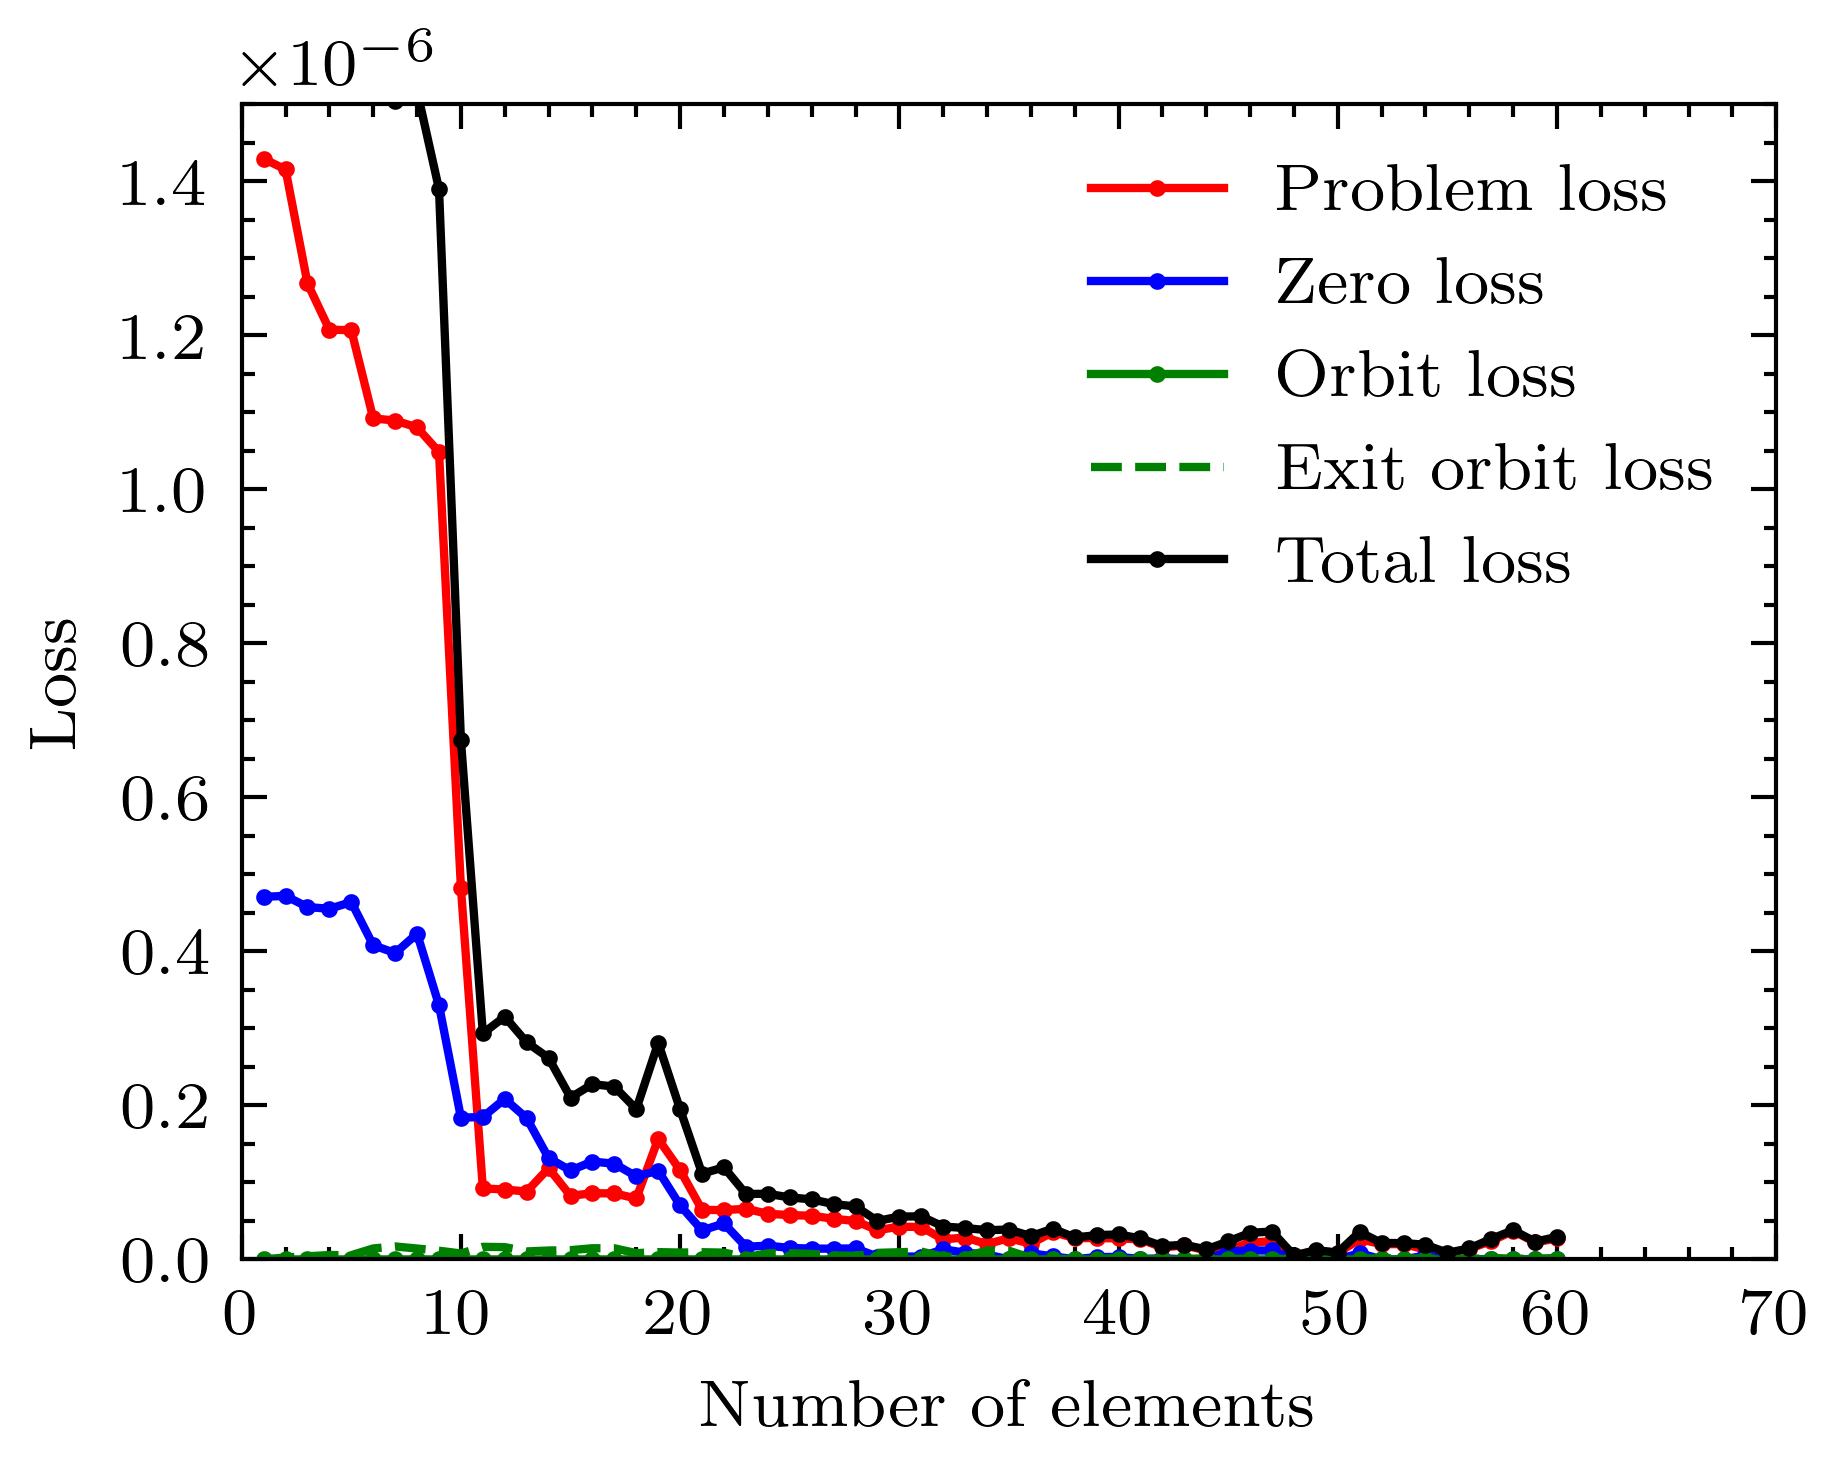

In [43]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y6**

In [56]:
FOLDER = "data/learning_storage/forward_backward/Y6_omp"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
44  regularizer_mod_5_4  5.000000e-07           1   
37  regularizer_mod_5_4  5.000000e-07           2   
41  regularizer_mod_5_4  5.000000e-07           3   
1   regularizer_mod_5_4  5.000000e-07           4   
31  regularizer_mod_5_4  5.000000e-07           5   
40  regularizer_mod_5_4  5.000000e-07           6   
14  regularizer_mod_5_4  5.000000e-07           7   
22  regularizer_mod_5_4  5.000000e-07           8   
30  regularizer_mod_5_4  5.000000e-07           9   
38  regularizer_mod_5_4  5.000000e-07          10   
49  regularizer_mod_5_4  5.000000e-07          11   
10  regularizer_mod_5_4  5.000000e-07          12   
35  regularizer_mod_5_4  5.000000e-07          13   
39  regularizer_mod_5_4  5.000000e-07          14   
58  regularizer_mod_5_4  5.000000e-07          15   
52  regularizer_mod_5_4  5.000000e-07          16   
3   regularizer_mod_5_4  5.000000e-07          17   
25  regularizer_mod_5_4  5.000

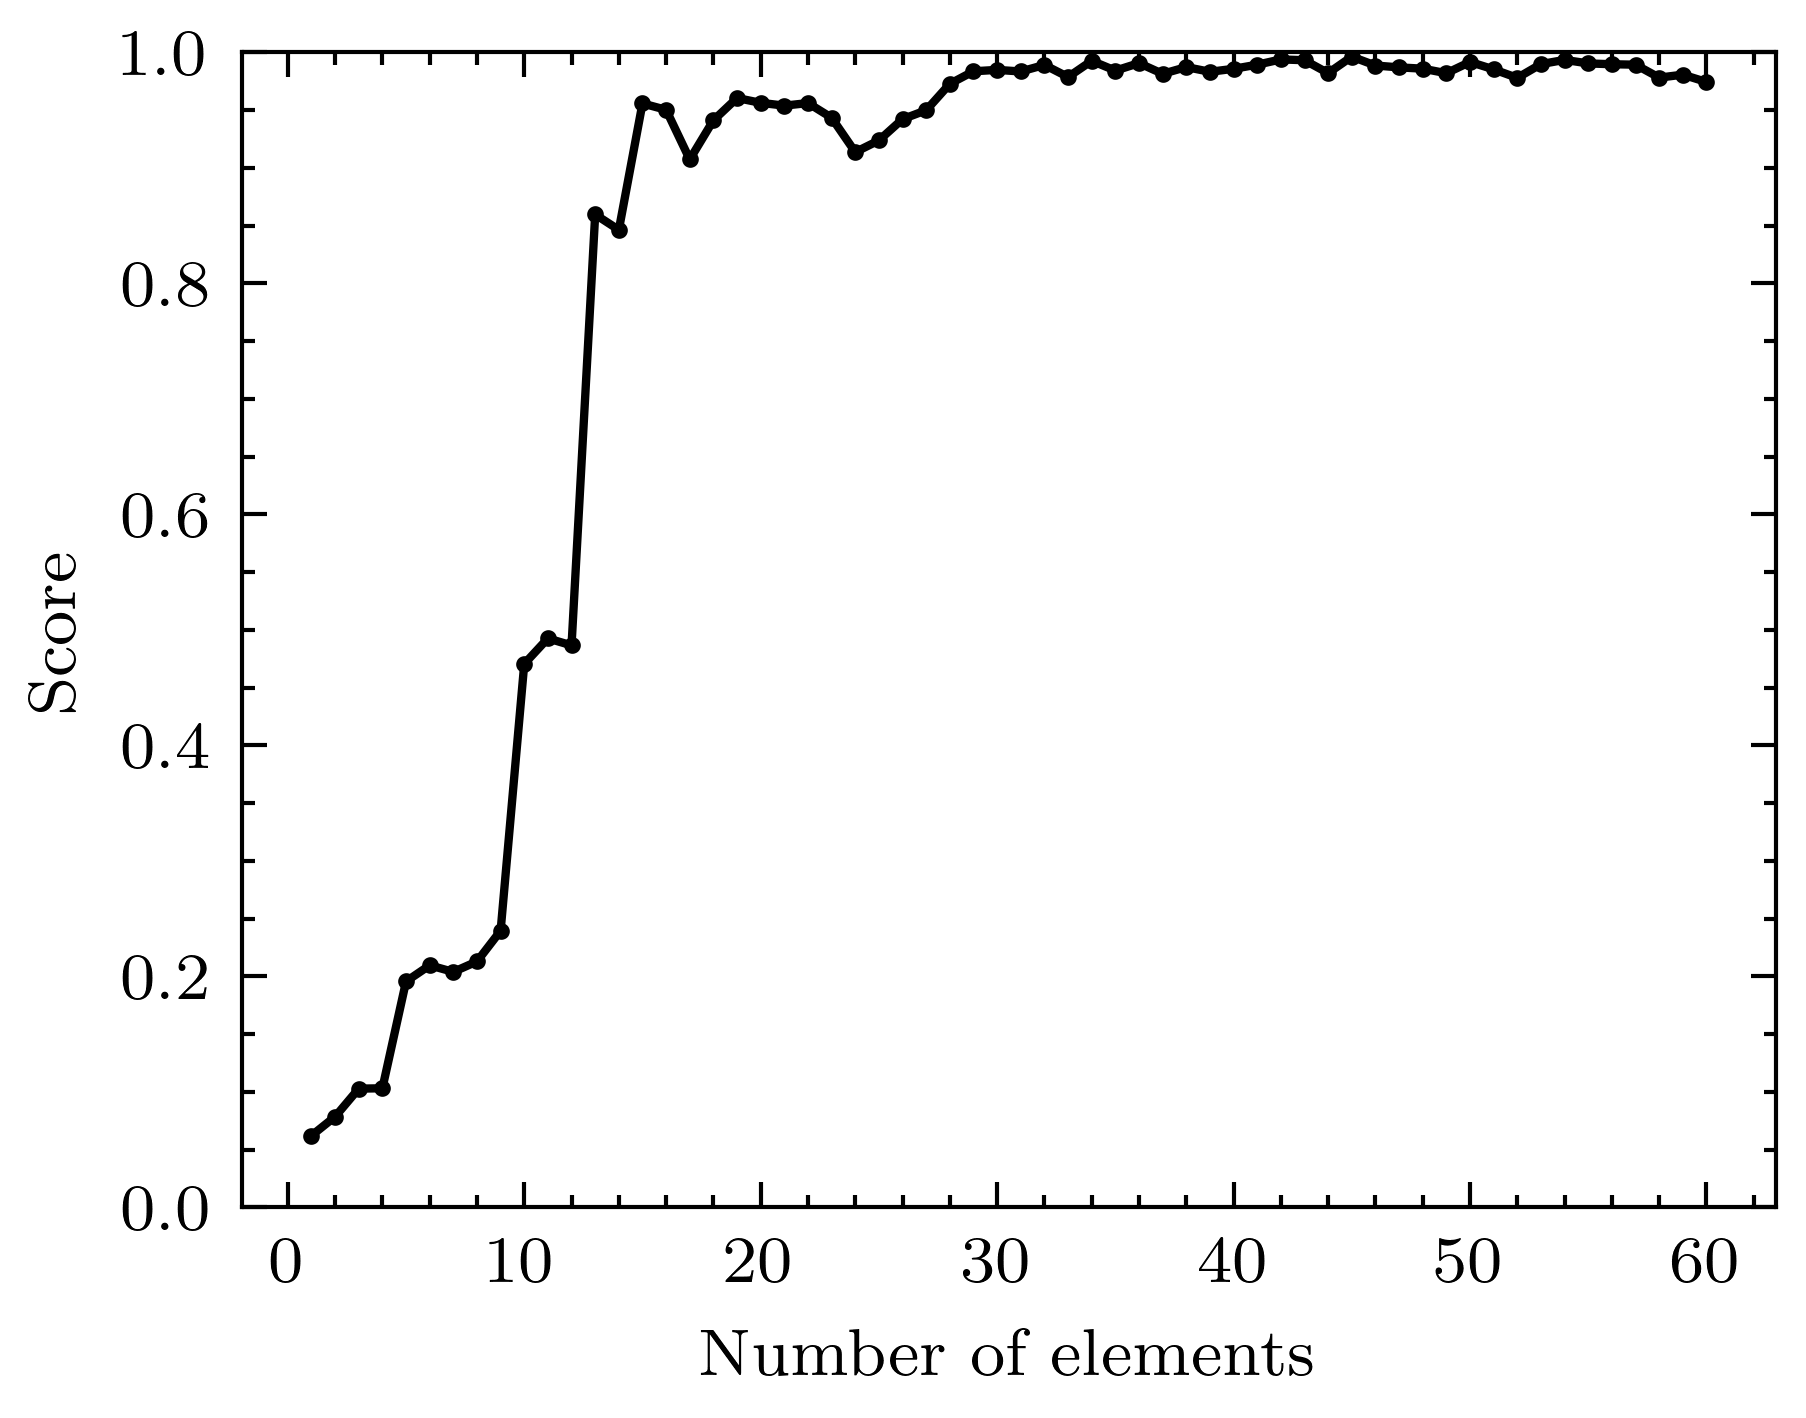

In [57]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

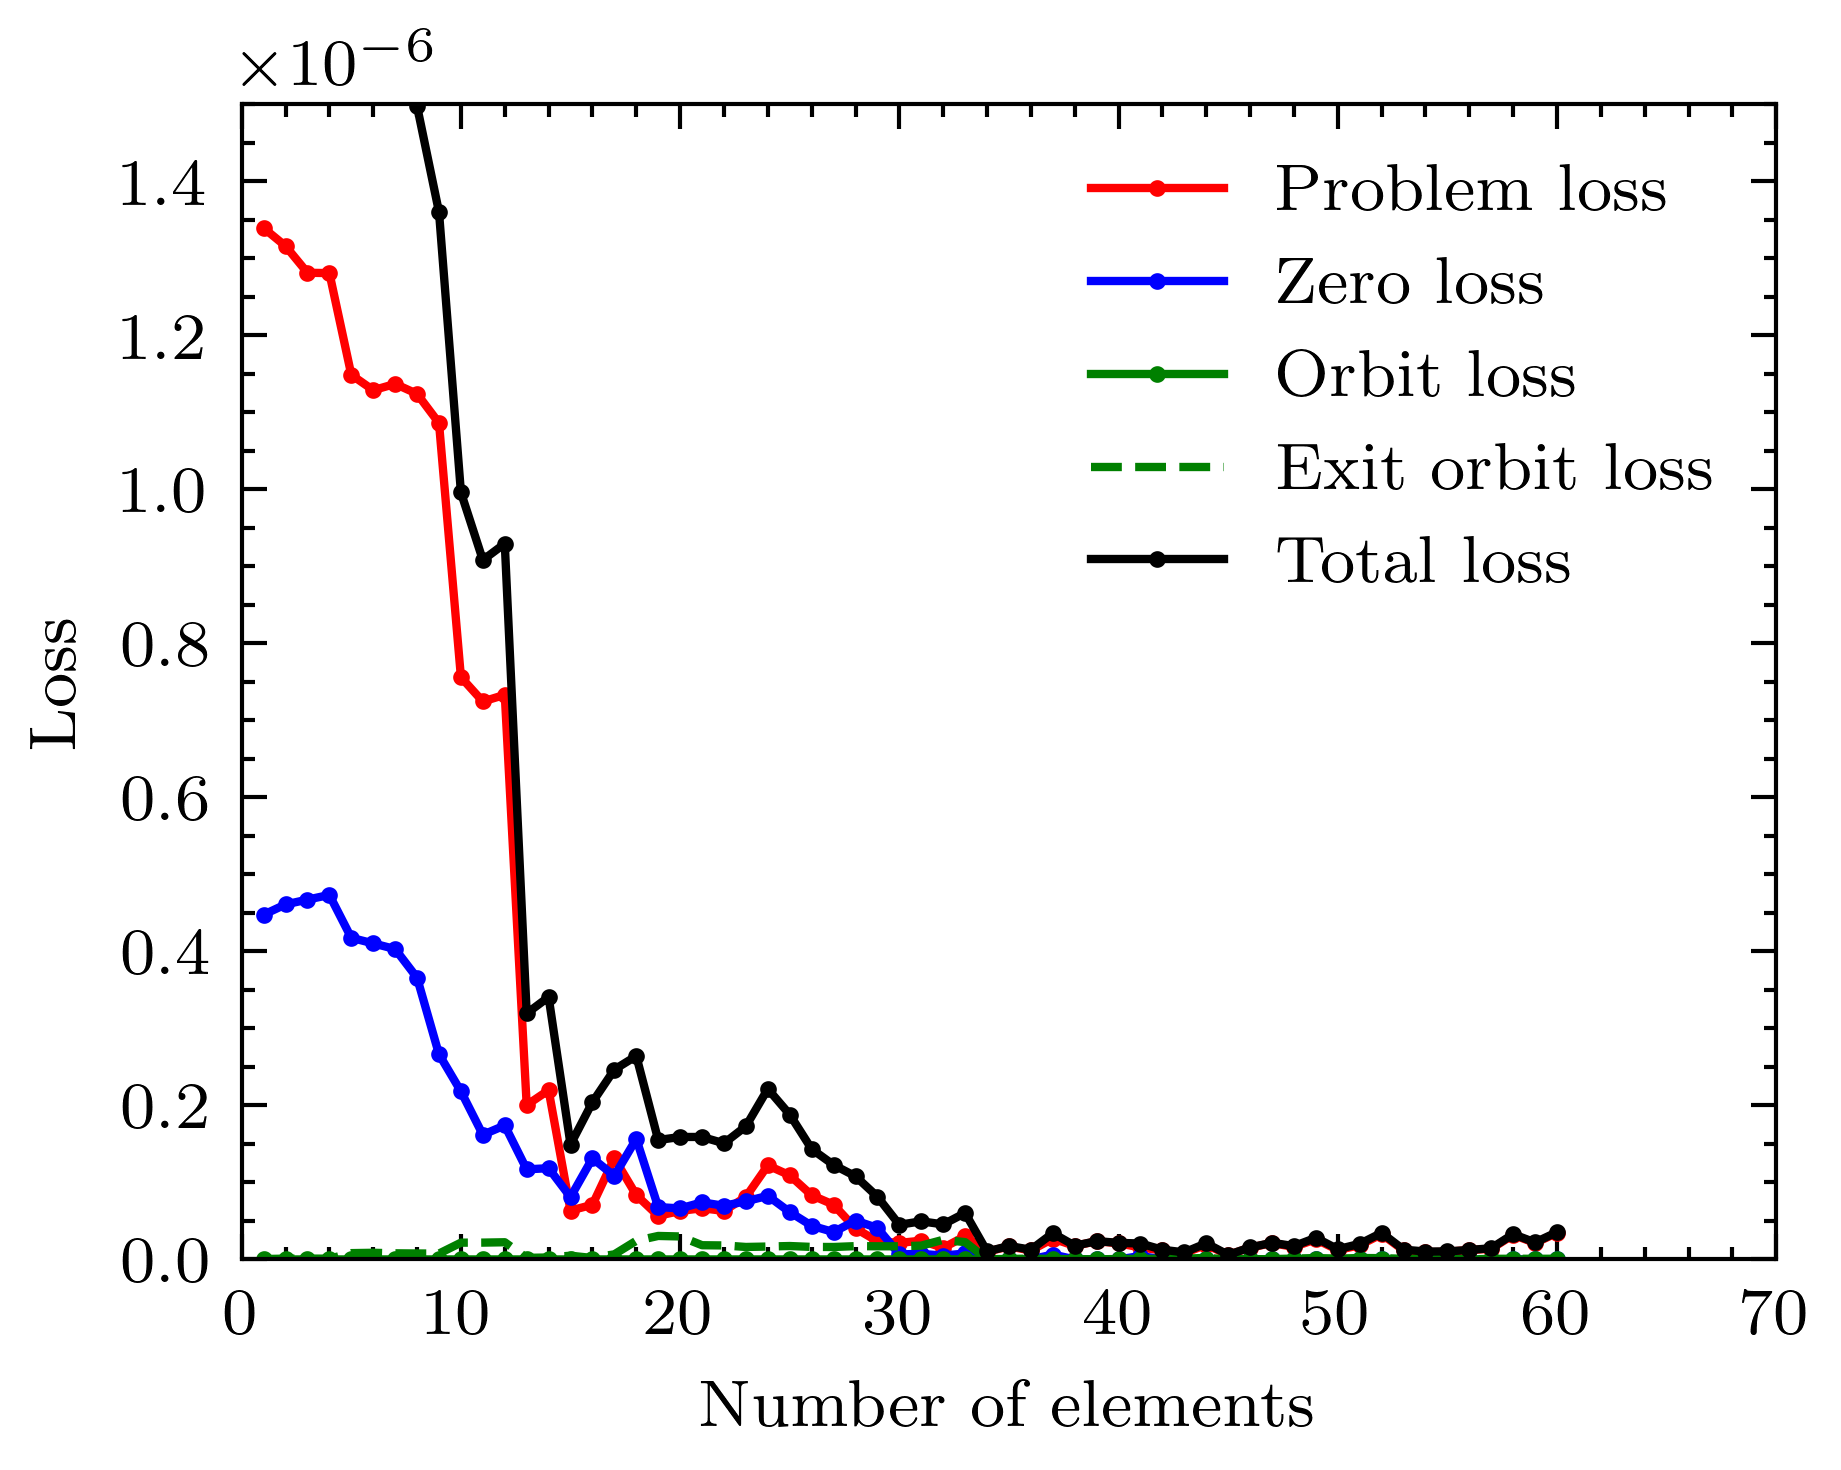

In [58]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y7**

In [76]:
FOLDER = "data/learning_storage/forward_backward/Y7_omp"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
29  regularizer_mod_5_4  5.000000e-07           1   
19  regularizer_mod_5_4  5.000000e-07           2   
5   regularizer_mod_5_4  5.000000e-07           3   
6   regularizer_mod_5_4  5.000000e-07           4   
50  regularizer_mod_5_4  5.000000e-07           5   
26  regularizer_mod_5_4  5.000000e-07           6   
28  regularizer_mod_5_4  5.000000e-07           7   
44  regularizer_mod_5_4  5.000000e-07           8   
0   regularizer_mod_5_4  5.000000e-07           9   
14  regularizer_mod_5_4  5.000000e-07          10   
42  regularizer_mod_5_4  5.000000e-07          11   
8   regularizer_mod_5_4  5.000000e-07          12   
32  regularizer_mod_5_4  5.000000e-07          13   
13  regularizer_mod_5_4  5.000000e-07          14   
33  regularizer_mod_5_4  5.000000e-07          15   
3   regularizer_mod_5_4  5.000000e-07          16   
18  regularizer_mod_5_4  5.000000e-07          17   
23  regularizer_mod_5_4  5.000

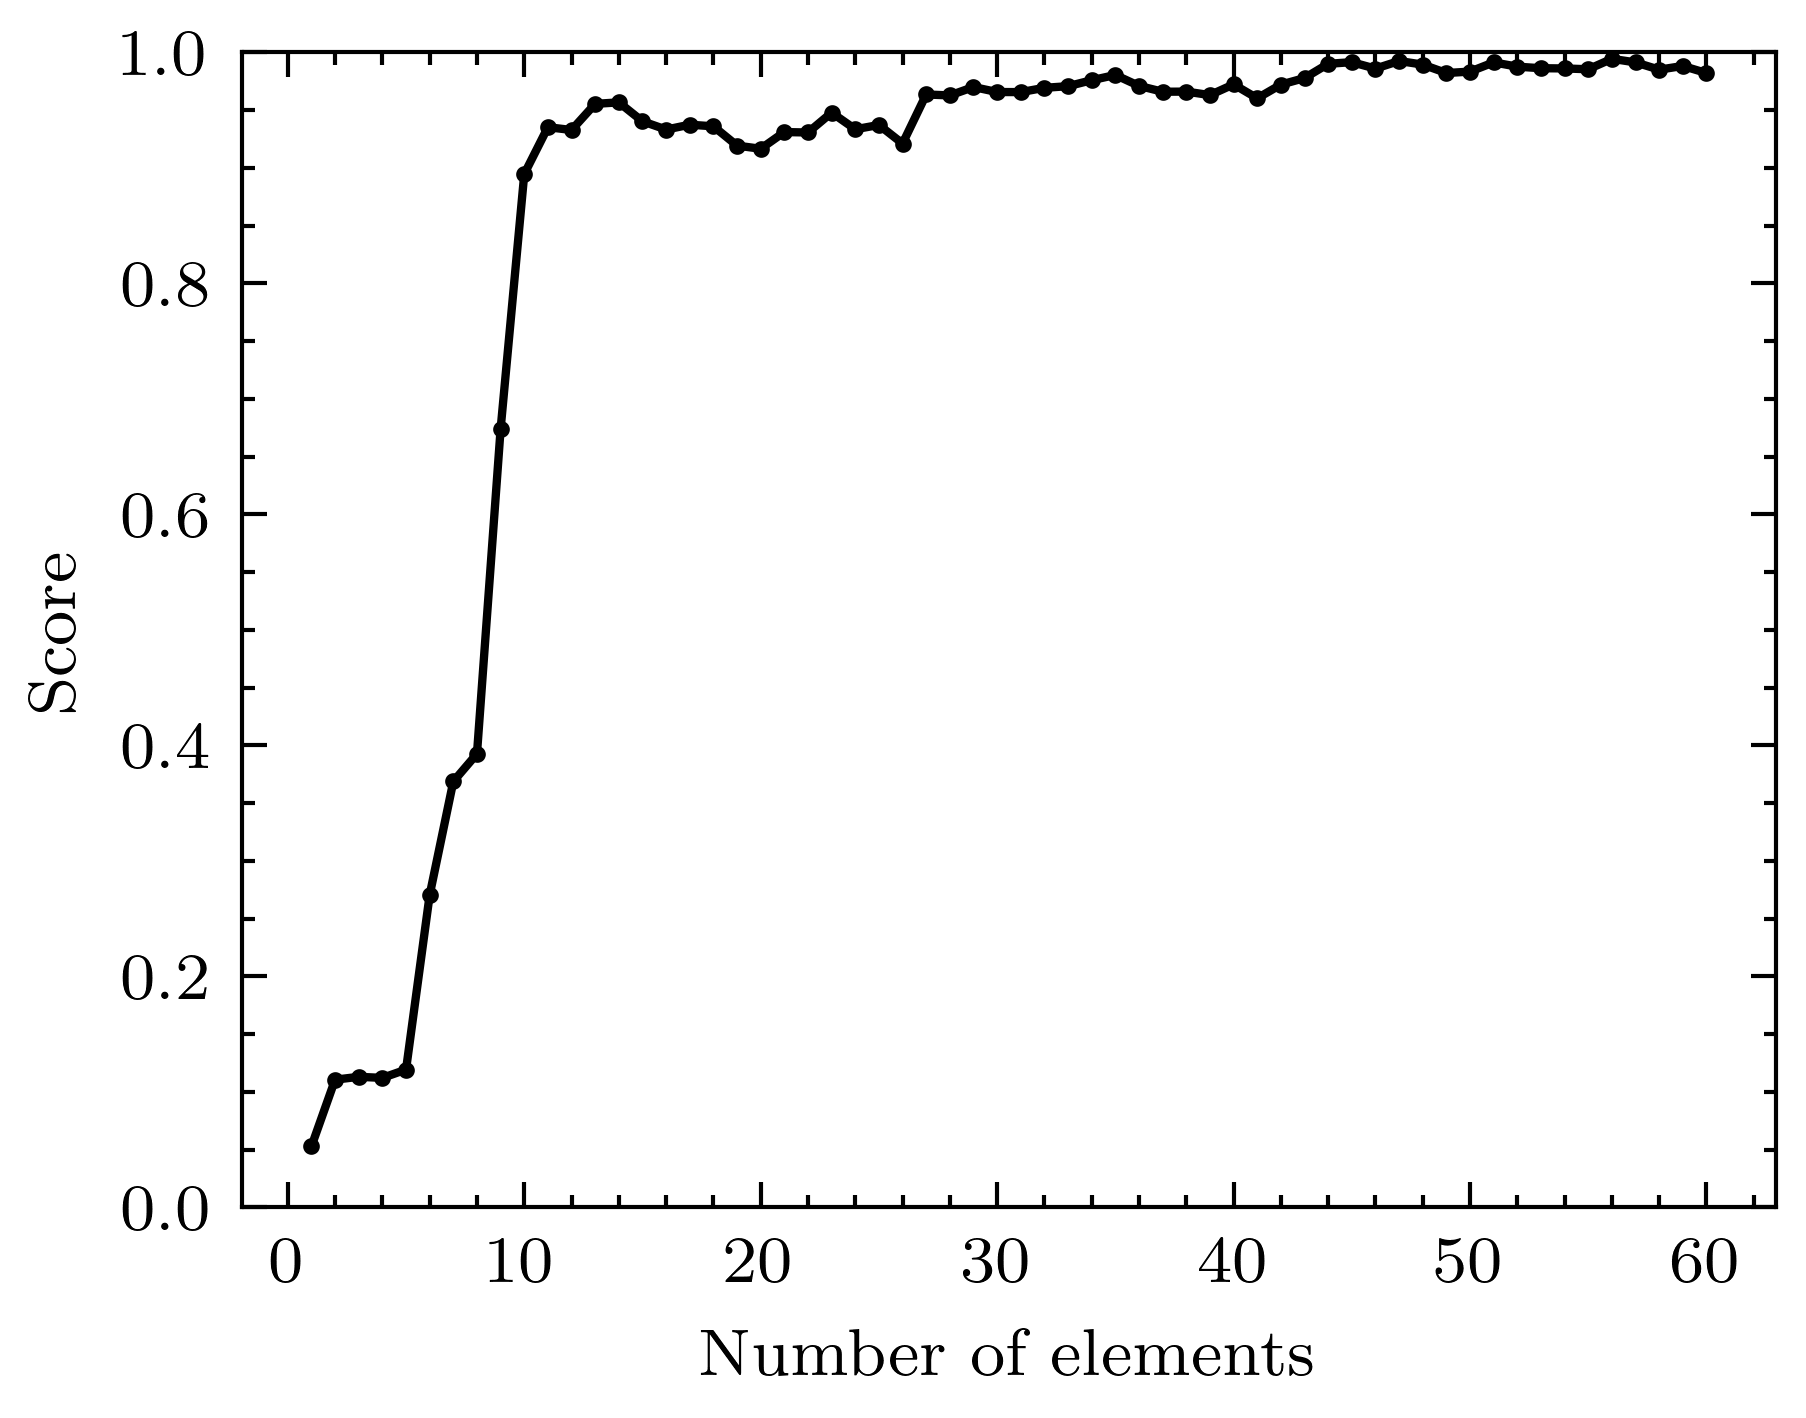

In [77]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

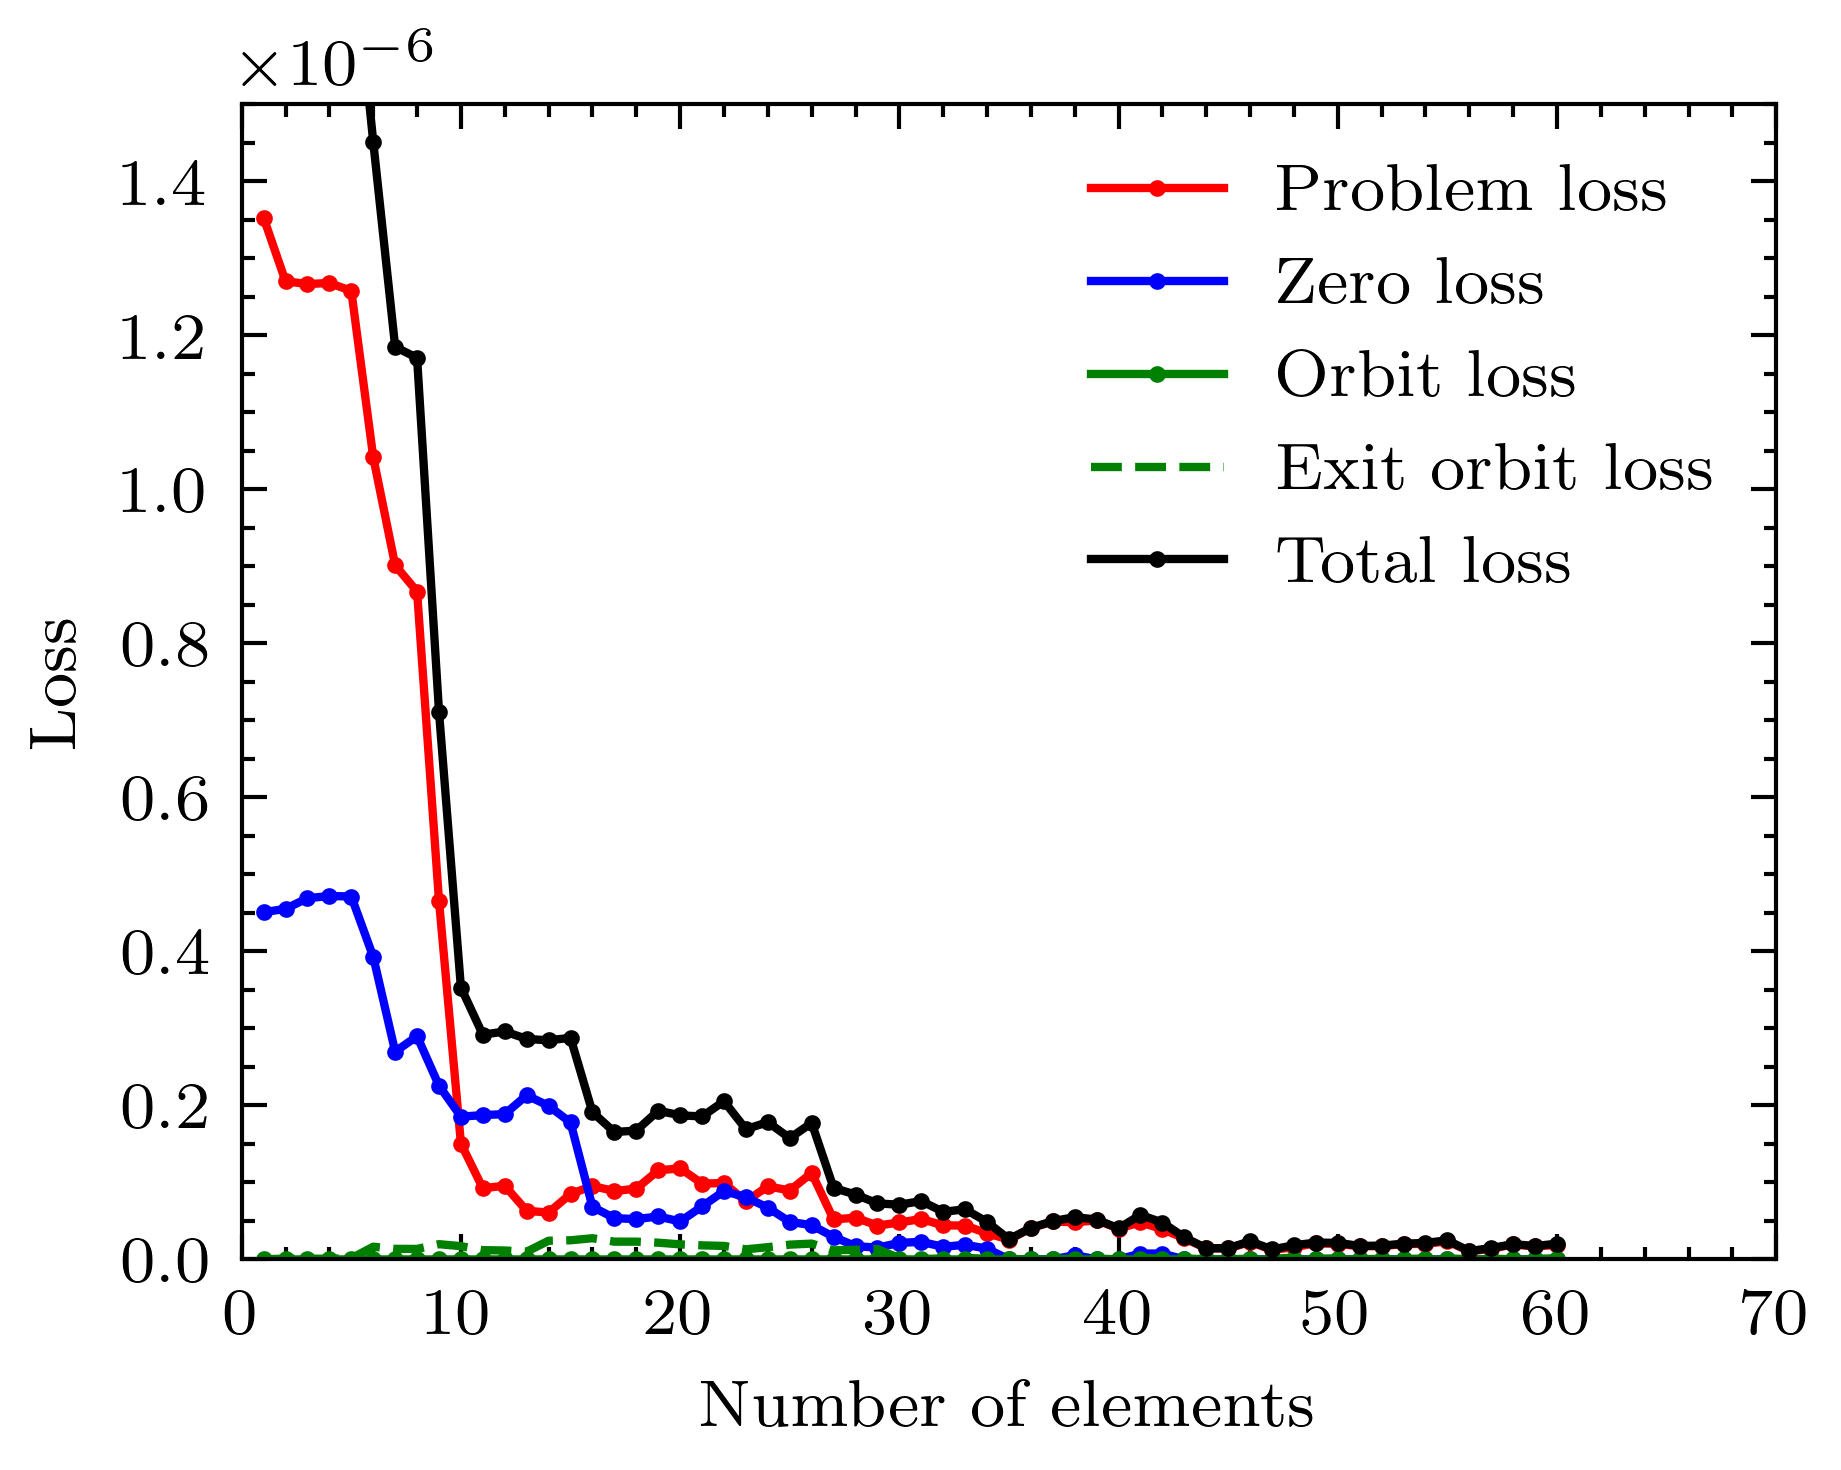

In [78]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y8**

In [87]:
FOLDER = "data/learning_storage/forward_backward/Y8_omp"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
6   regularizer_mod_5_4  5.000000e-07           1   
27  regularizer_mod_5_4  5.000000e-07           2   
49  regularizer_mod_5_4  5.000000e-07           3   
44  regularizer_mod_5_4  5.000000e-07           4   
36  regularizer_mod_5_4  5.000000e-07           5   
37  regularizer_mod_5_4  5.000000e-07           6   
4   regularizer_mod_5_4  5.000000e-07           7   
22  regularizer_mod_5_4  5.000000e-07           8   
58  regularizer_mod_5_4  5.000000e-07           9   
40  regularizer_mod_5_4  5.000000e-07          10   
0   regularizer_mod_5_4  5.000000e-07          11   
32  regularizer_mod_5_4  5.000000e-07          12   
50  regularizer_mod_5_4  5.000000e-07          13   
25  regularizer_mod_5_4  5.000000e-07          14   
55  regularizer_mod_5_4  5.000000e-07          15   
16  regularizer_mod_5_4  5.000000e-07          16   
21  regularizer_mod_5_4  5.000000e-07          17   
8   regularizer_mod_5_4  5.000

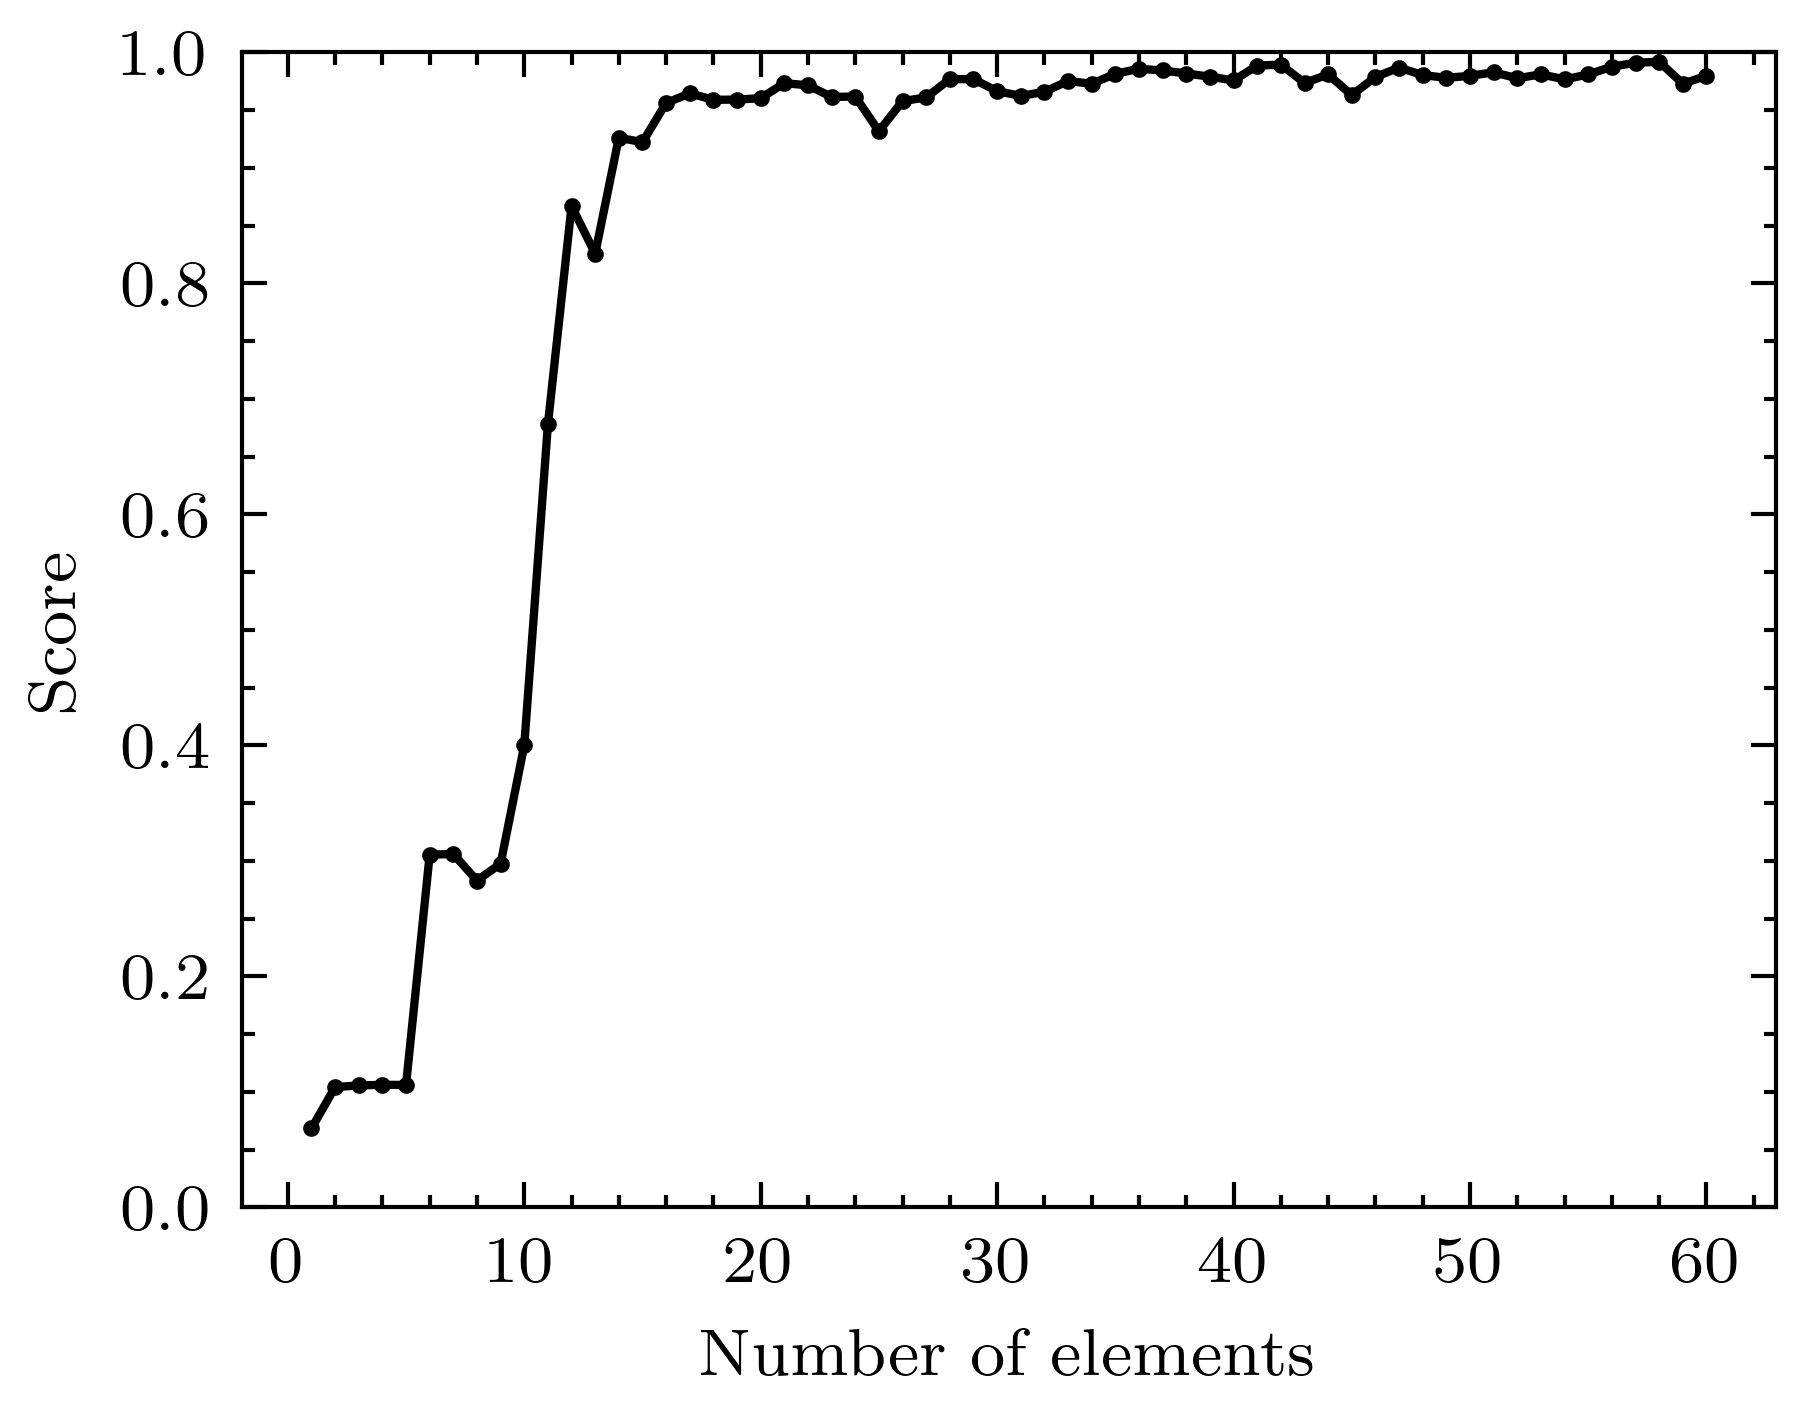

In [88]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

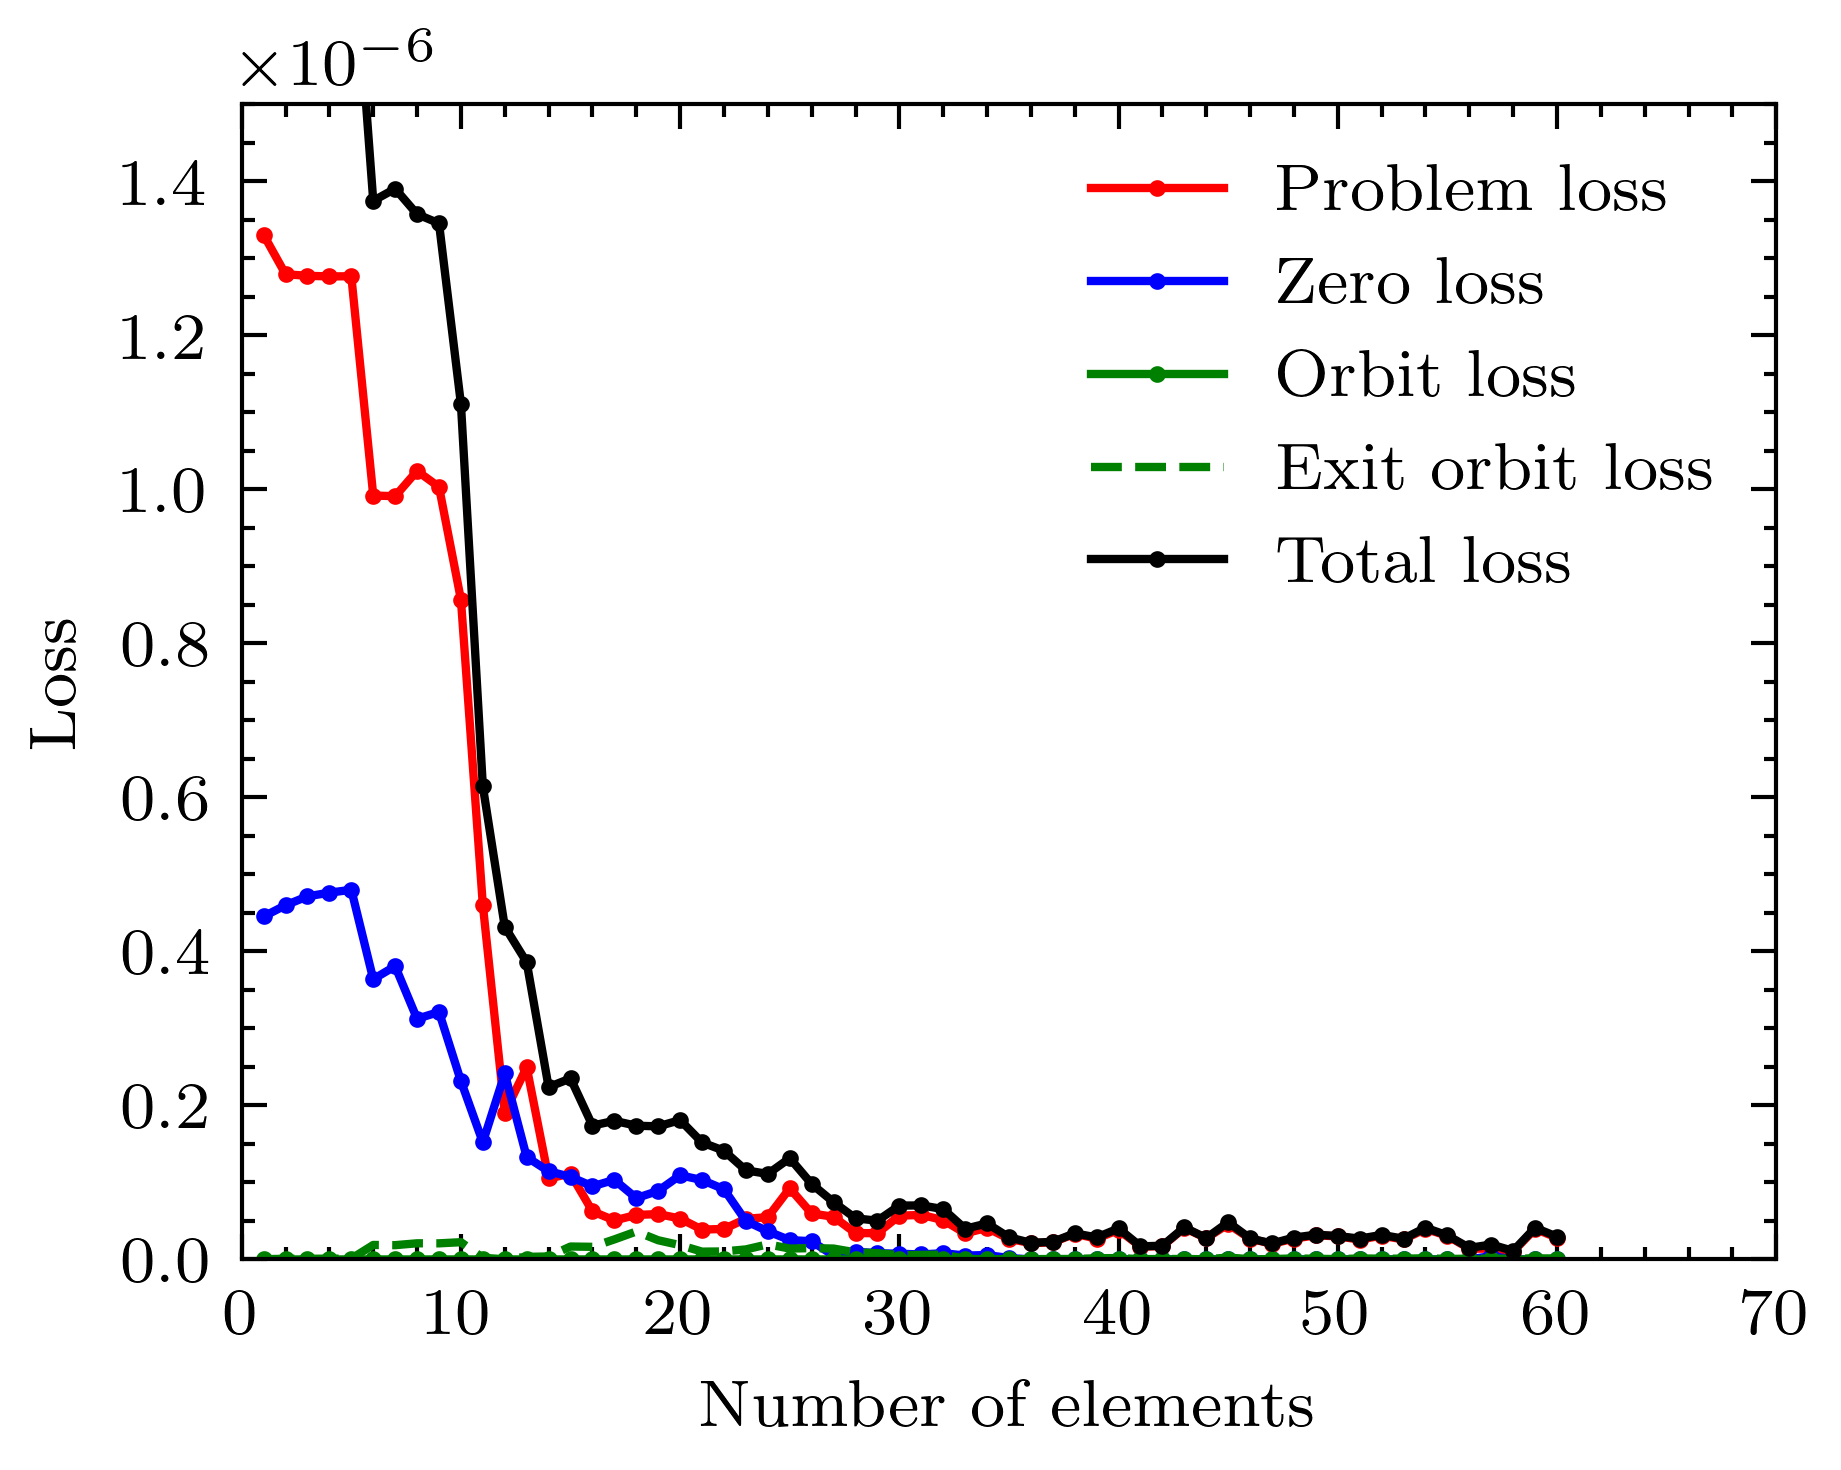

In [89]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y9**

In [90]:
FOLDER = "data/learning_storage/forward_backward/Y9_omp"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
43  regularizer_mod_5_4  5.000000e-07           1   
50  regularizer_mod_5_4  5.000000e-07           2   
38  regularizer_mod_5_4  5.000000e-07           3   
48  regularizer_mod_5_4  5.000000e-07           4   
37  regularizer_mod_5_4  5.000000e-07           5   
18  regularizer_mod_5_4  5.000000e-07           6   
1   regularizer_mod_5_4  5.000000e-07           7   
20  regularizer_mod_5_4  5.000000e-07           8   
54  regularizer_mod_5_4  5.000000e-07           9   
11  regularizer_mod_5_4  5.000000e-07          10   
23  regularizer_mod_5_4  5.000000e-07          11   
8   regularizer_mod_5_4  5.000000e-07          12   
47  regularizer_mod_5_4  5.000000e-07          13   
34  regularizer_mod_5_4  5.000000e-07          14   
0   regularizer_mod_5_4  5.000000e-07          15   
45  regularizer_mod_5_4  5.000000e-07          16   
2   regularizer_mod_5_4  5.000000e-07          17   
25  regularizer_mod_5_4  5.000

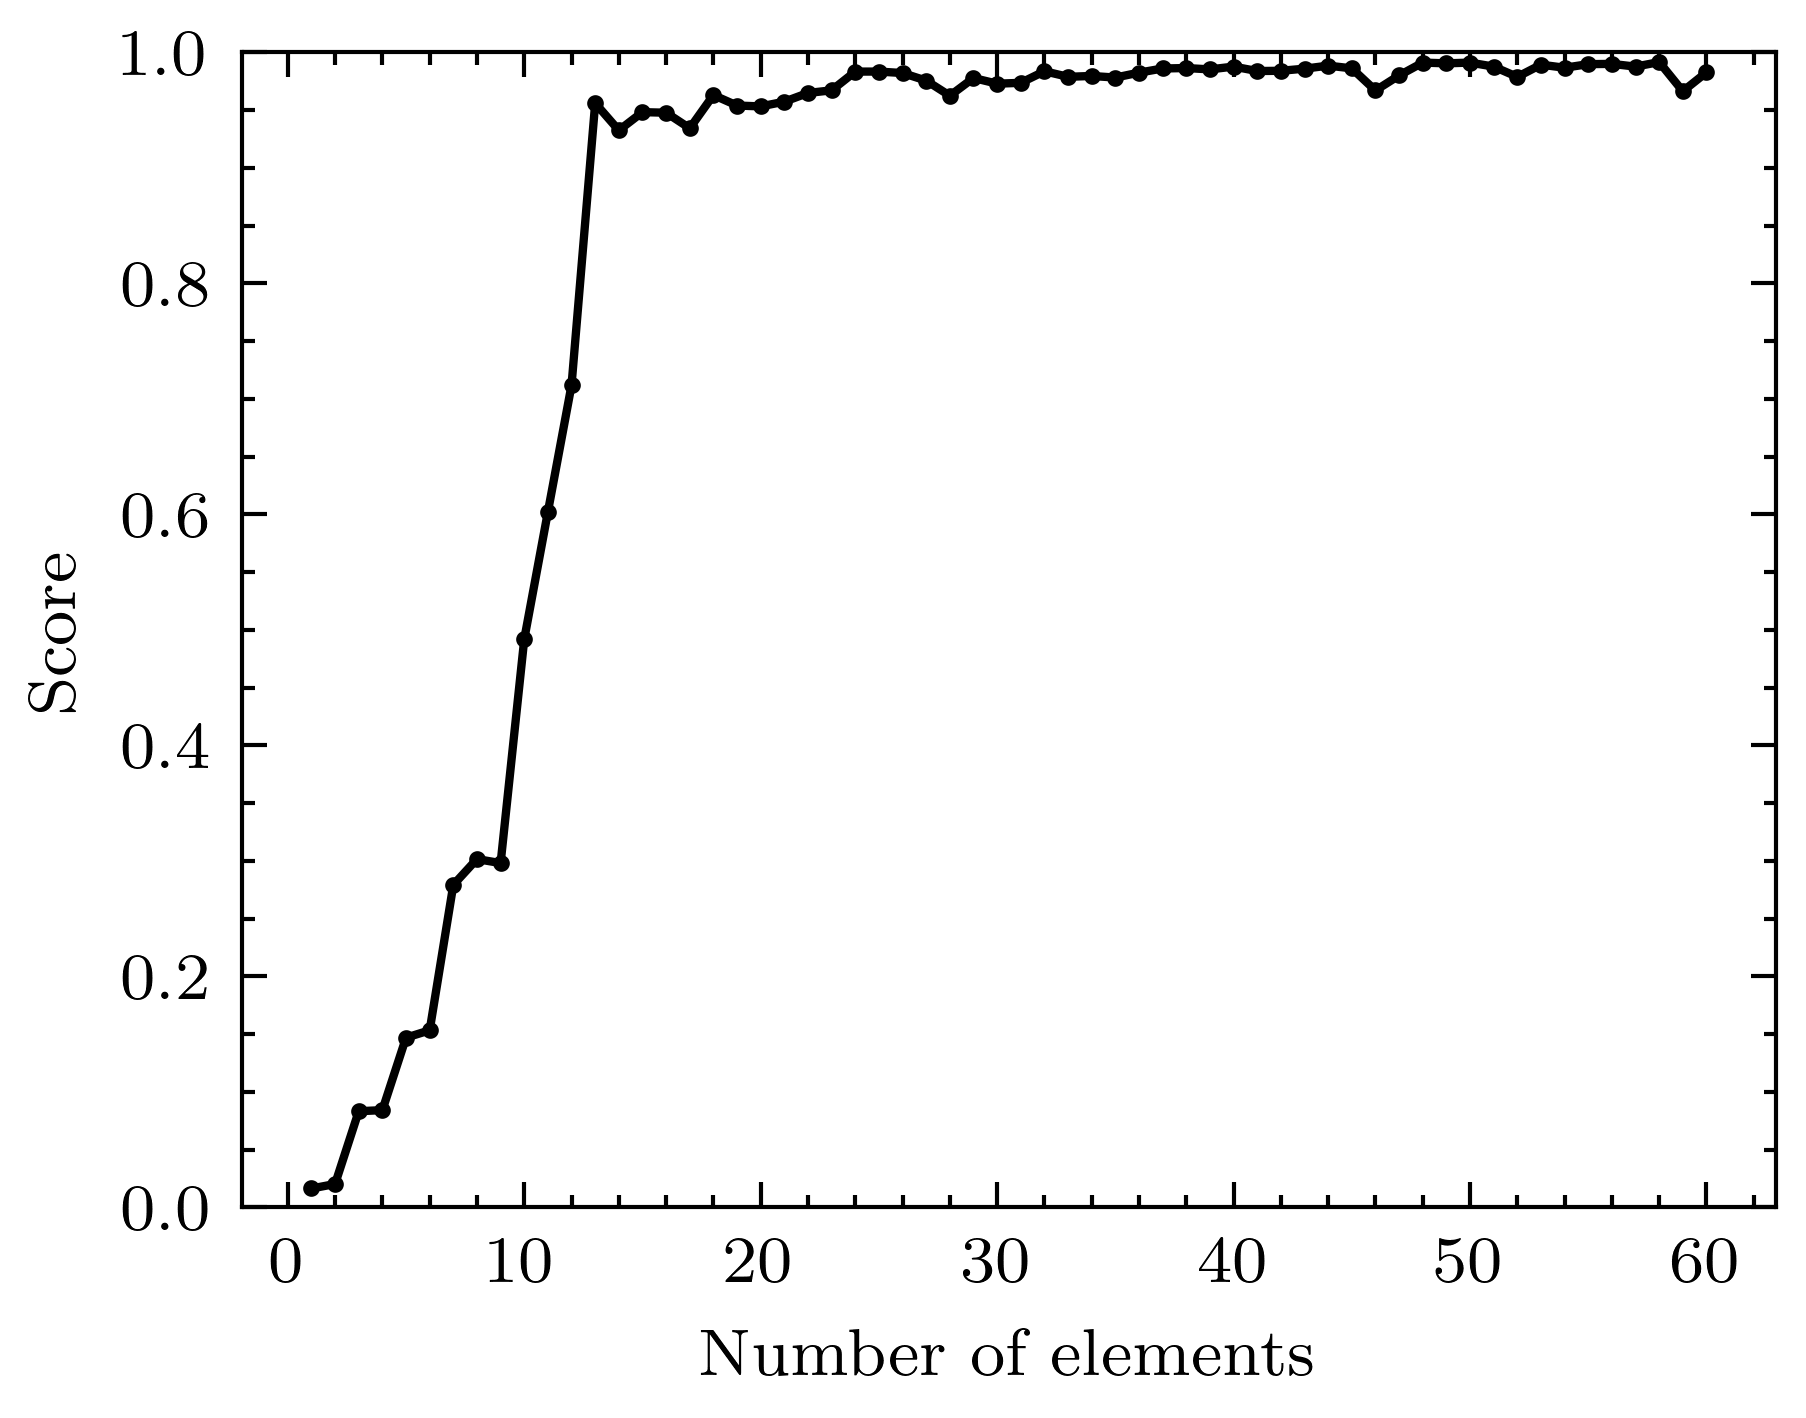

In [91]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

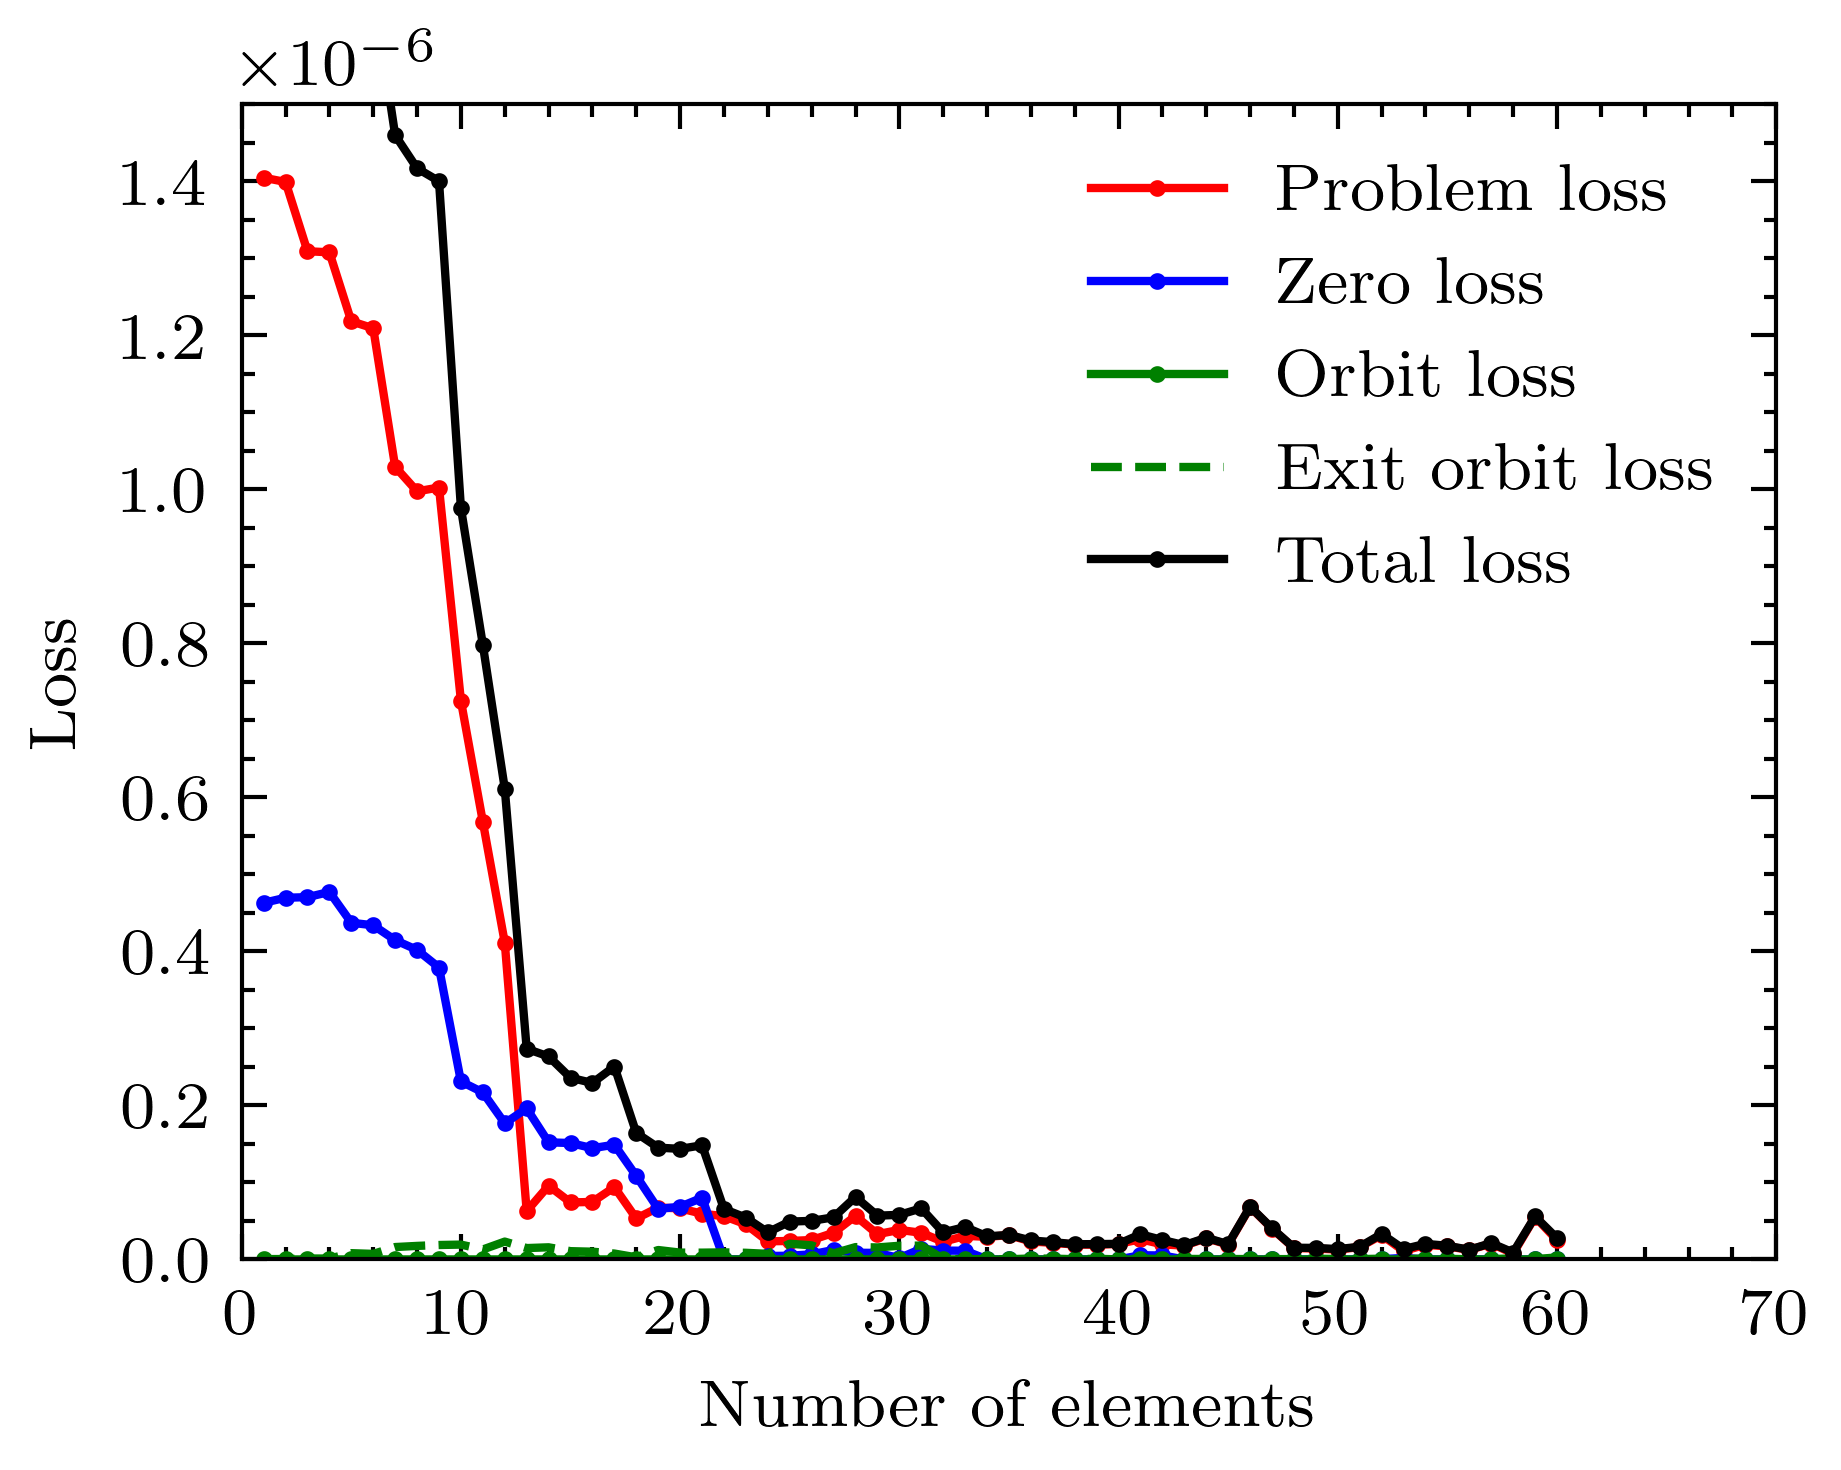

In [92]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y10**

In [103]:
FOLDER = "data/learning_storage/forward_backward/Y10_omp"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
31  regularizer_mod_5_4  5.000000e-07           1   
21  regularizer_mod_5_4  5.000000e-07           2   
24  regularizer_mod_5_4  5.000000e-07           3   
40  regularizer_mod_5_4  5.000000e-07           4   
27  regularizer_mod_5_4  5.000000e-07           5   
15  regularizer_mod_5_4  5.000000e-07           6   
48  regularizer_mod_5_4  5.000000e-07           7   
9   regularizer_mod_5_4  5.000000e-07           8   
3   regularizer_mod_5_4  5.000000e-07           9   
17  regularizer_mod_5_4  5.000000e-07          10   
23  regularizer_mod_5_4  5.000000e-07          11   
13  regularizer_mod_5_4  5.000000e-07          12   
54  regularizer_mod_5_4  5.000000e-07          13   
1   regularizer_mod_5_4  5.000000e-07          14   
37  regularizer_mod_5_4  5.000000e-07          15   
16  regularizer_mod_5_4  5.000000e-07          16   
2   regularizer_mod_5_4  5.000000e-07          17   
26  regularizer_mod_5_4  5.000

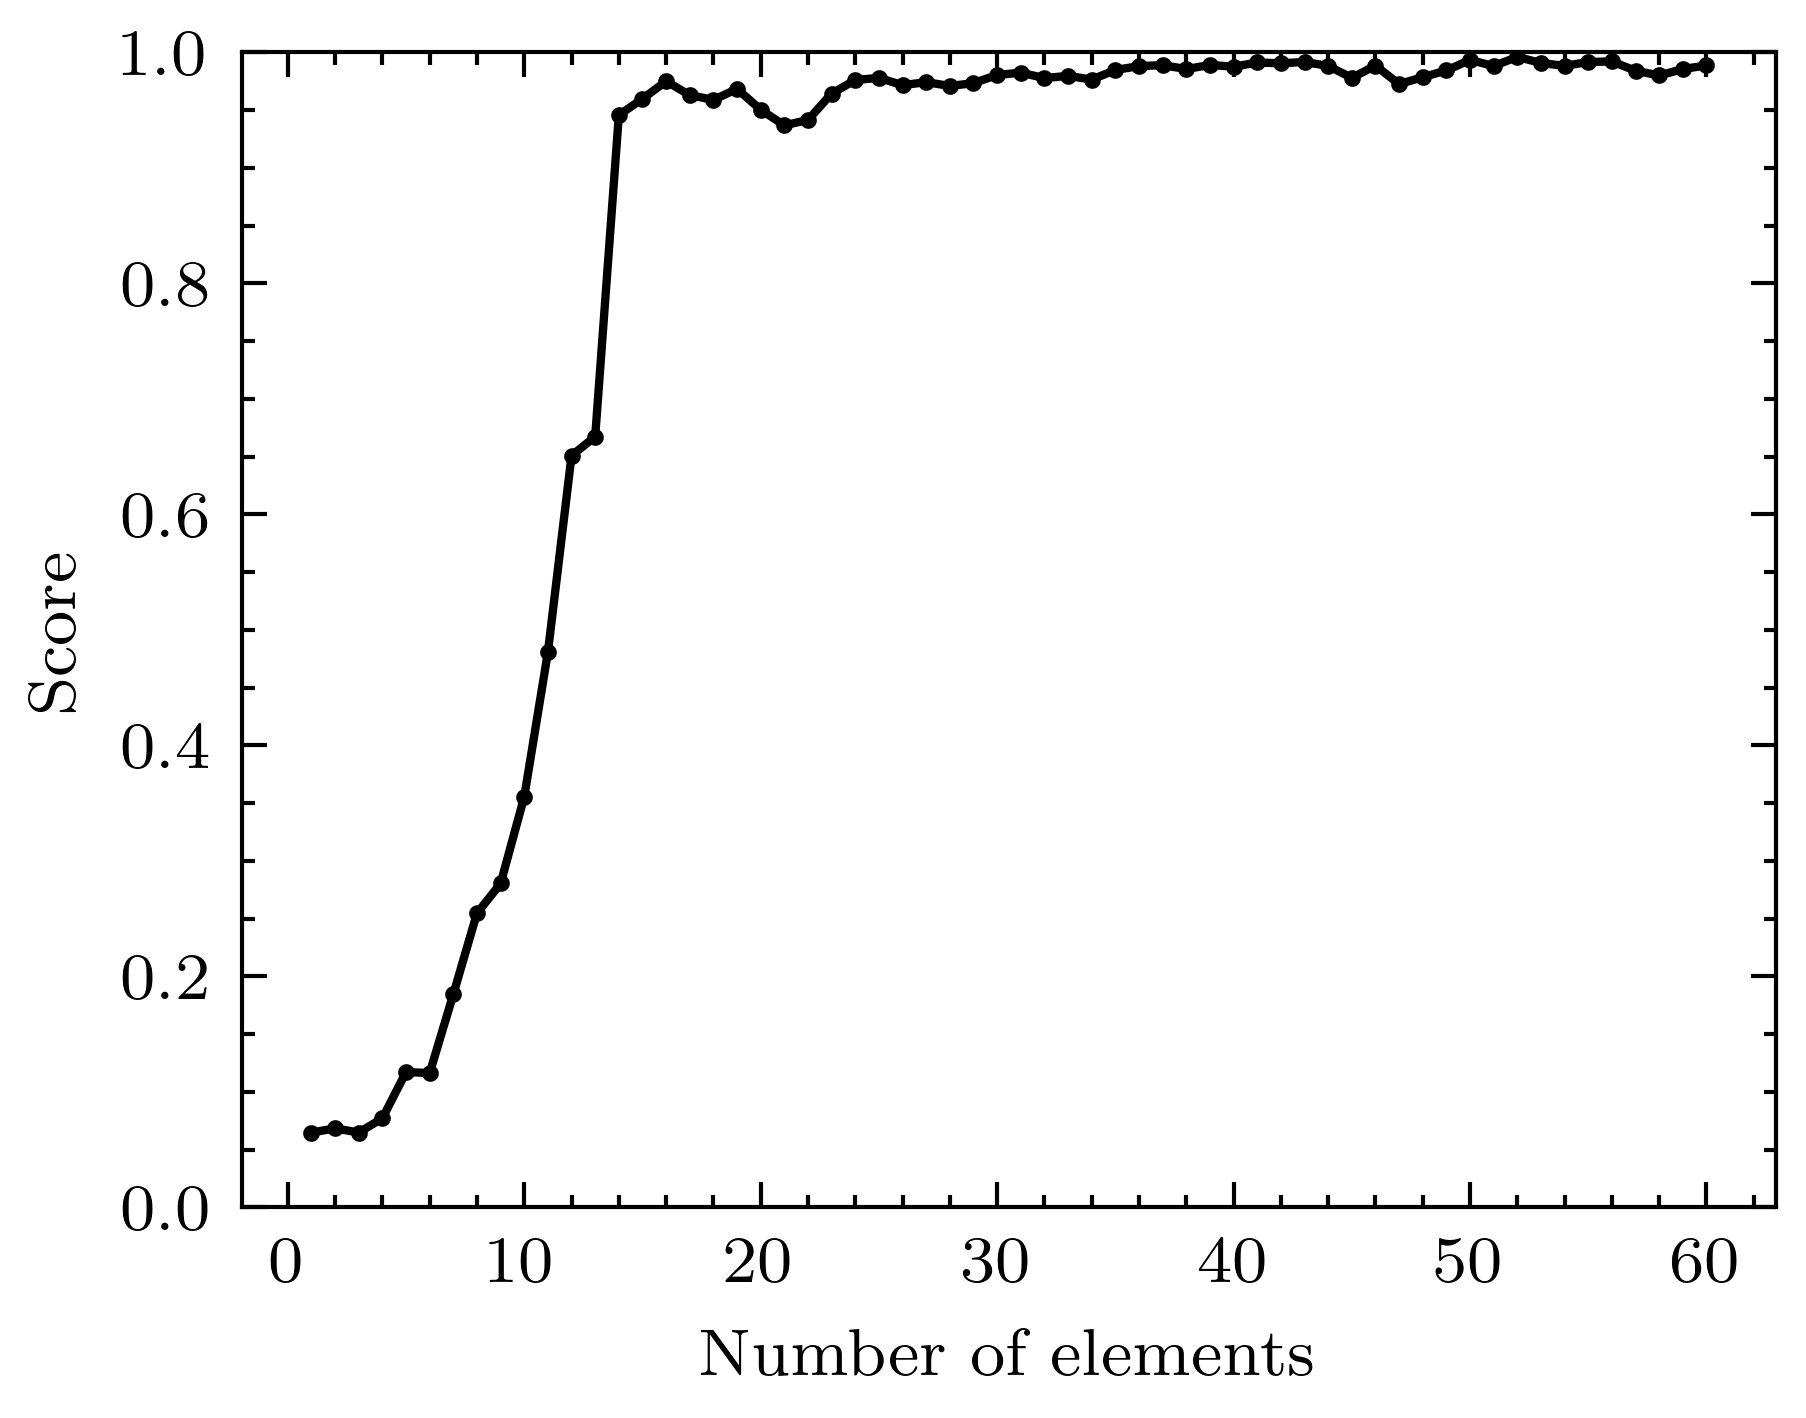

In [104]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

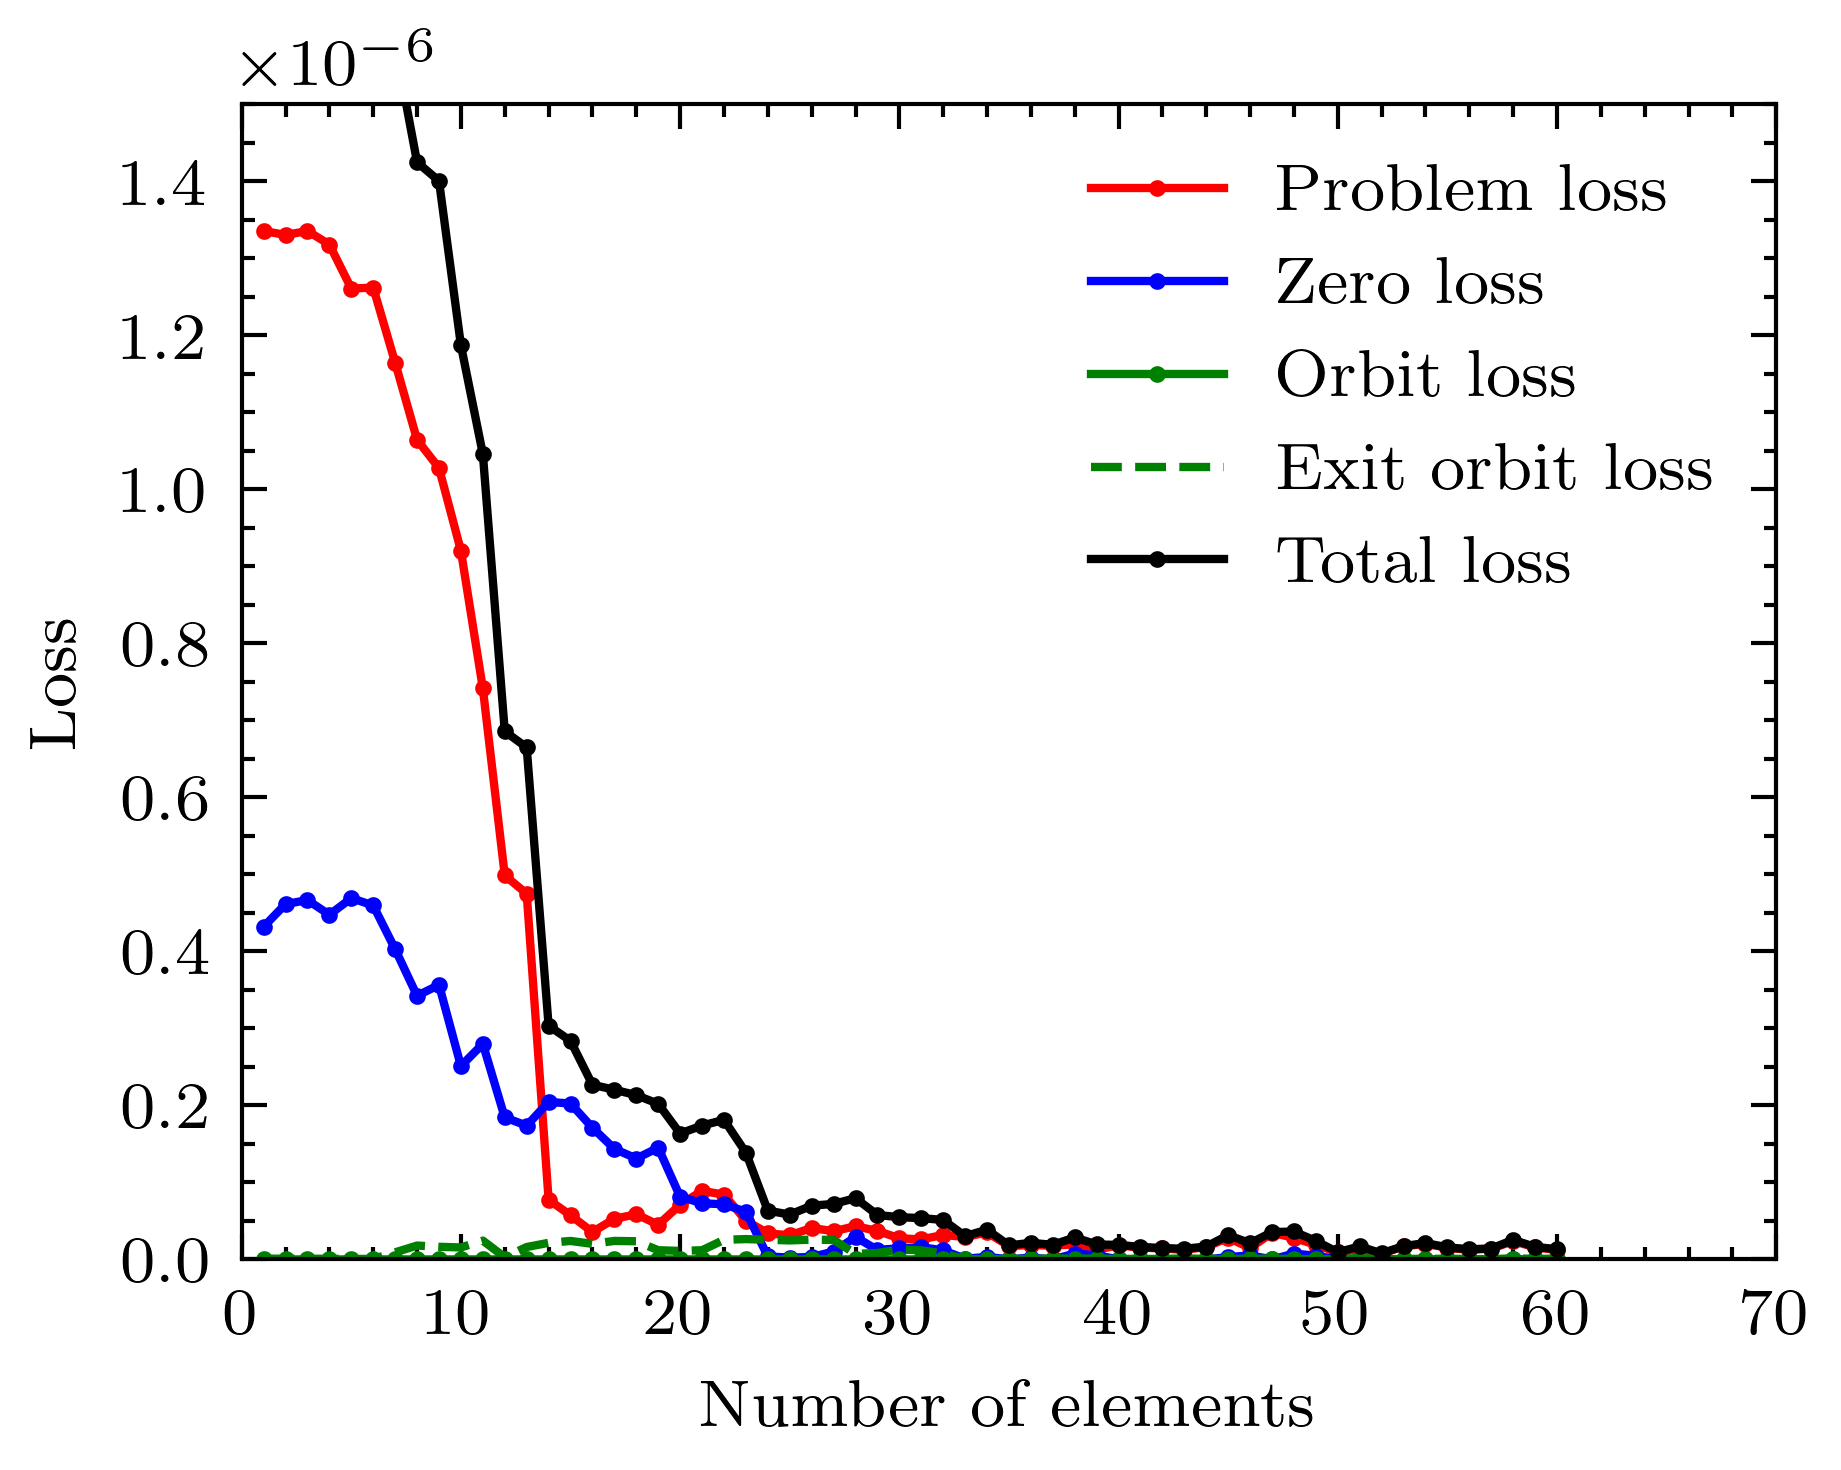

In [105]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Another check I want to do is to test **OMP** where the initial set of weights is zeroed. I want to test this to see how the initial guess affect the final performance. Because it is possible that with the initial guess we remain in the local minimum.

Knob **Y1**

In [112]:
FOLDER = "data/learning_storage/forward_backward/Y1_omp_zero"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
30  regularizer_mod_5_4  5.000000e-07           1   
50  regularizer_mod_5_4  5.000000e-07           2   
57  regularizer_mod_5_4  5.000000e-07           3   
17  regularizer_mod_5_4  5.000000e-07           4   
48  regularizer_mod_5_4  5.000000e-07           5   
41  regularizer_mod_5_4  5.000000e-07           6   
14  regularizer_mod_5_4  5.000000e-07           7   
36  regularizer_mod_5_4  5.000000e-07           8   
39  regularizer_mod_5_4  5.000000e-07           9   
28  regularizer_mod_5_4  5.000000e-07          10   
55  regularizer_mod_5_4  5.000000e-07          11   
37  regularizer_mod_5_4  5.000000e-07          12   
43  regularizer_mod_5_4  5.000000e-07          13   
12  regularizer_mod_5_4  5.000000e-07          14   
25  regularizer_mod_5_4  5.000000e-07          15   
20  regularizer_mod_5_4  5.000000e-07          16   
0   regularizer_mod_5_4  5.000000e-07          17   
16  regularizer_mod_5_4  5.000

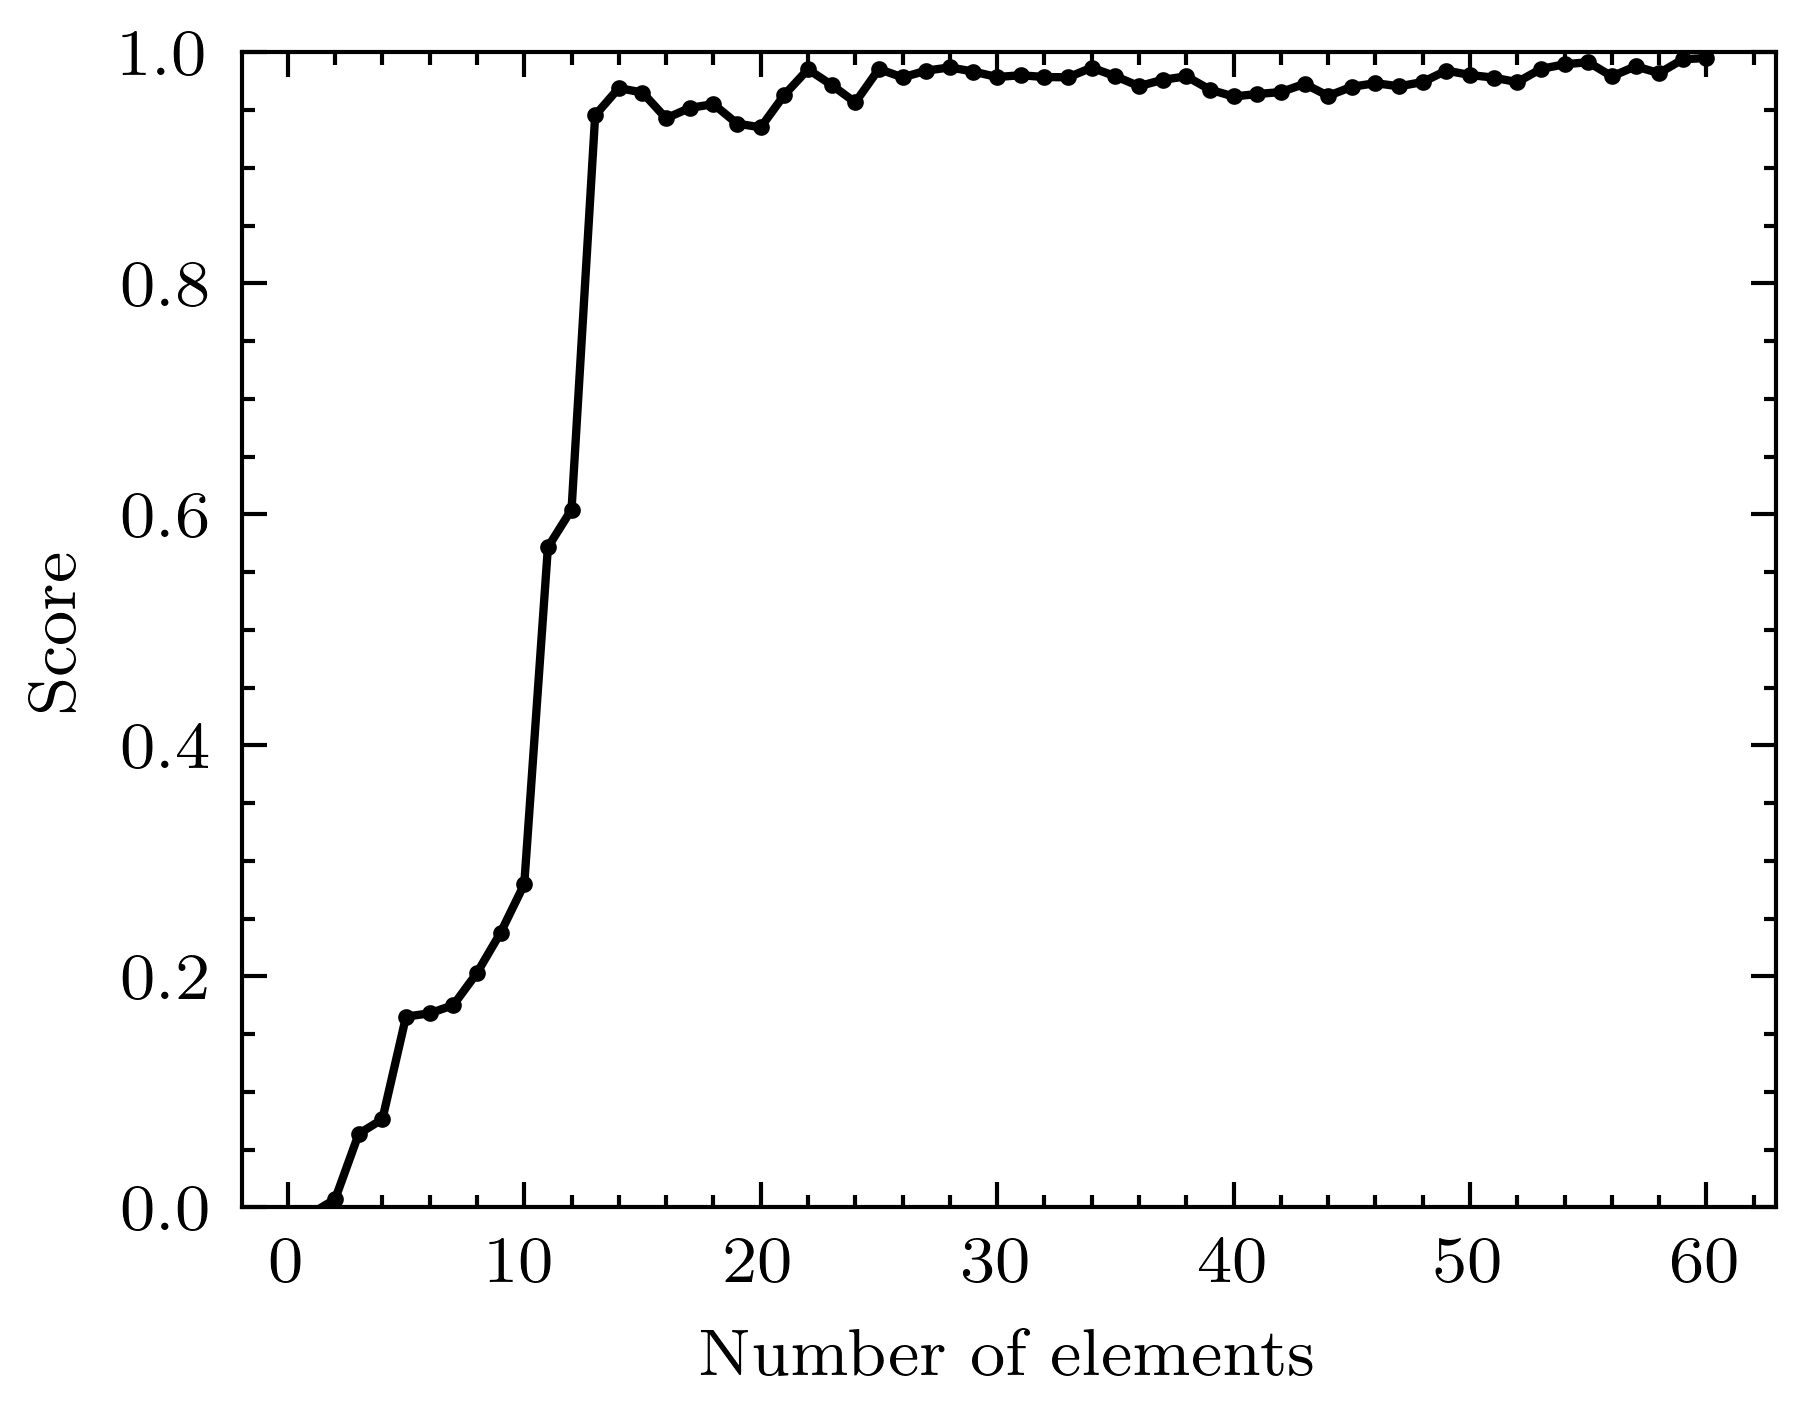

In [113]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

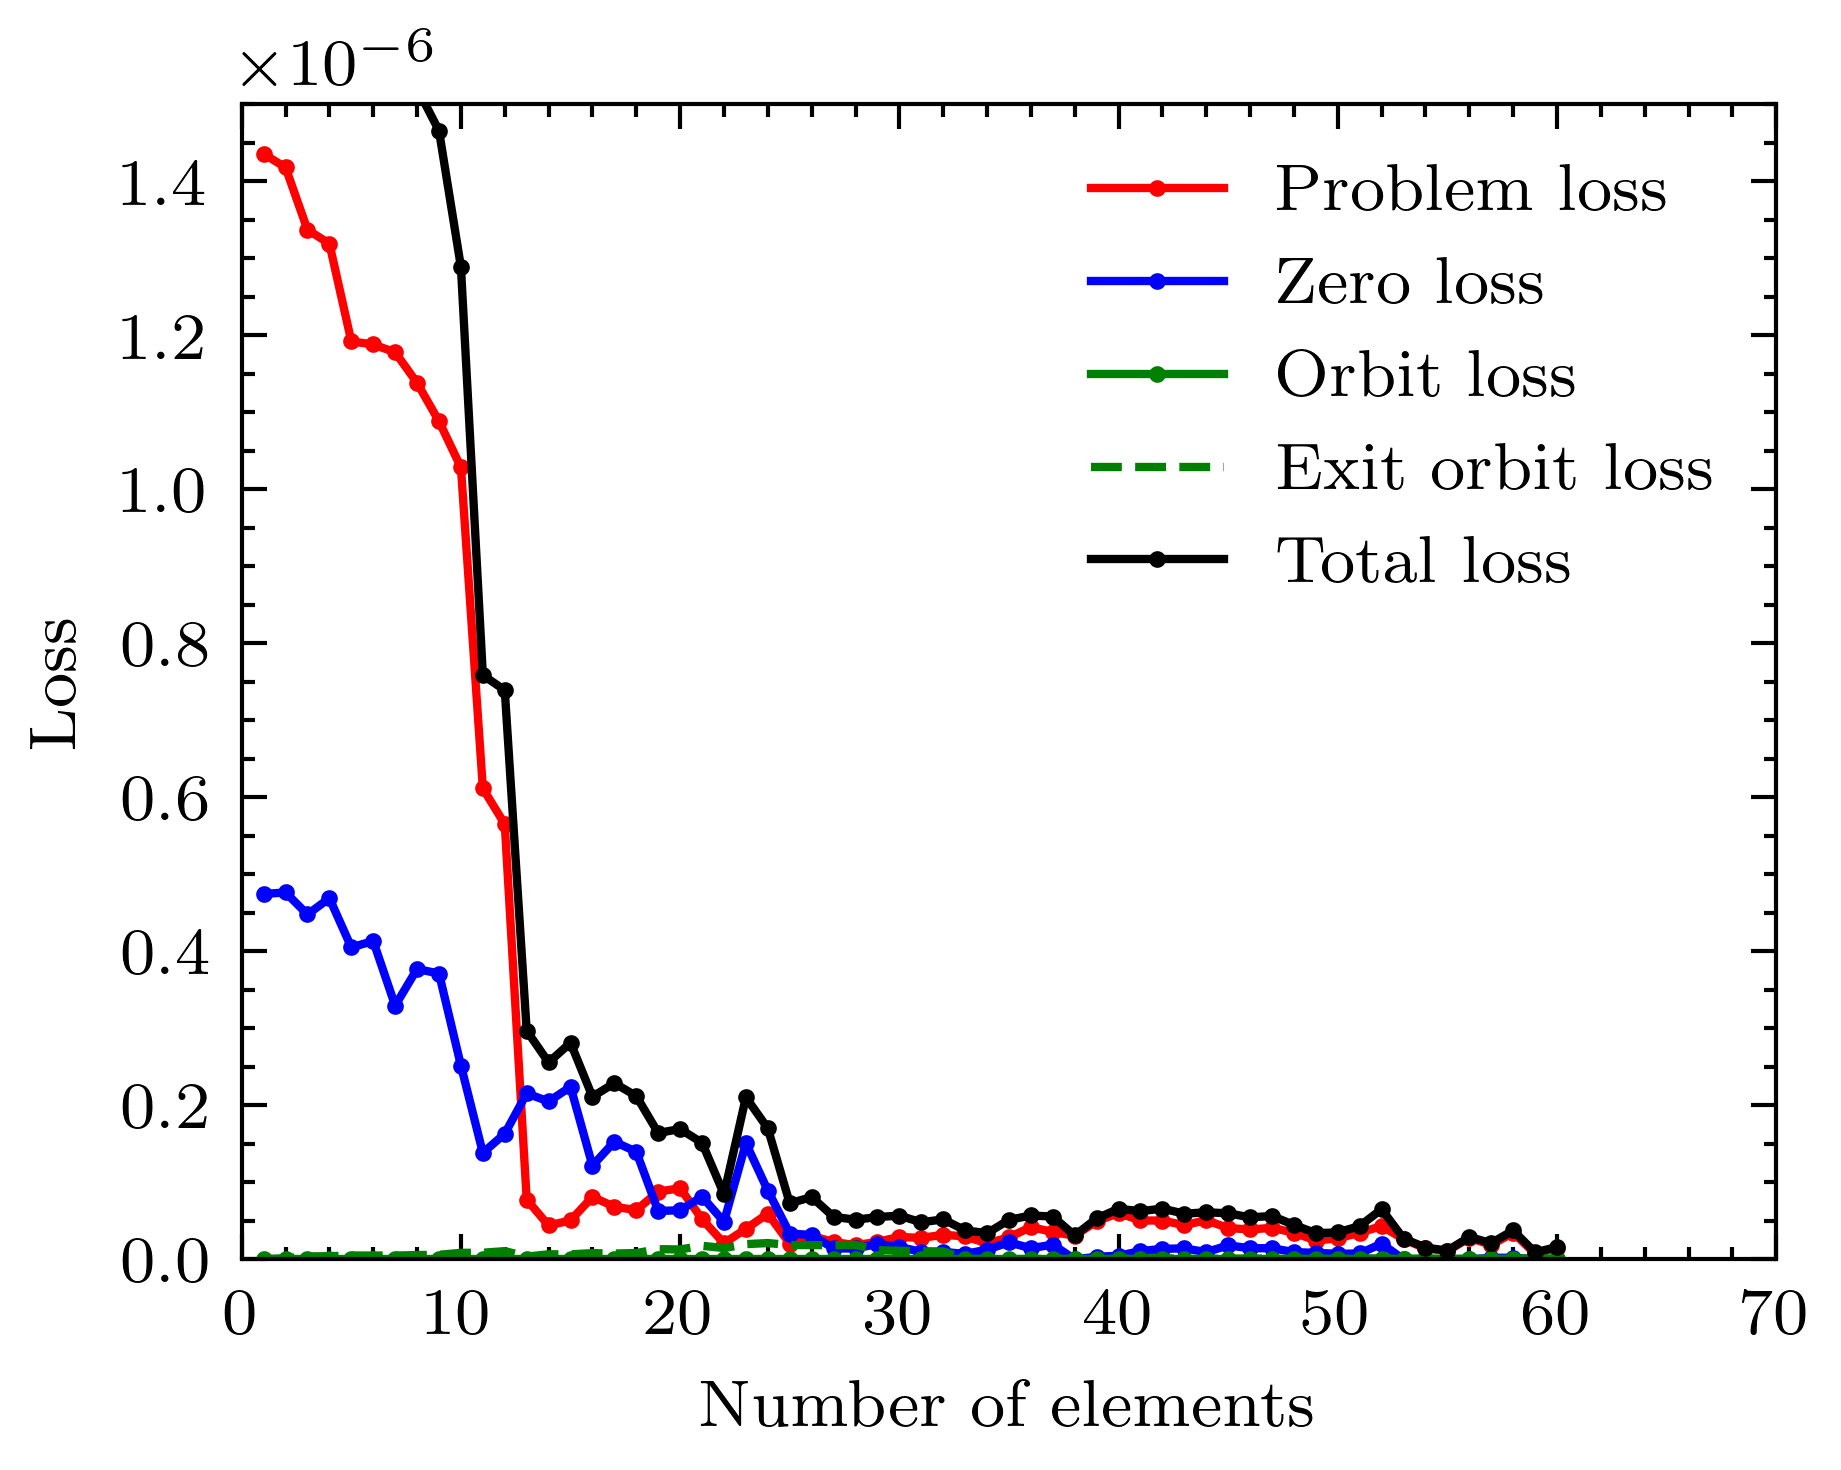

In [114]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y2**

In [119]:
FOLDER = "data/learning_storage/forward_backward/Y2_omp_zero"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
37  regularizer_mod_5_4  5.000000e-07           1   
51  regularizer_mod_5_4  5.000000e-07           2   
44  regularizer_mod_5_4  5.000000e-07           3   
25  regularizer_mod_5_4  5.000000e-07           4   
1   regularizer_mod_5_4  5.000000e-07           5   
28  regularizer_mod_5_4  5.000000e-07           6   
49  regularizer_mod_5_4  5.000000e-07           7   
42  regularizer_mod_5_4  5.000000e-07           8   
15  regularizer_mod_5_4  5.000000e-07           9   
57  regularizer_mod_5_4  5.000000e-07          10   
29  regularizer_mod_5_4  5.000000e-07          11   
41  regularizer_mod_5_4  5.000000e-07          12   
34  regularizer_mod_5_4  5.000000e-07          13   
2   regularizer_mod_5_4  5.000000e-07          14   
59  regularizer_mod_5_4  5.000000e-07          15   
36  regularizer_mod_5_4  5.000000e-07          16   
30  regularizer_mod_5_4  5.000000e-07          17   
47  regularizer_mod_5_4  5.000

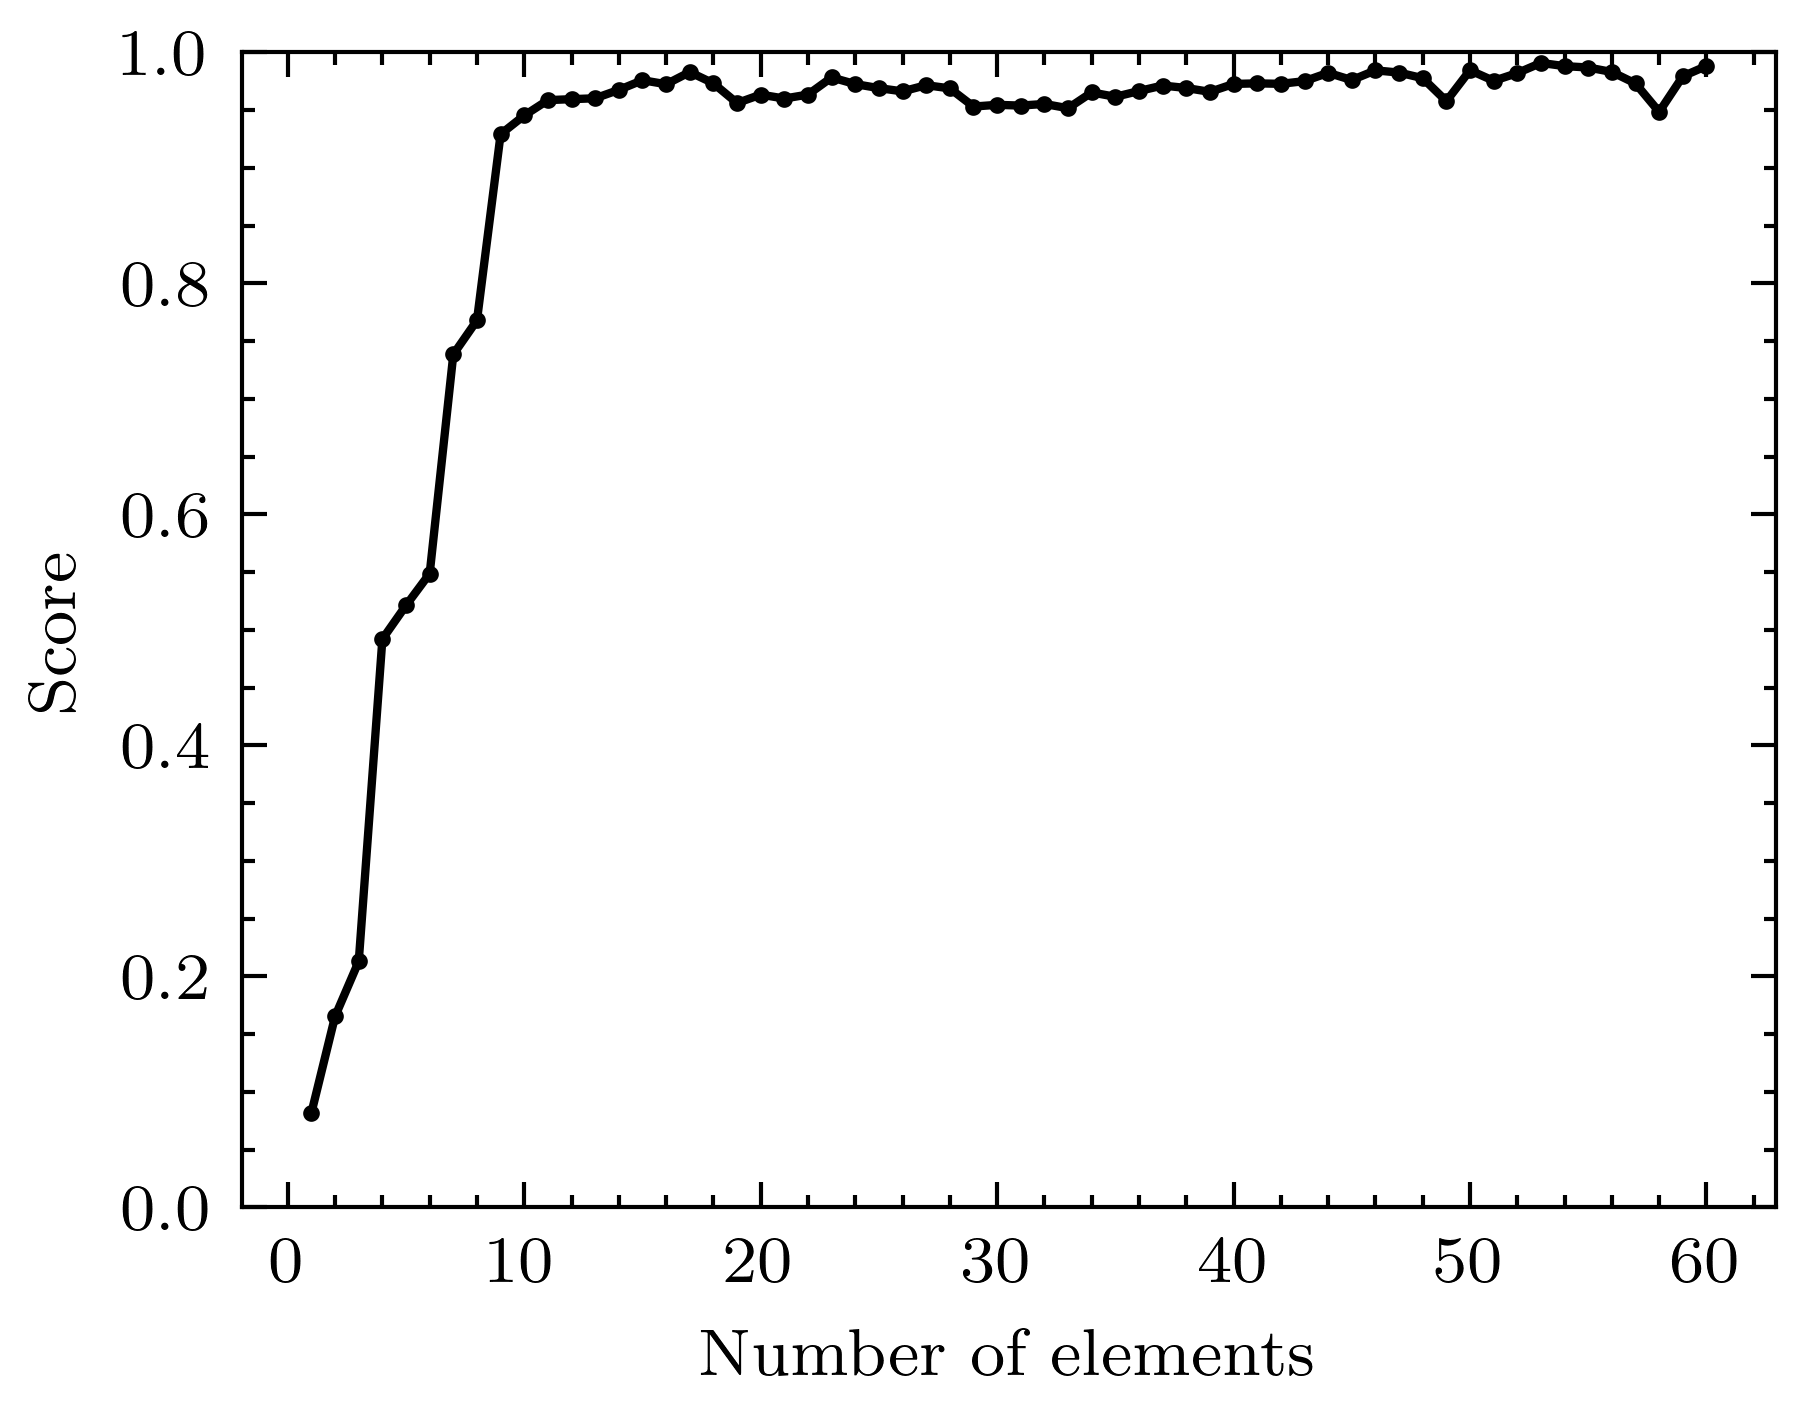

In [120]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

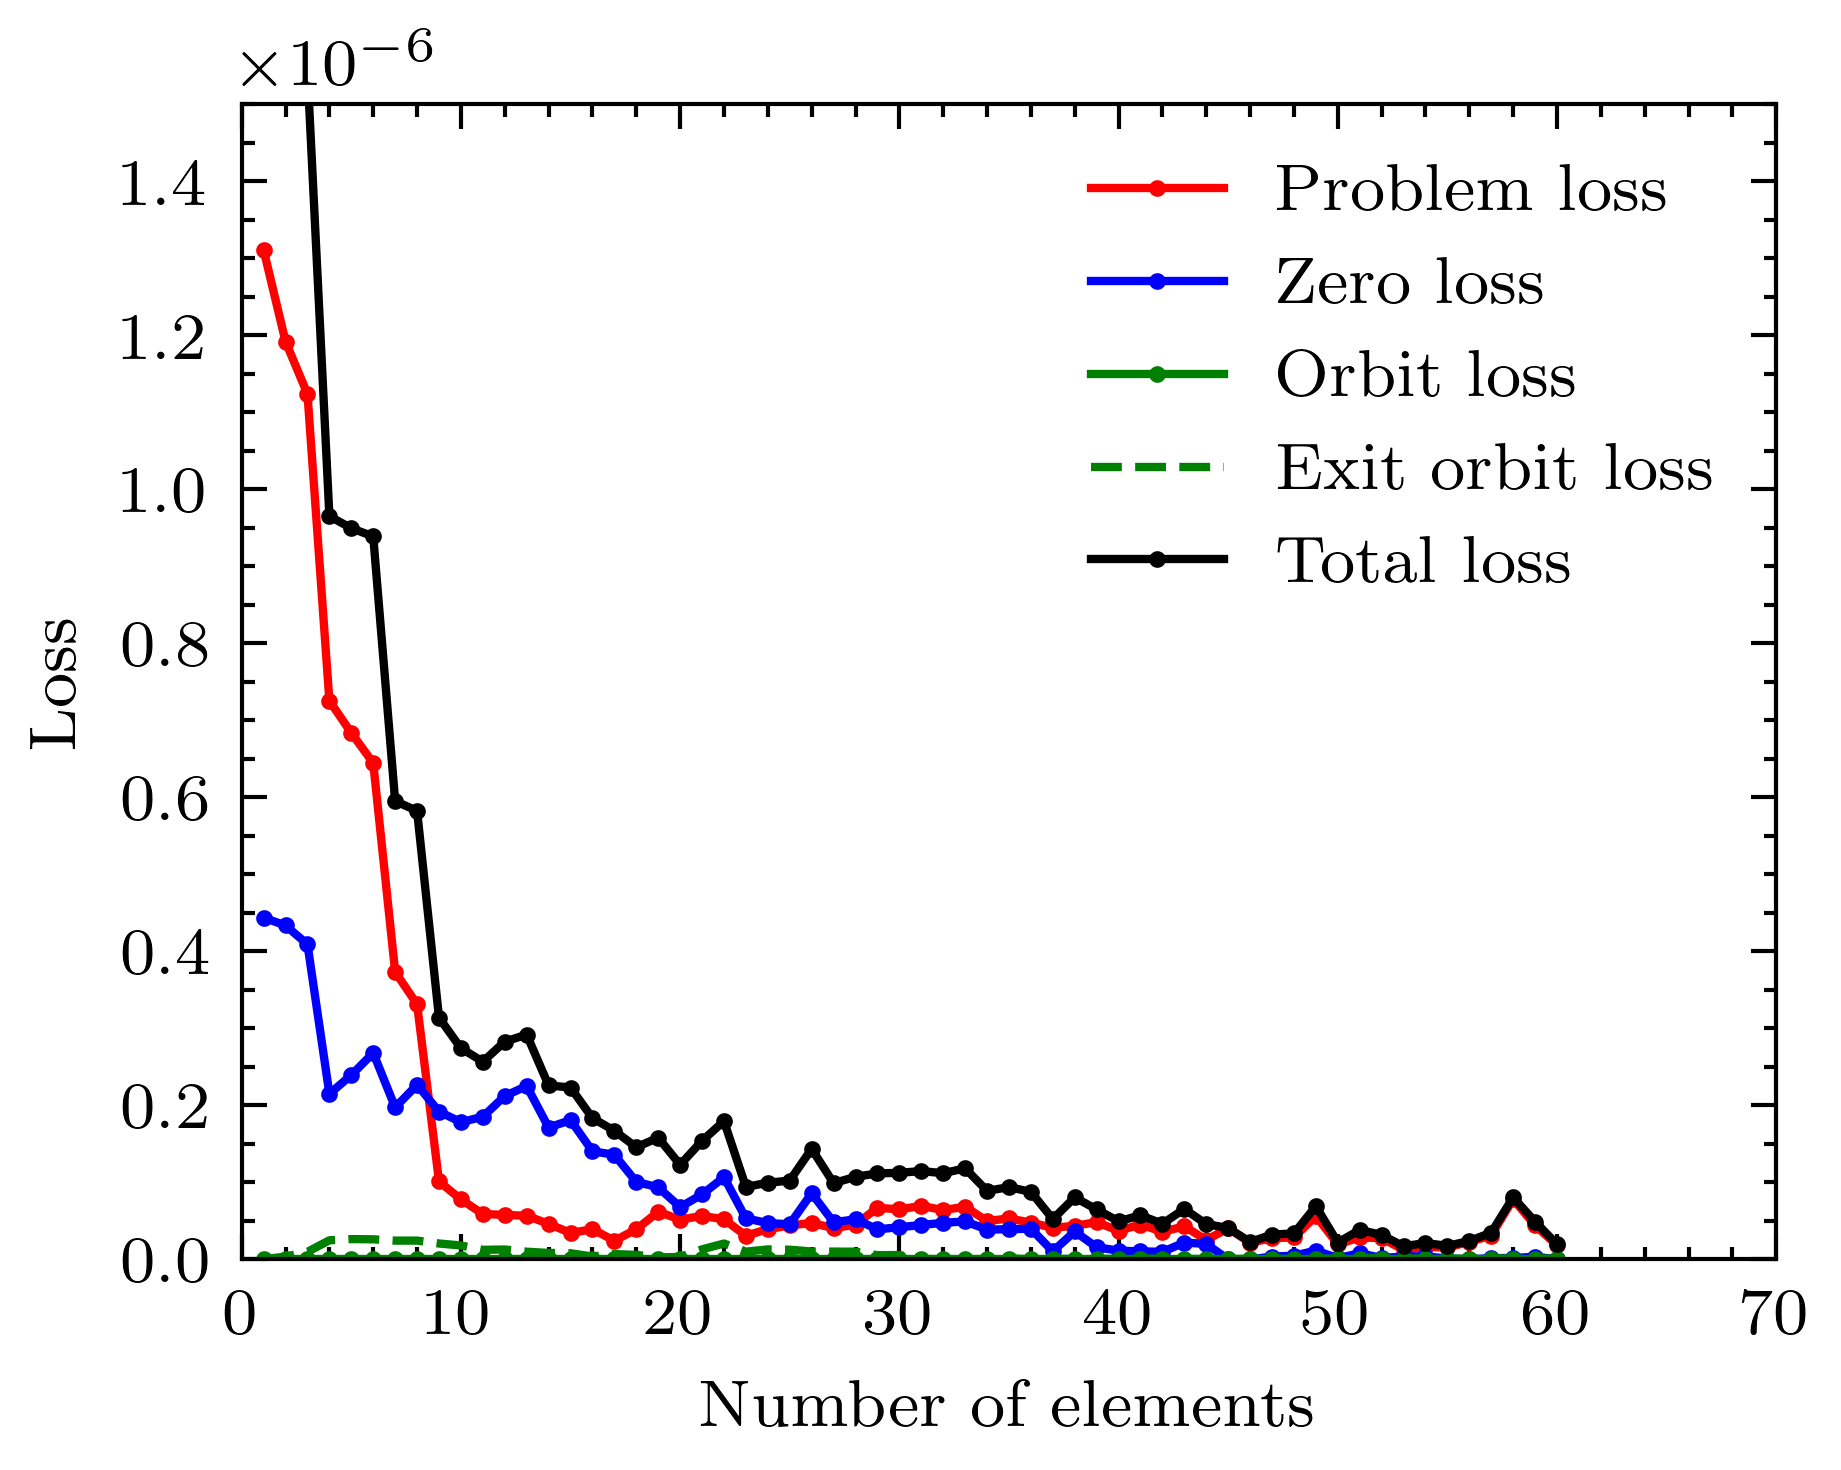

In [121]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y3**

In [125]:
FOLDER = "data/learning_storage/forward_backward/Y3_omp_zero"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
20  regularizer_mod_5_4  5.000000e-07           1   
39  regularizer_mod_5_4  5.000000e-07           2   
17  regularizer_mod_5_4  5.000000e-07           3   
1   regularizer_mod_5_4  5.000000e-07           4   
10  regularizer_mod_5_4  5.000000e-07           5   
44  regularizer_mod_5_4  5.000000e-07           6   
31  regularizer_mod_5_4  5.000000e-07           7   
38  regularizer_mod_5_4  5.000000e-07           8   
12  regularizer_mod_5_4  5.000000e-07           9   
27  regularizer_mod_5_4  5.000000e-07          10   
21  regularizer_mod_5_4  5.000000e-07          11   
4   regularizer_mod_5_4  5.000000e-07          12   
35  regularizer_mod_5_4  5.000000e-07          13   
41  regularizer_mod_5_4  5.000000e-07          14   
7   regularizer_mod_5_4  5.000000e-07          15   
34  regularizer_mod_5_4  5.000000e-07          16   
3   regularizer_mod_5_4  5.000000e-07          17   
22  regularizer_mod_5_4  5.000

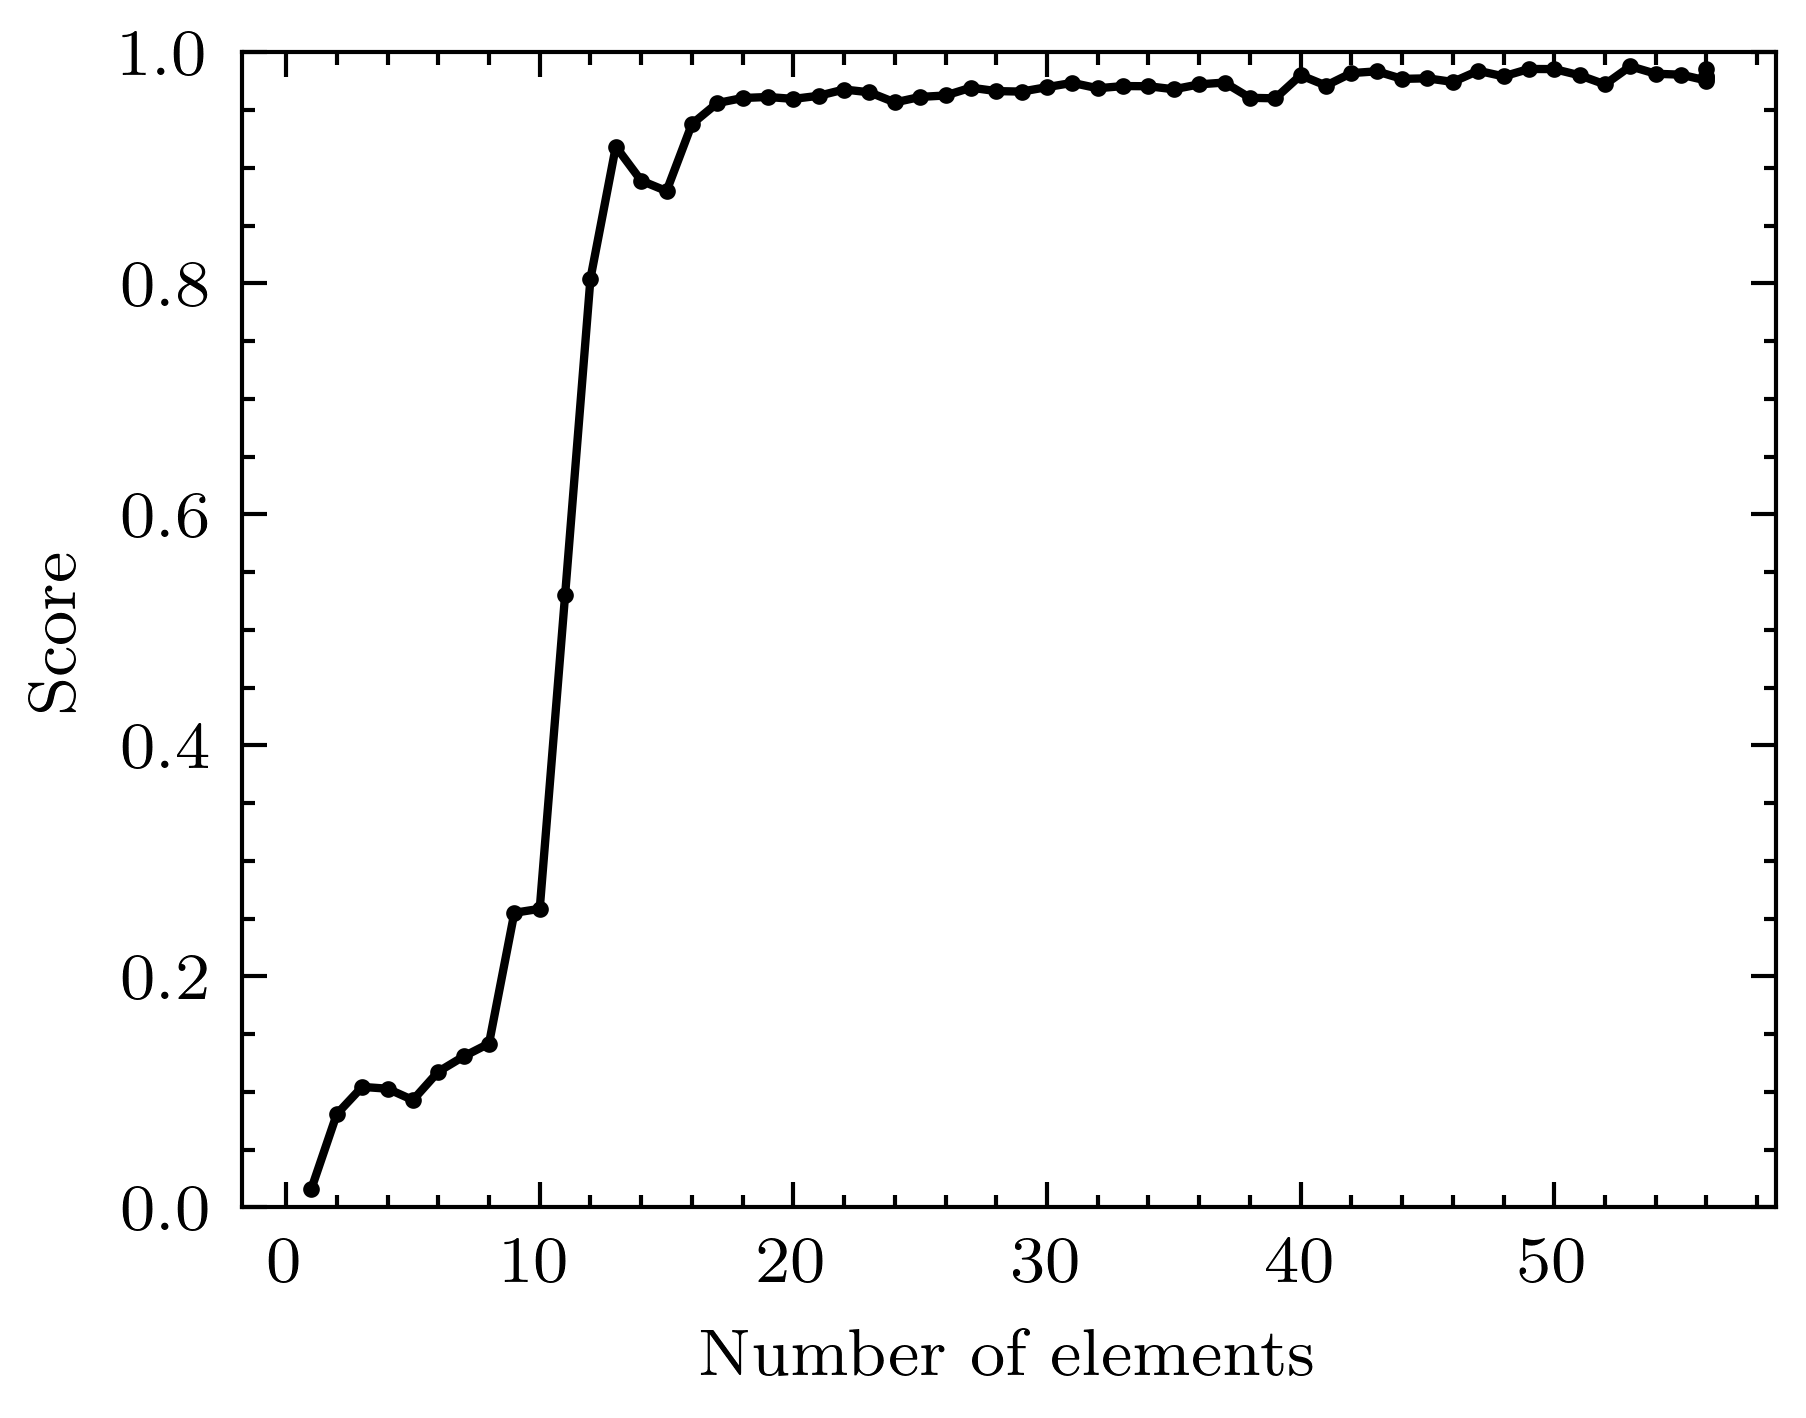

In [123]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

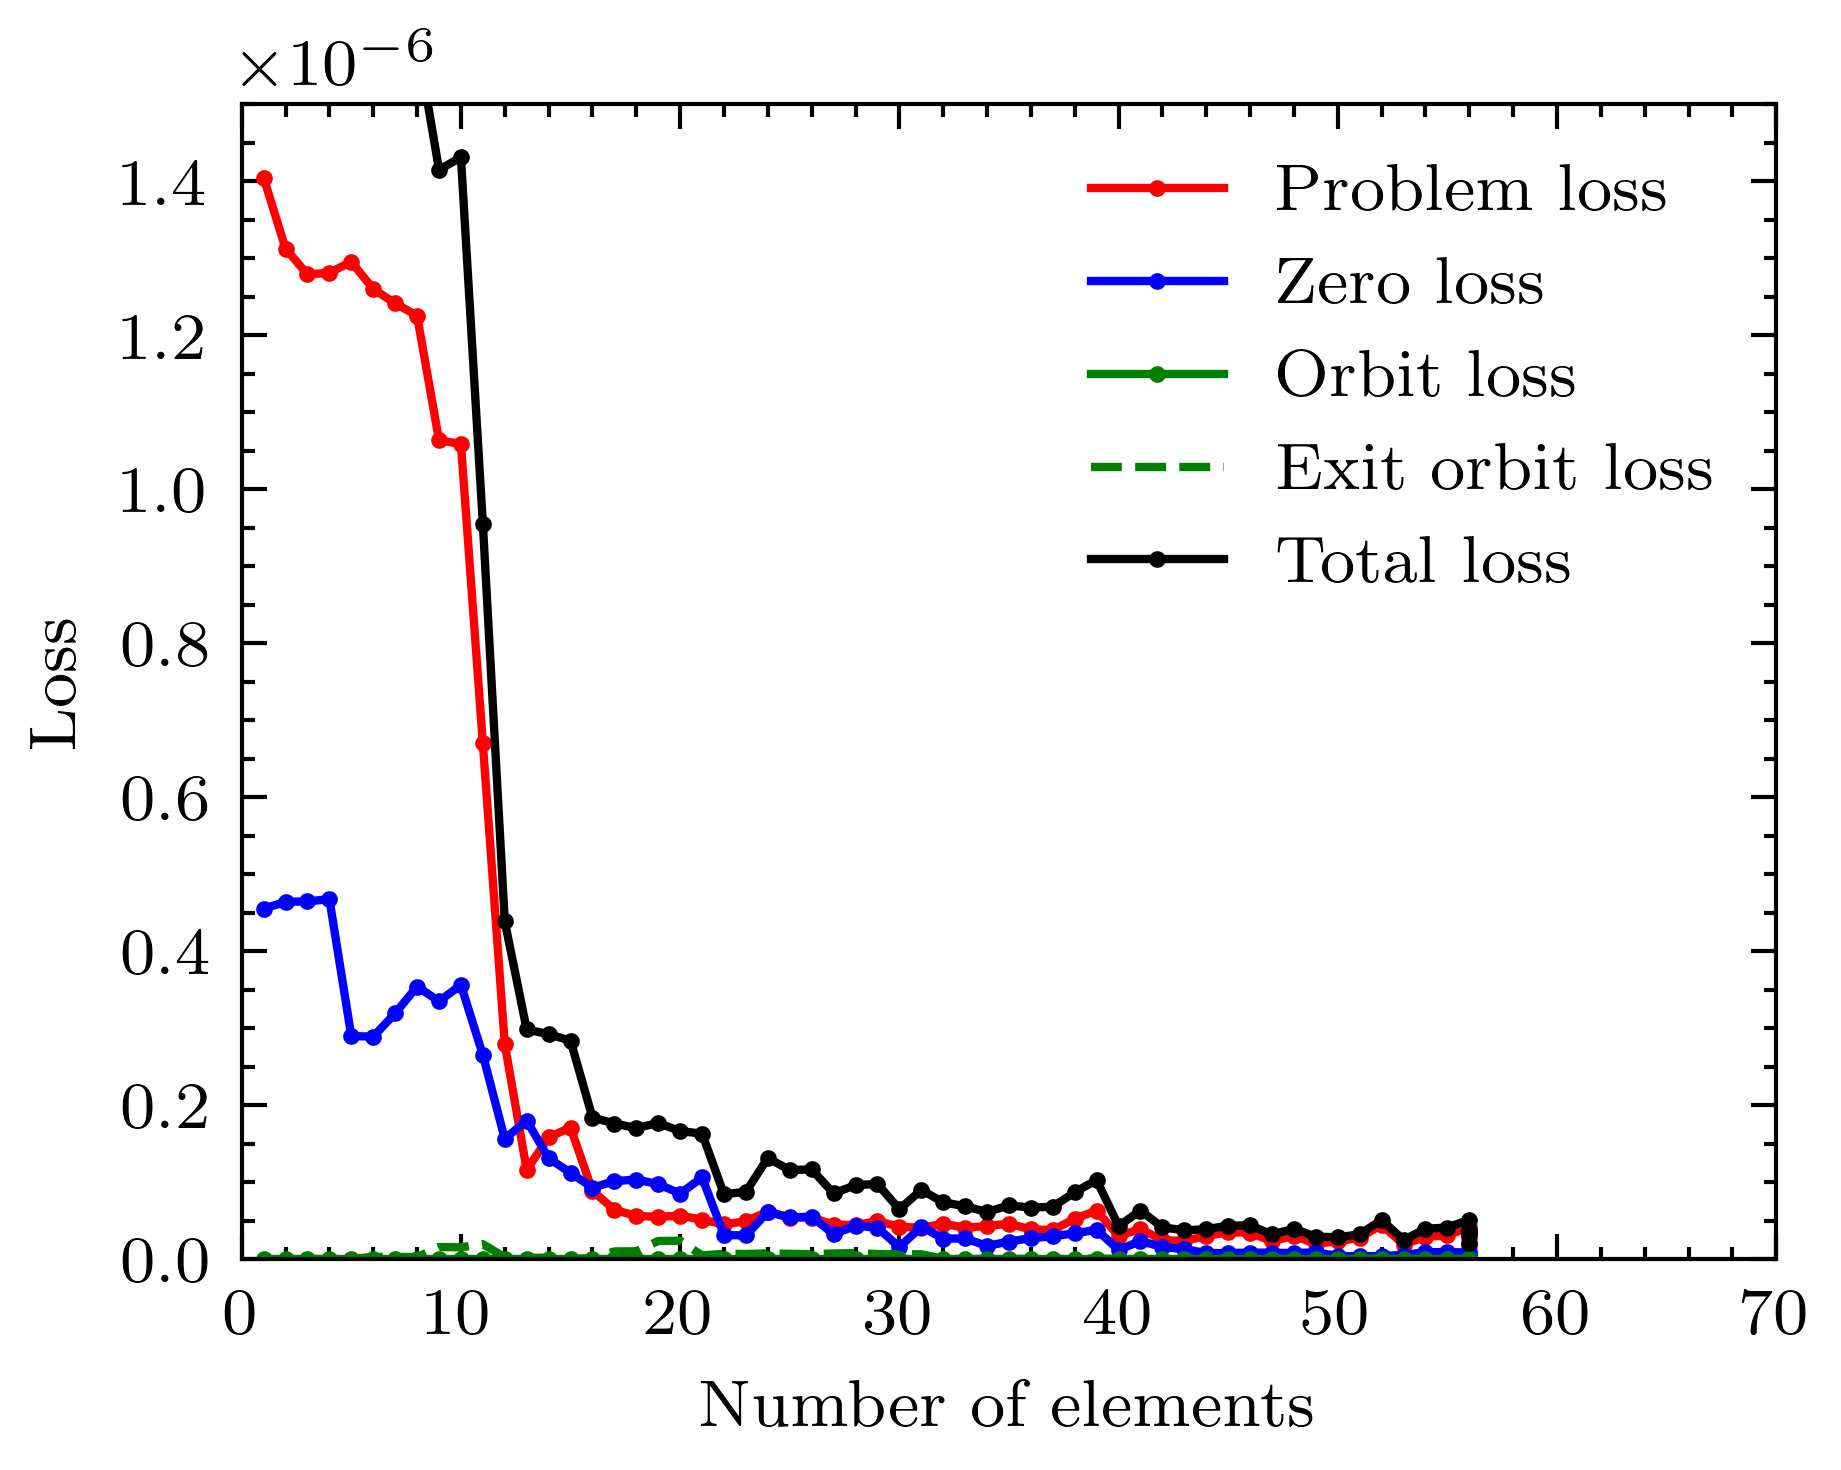

In [124]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y4**

In [129]:
FOLDER = "data/learning_storage/forward_backward/Y4_omp_zero"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
32  regularizer_mod_5_4  5.000000e-07           1   
45  regularizer_mod_5_4  5.000000e-07           2   
50  regularizer_mod_5_4  5.000000e-07           3   
46  regularizer_mod_5_4  5.000000e-07           4   
21  regularizer_mod_5_4  5.000000e-07           5   
35  regularizer_mod_5_4  5.000000e-07           6   
33  regularizer_mod_5_4  5.000000e-07           7   
27  regularizer_mod_5_4  5.000000e-07           8   
56  regularizer_mod_5_4  5.000000e-07           9   
58  regularizer_mod_5_4  5.000000e-07          10   
43  regularizer_mod_5_4  5.000000e-07          11   
37  regularizer_mod_5_4  5.000000e-07          12   
57  regularizer_mod_5_4  5.000000e-07          13   
7   regularizer_mod_5_4  5.000000e-07          14   
8   regularizer_mod_5_4  5.000000e-07          15   
42  regularizer_mod_5_4  5.000000e-07          16   
20  regularizer_mod_5_4  5.000000e-07          17   
12  regularizer_mod_5_4  5.000

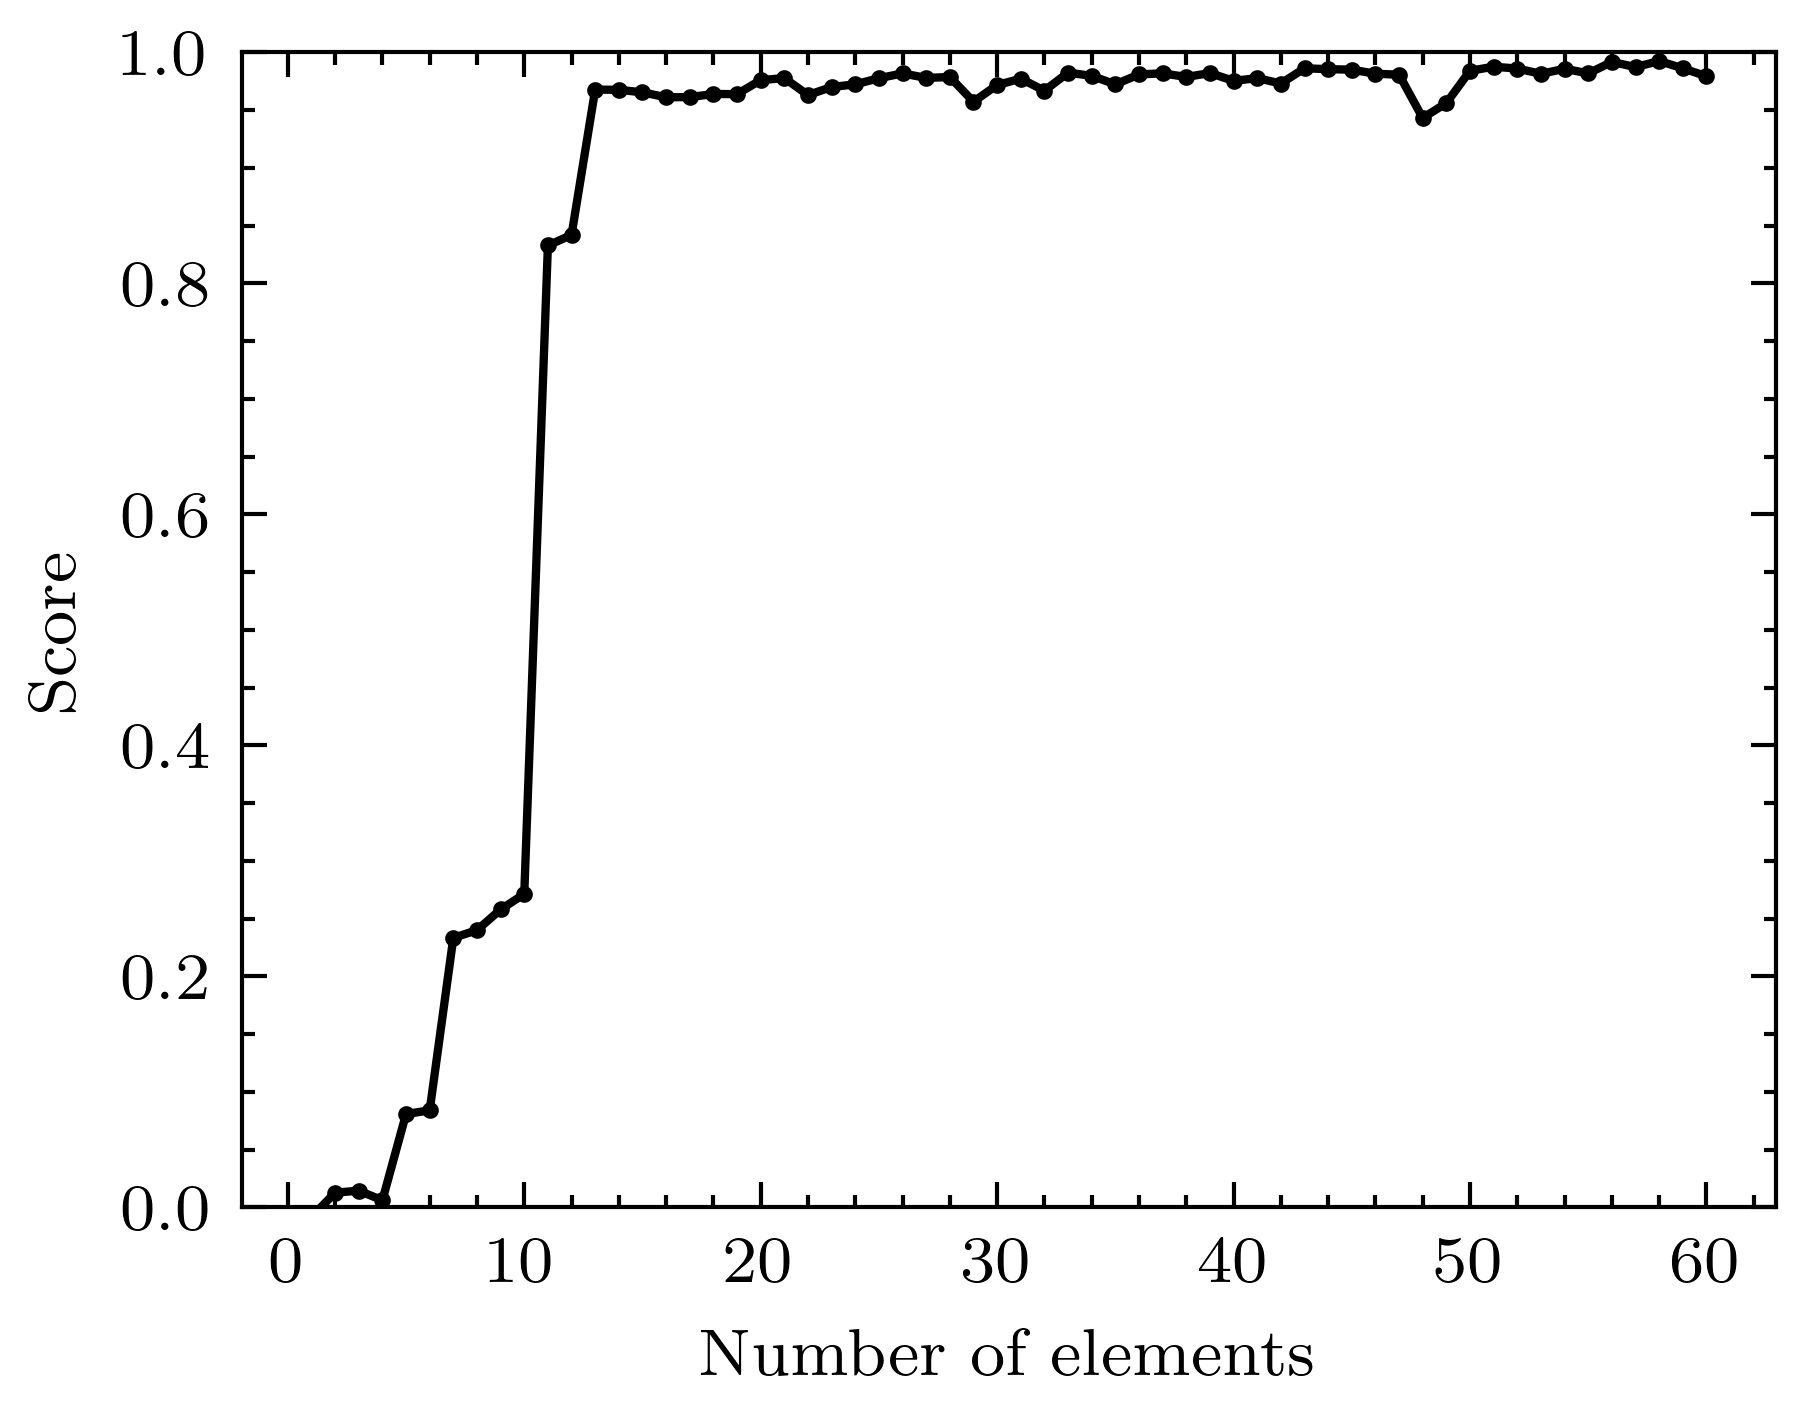

In [130]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

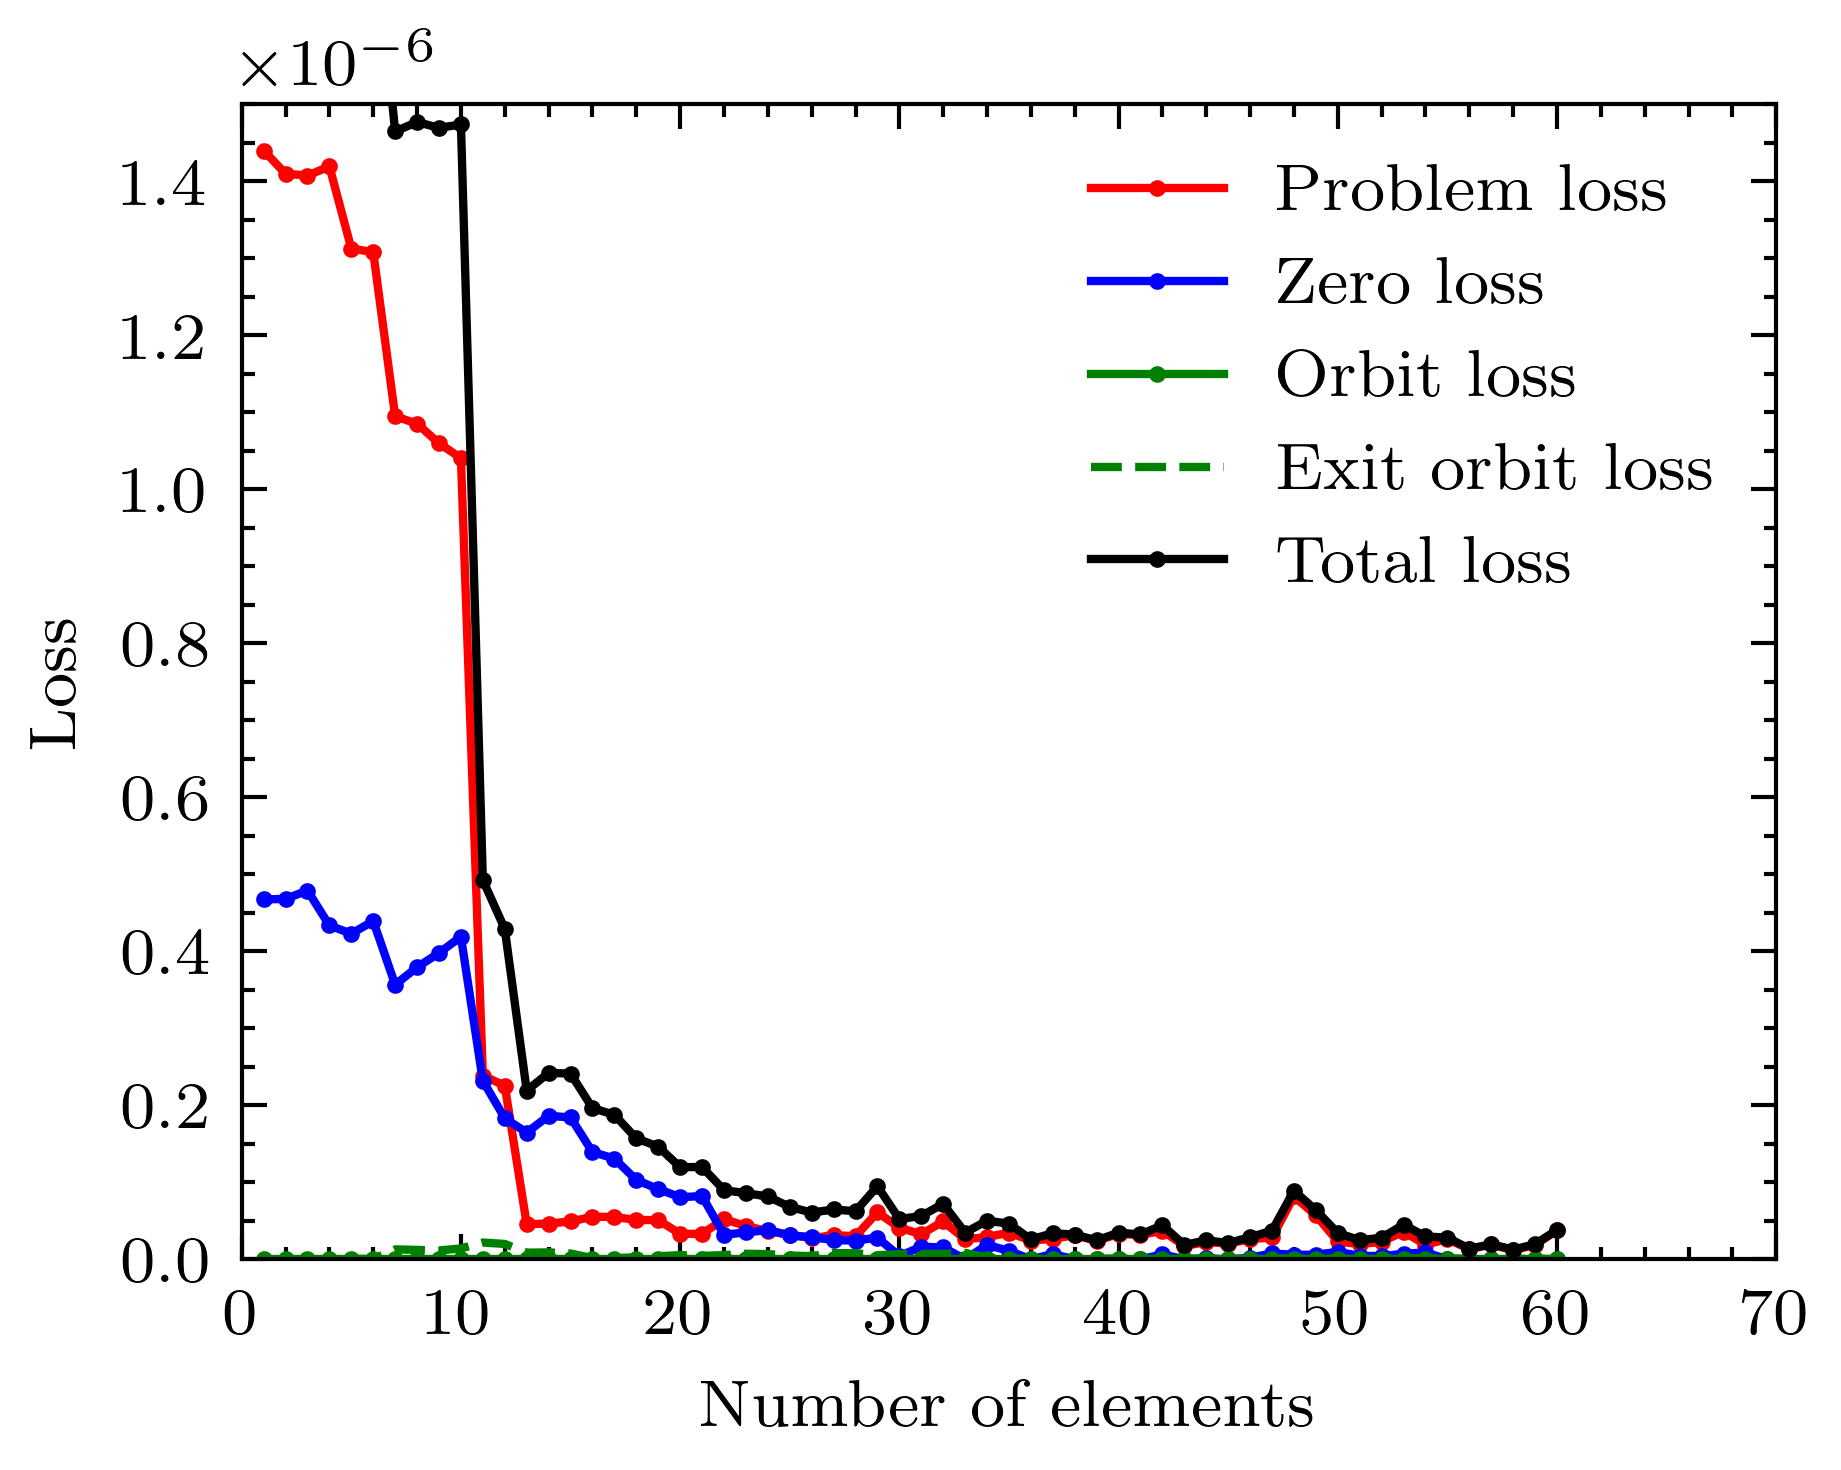

In [131]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y5**

In [135]:
FOLDER = "data/learning_storage/forward_backward/Y5_omp_zero"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
15  regularizer_mod_5_4  5.000000e-07           1   
47  regularizer_mod_5_4  5.000000e-07           2   
6   regularizer_mod_5_4  5.000000e-07           3   
5   regularizer_mod_5_4  5.000000e-07           4   
2   regularizer_mod_5_4  5.000000e-07           5   
52  regularizer_mod_5_4  5.000000e-07           6   
21  regularizer_mod_5_4  5.000000e-07           7   
59  regularizer_mod_5_4  5.000000e-07           8   
25  regularizer_mod_5_4  5.000000e-07           9   
28  regularizer_mod_5_4  5.000000e-07          10   
42  regularizer_mod_5_4  5.000000e-07          11   
7   regularizer_mod_5_4  5.000000e-07          12   
43  regularizer_mod_5_4  5.000000e-07          13   
29  regularizer_mod_5_4  5.000000e-07          14   
11  regularizer_mod_5_4  5.000000e-07          15   
26  regularizer_mod_5_4  5.000000e-07          16   
13  regularizer_mod_5_4  5.000000e-07          17   
37  regularizer_mod_5_4  5.000

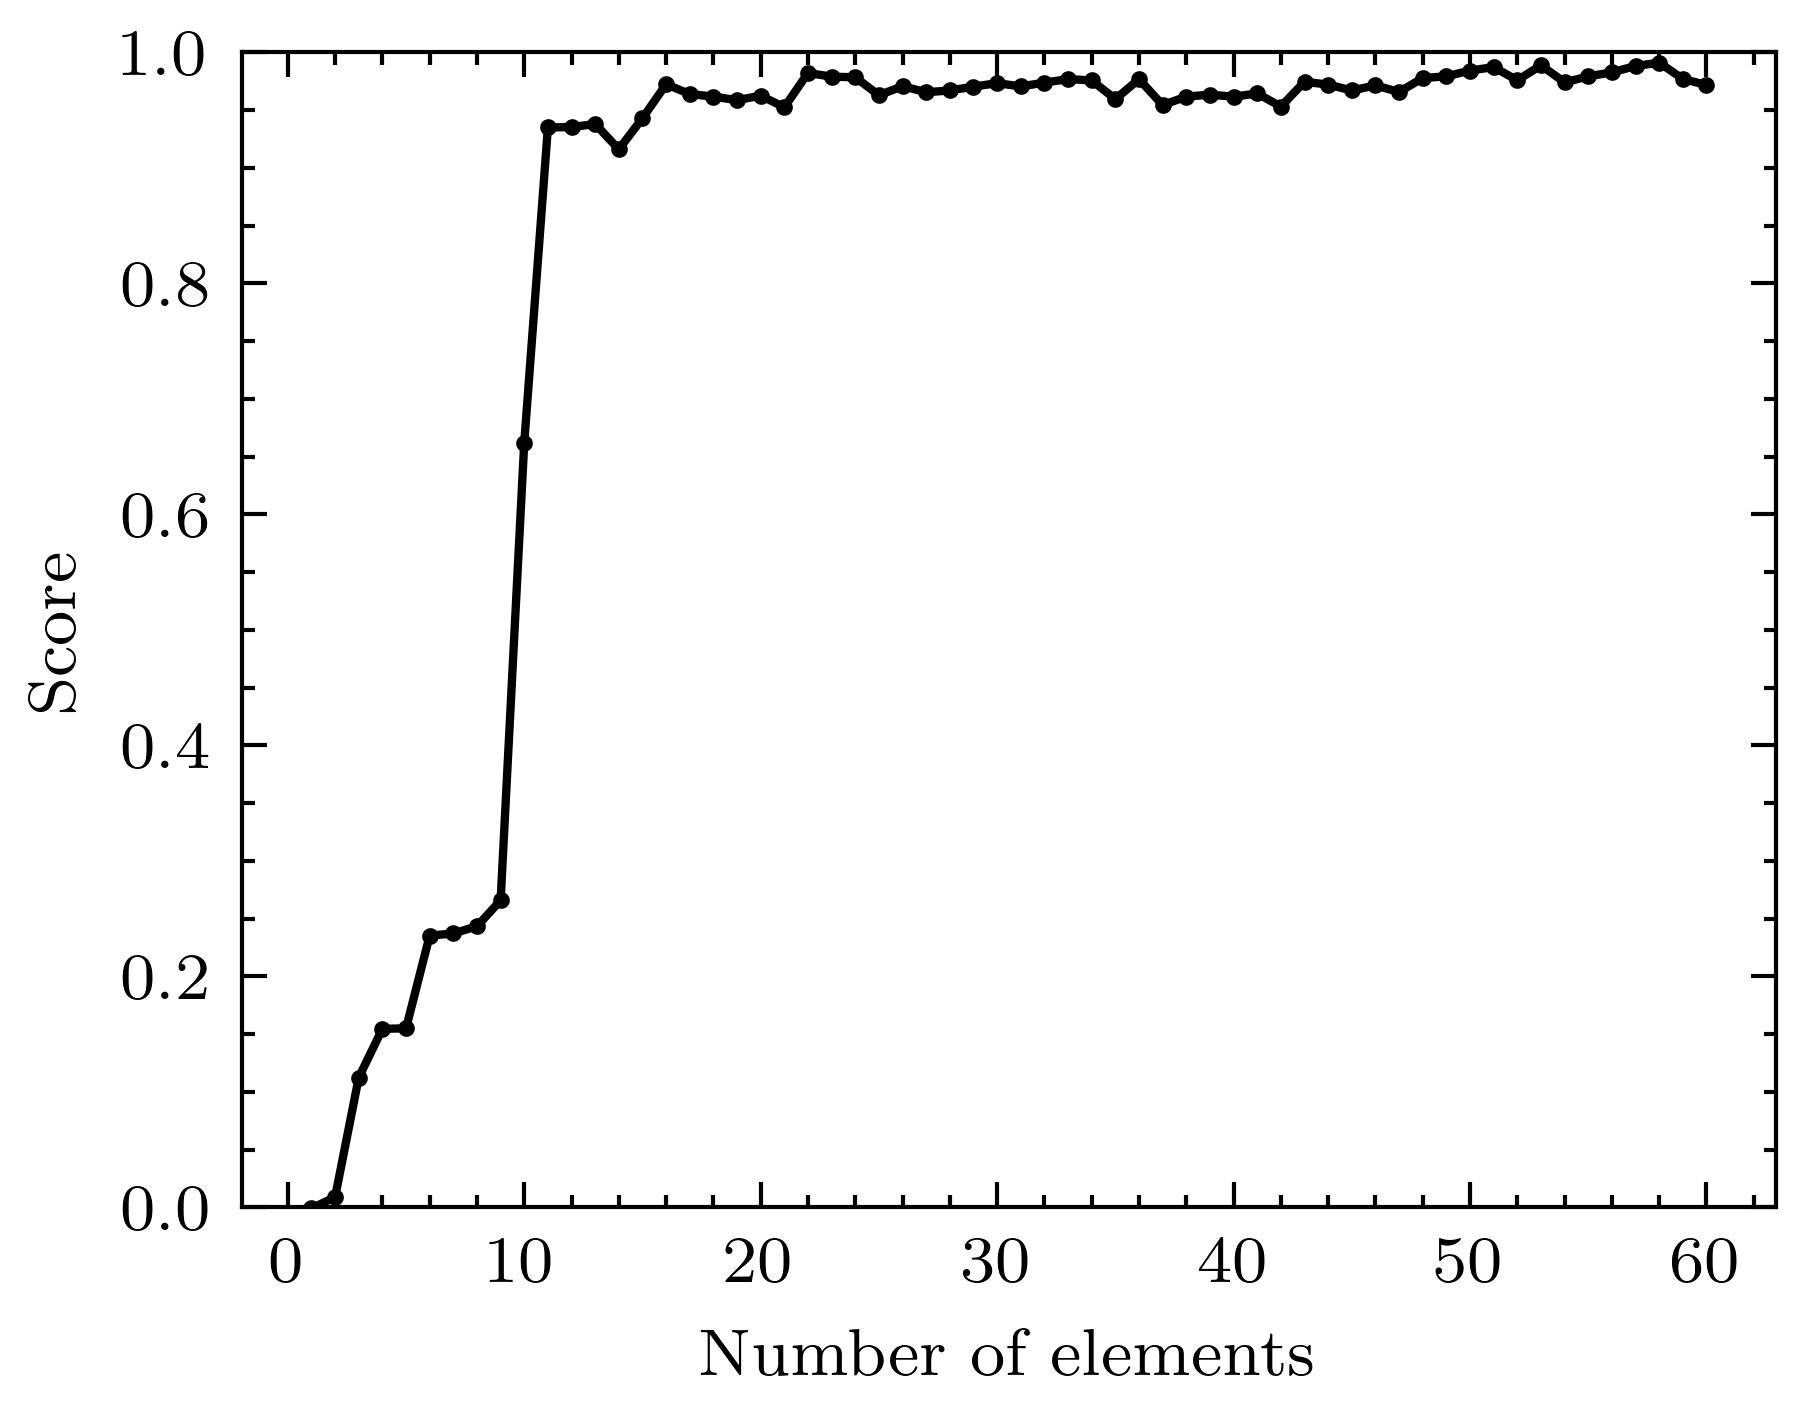

In [136]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

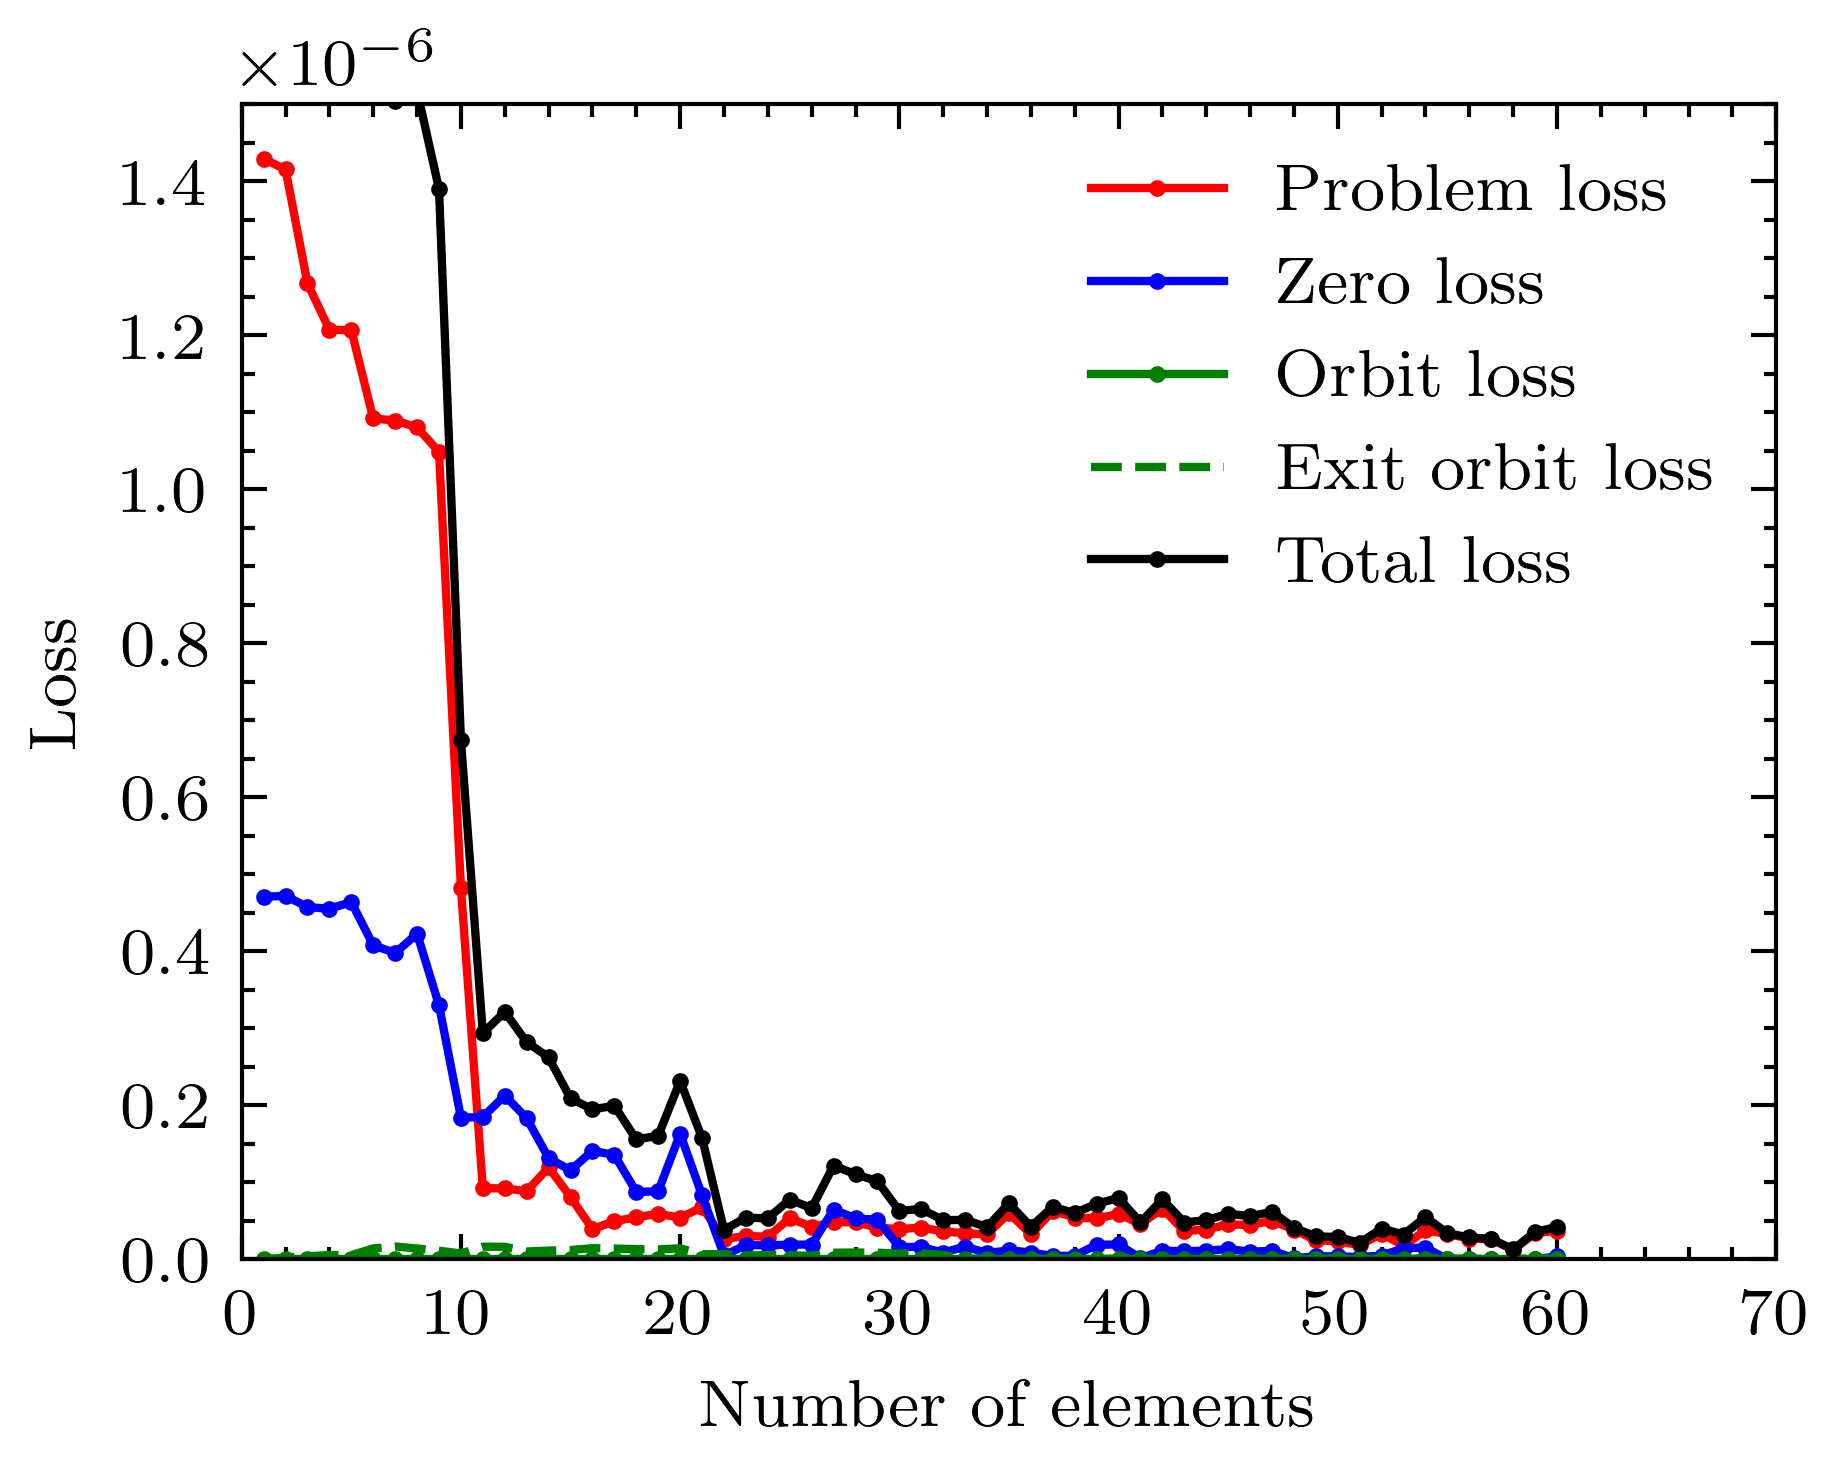

In [137]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y6**

In [145]:
FOLDER = "data/learning_storage/forward_backward/Y6_omp_zero"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
45  regularizer_mod_5_4  5.000000e-07           1   
57  regularizer_mod_5_4  5.000000e-07           2   
10  regularizer_mod_5_4  5.000000e-07           3   
23  regularizer_mod_5_4  5.000000e-07           4   
26  regularizer_mod_5_4  5.000000e-07           5   
12  regularizer_mod_5_4  5.000000e-07           6   
14  regularizer_mod_5_4  5.000000e-07           7   
38  regularizer_mod_5_4  5.000000e-07           8   
54  regularizer_mod_5_4  5.000000e-07           9   
56  regularizer_mod_5_4  5.000000e-07          10   
15  regularizer_mod_5_4  5.000000e-07          11   
40  regularizer_mod_5_4  5.000000e-07          12   
27  regularizer_mod_5_4  5.000000e-07          13   
32  regularizer_mod_5_4  5.000000e-07          14   
34  regularizer_mod_5_4  5.000000e-07          15   
25  regularizer_mod_5_4  5.000000e-07          16   
16  regularizer_mod_5_4  5.000000e-07          17   
6   regularizer_mod_5_4  5.000

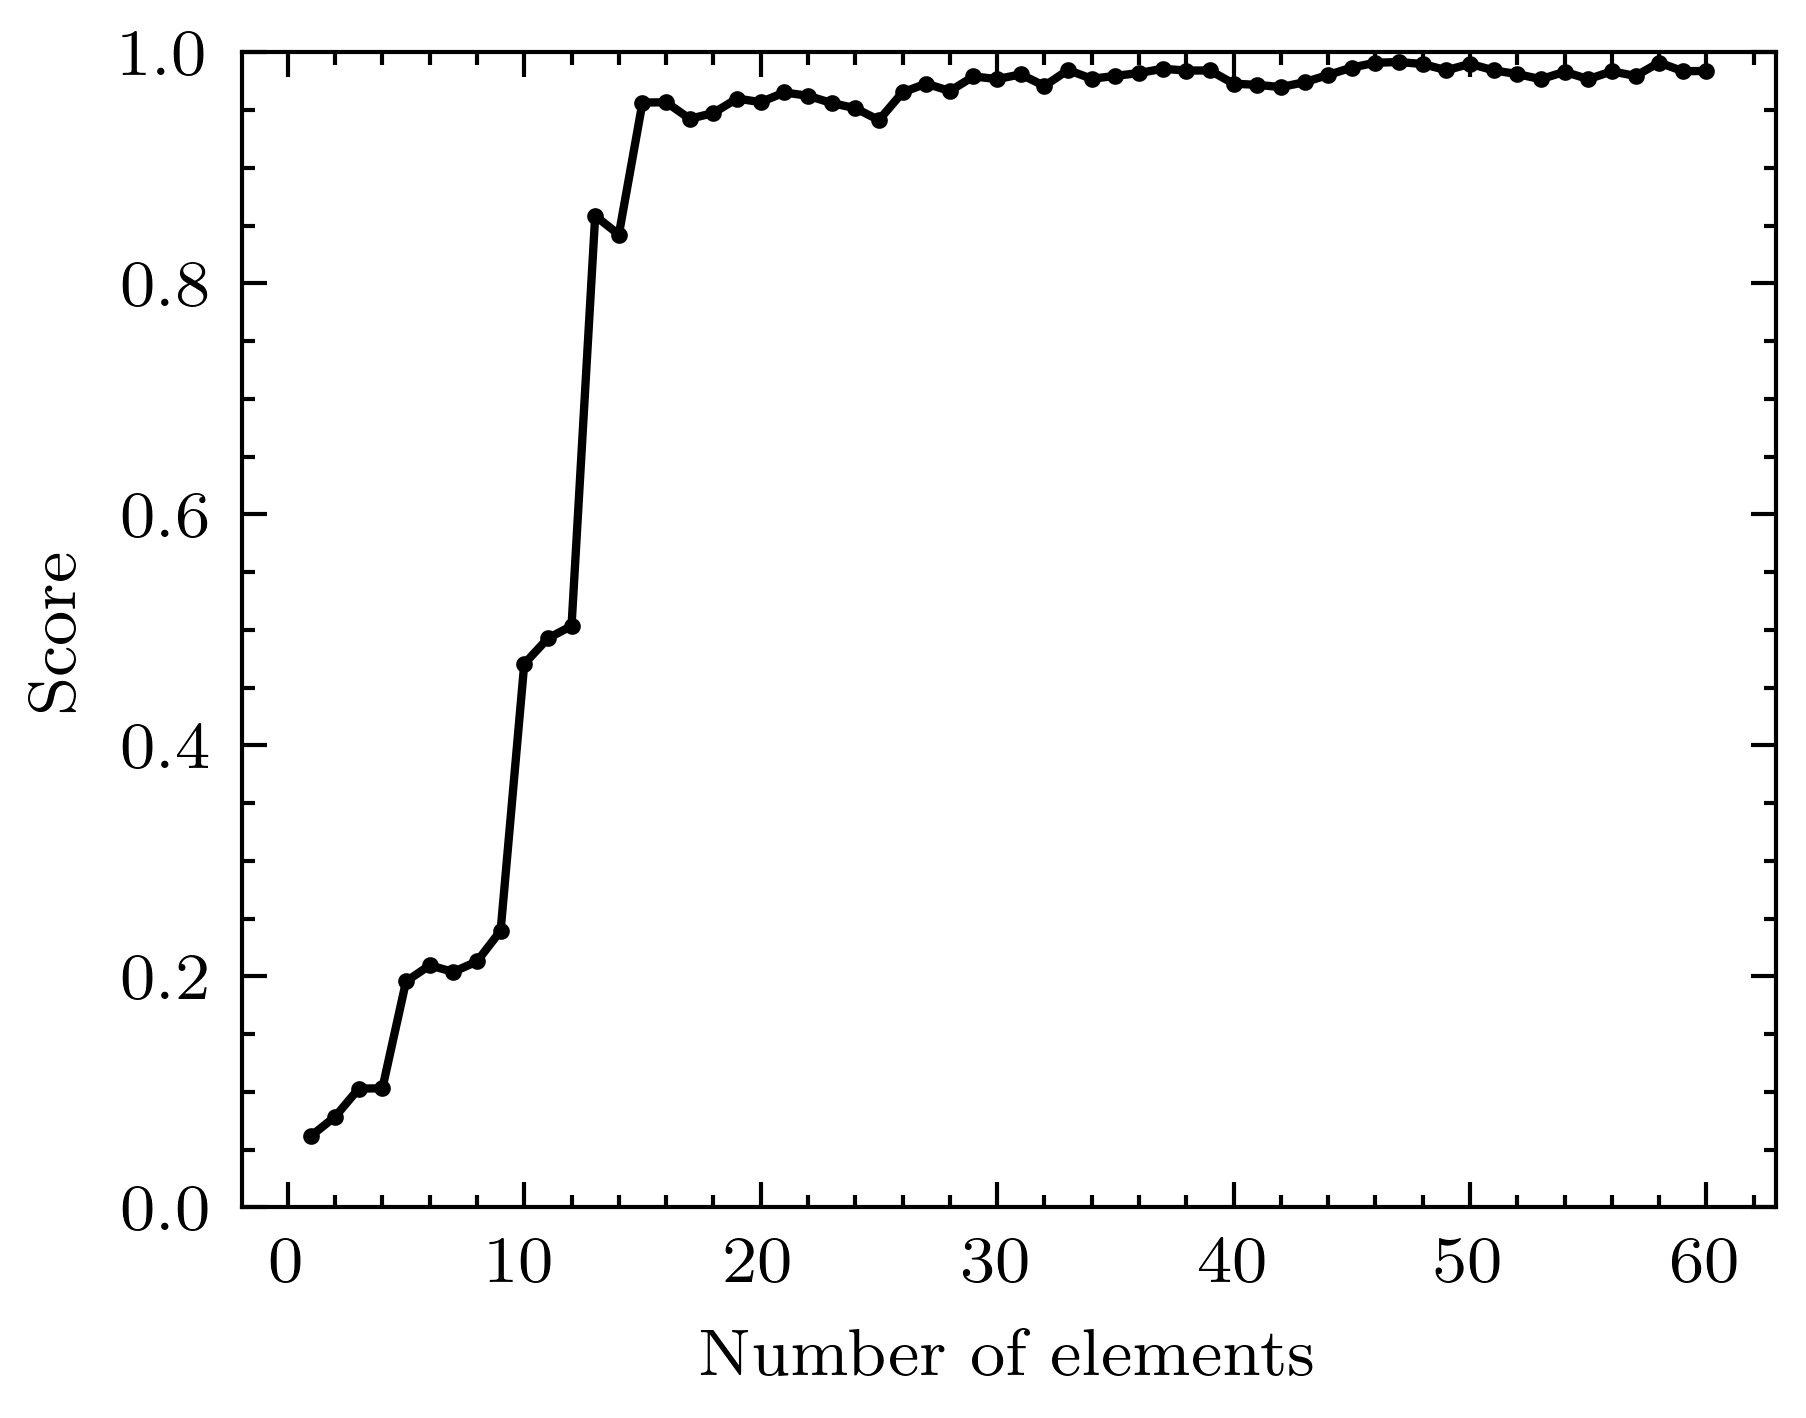

In [139]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

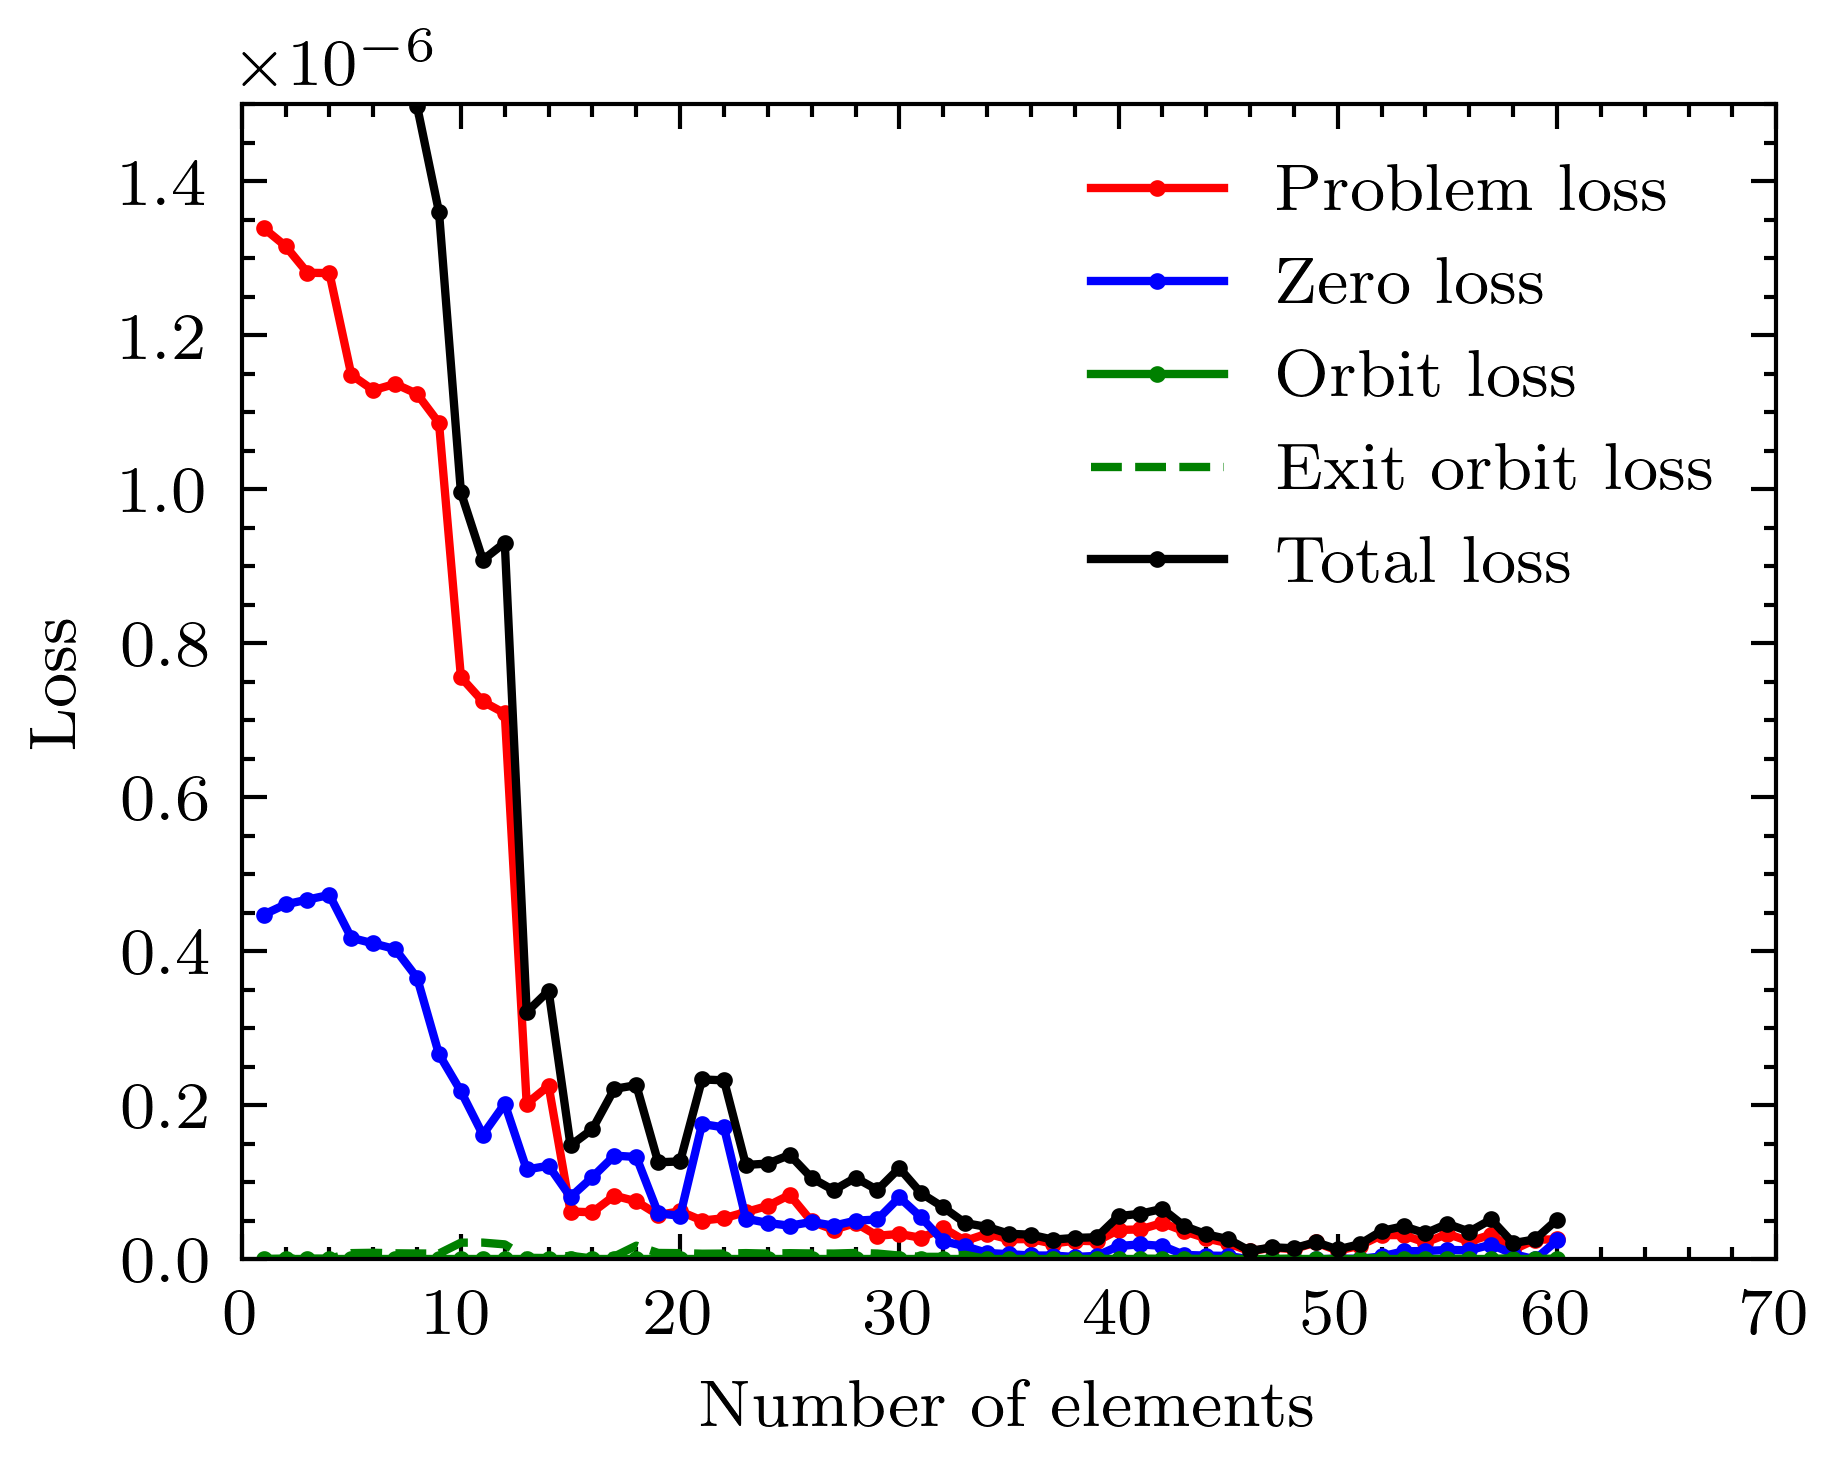

In [146]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y7**

In [156]:
FOLDER = "data/learning_storage/forward_backward/Y7_omp_zero"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
56  regularizer_mod_5_4  5.000000e-07           1   
17  regularizer_mod_5_4  5.000000e-07           2   
12  regularizer_mod_5_4  5.000000e-07           3   
14  regularizer_mod_5_4  5.000000e-07           4   
31  regularizer_mod_5_4  5.000000e-07           5   
15  regularizer_mod_5_4  5.000000e-07           6   
36  regularizer_mod_5_4  5.000000e-07           7   
59  regularizer_mod_5_4  5.000000e-07           8   
26  regularizer_mod_5_4  5.000000e-07           9   
19  regularizer_mod_5_4  5.000000e-07          10   
40  regularizer_mod_5_4  5.000000e-07          11   
54  regularizer_mod_5_4  5.000000e-07          12   
39  regularizer_mod_5_4  5.000000e-07          13   
43  regularizer_mod_5_4  5.000000e-07          14   
49  regularizer_mod_5_4  5.000000e-07          15   
44  regularizer_mod_5_4  5.000000e-07          16   
50  regularizer_mod_5_4  5.000000e-07          17   
58  regularizer_mod_5_4  5.000

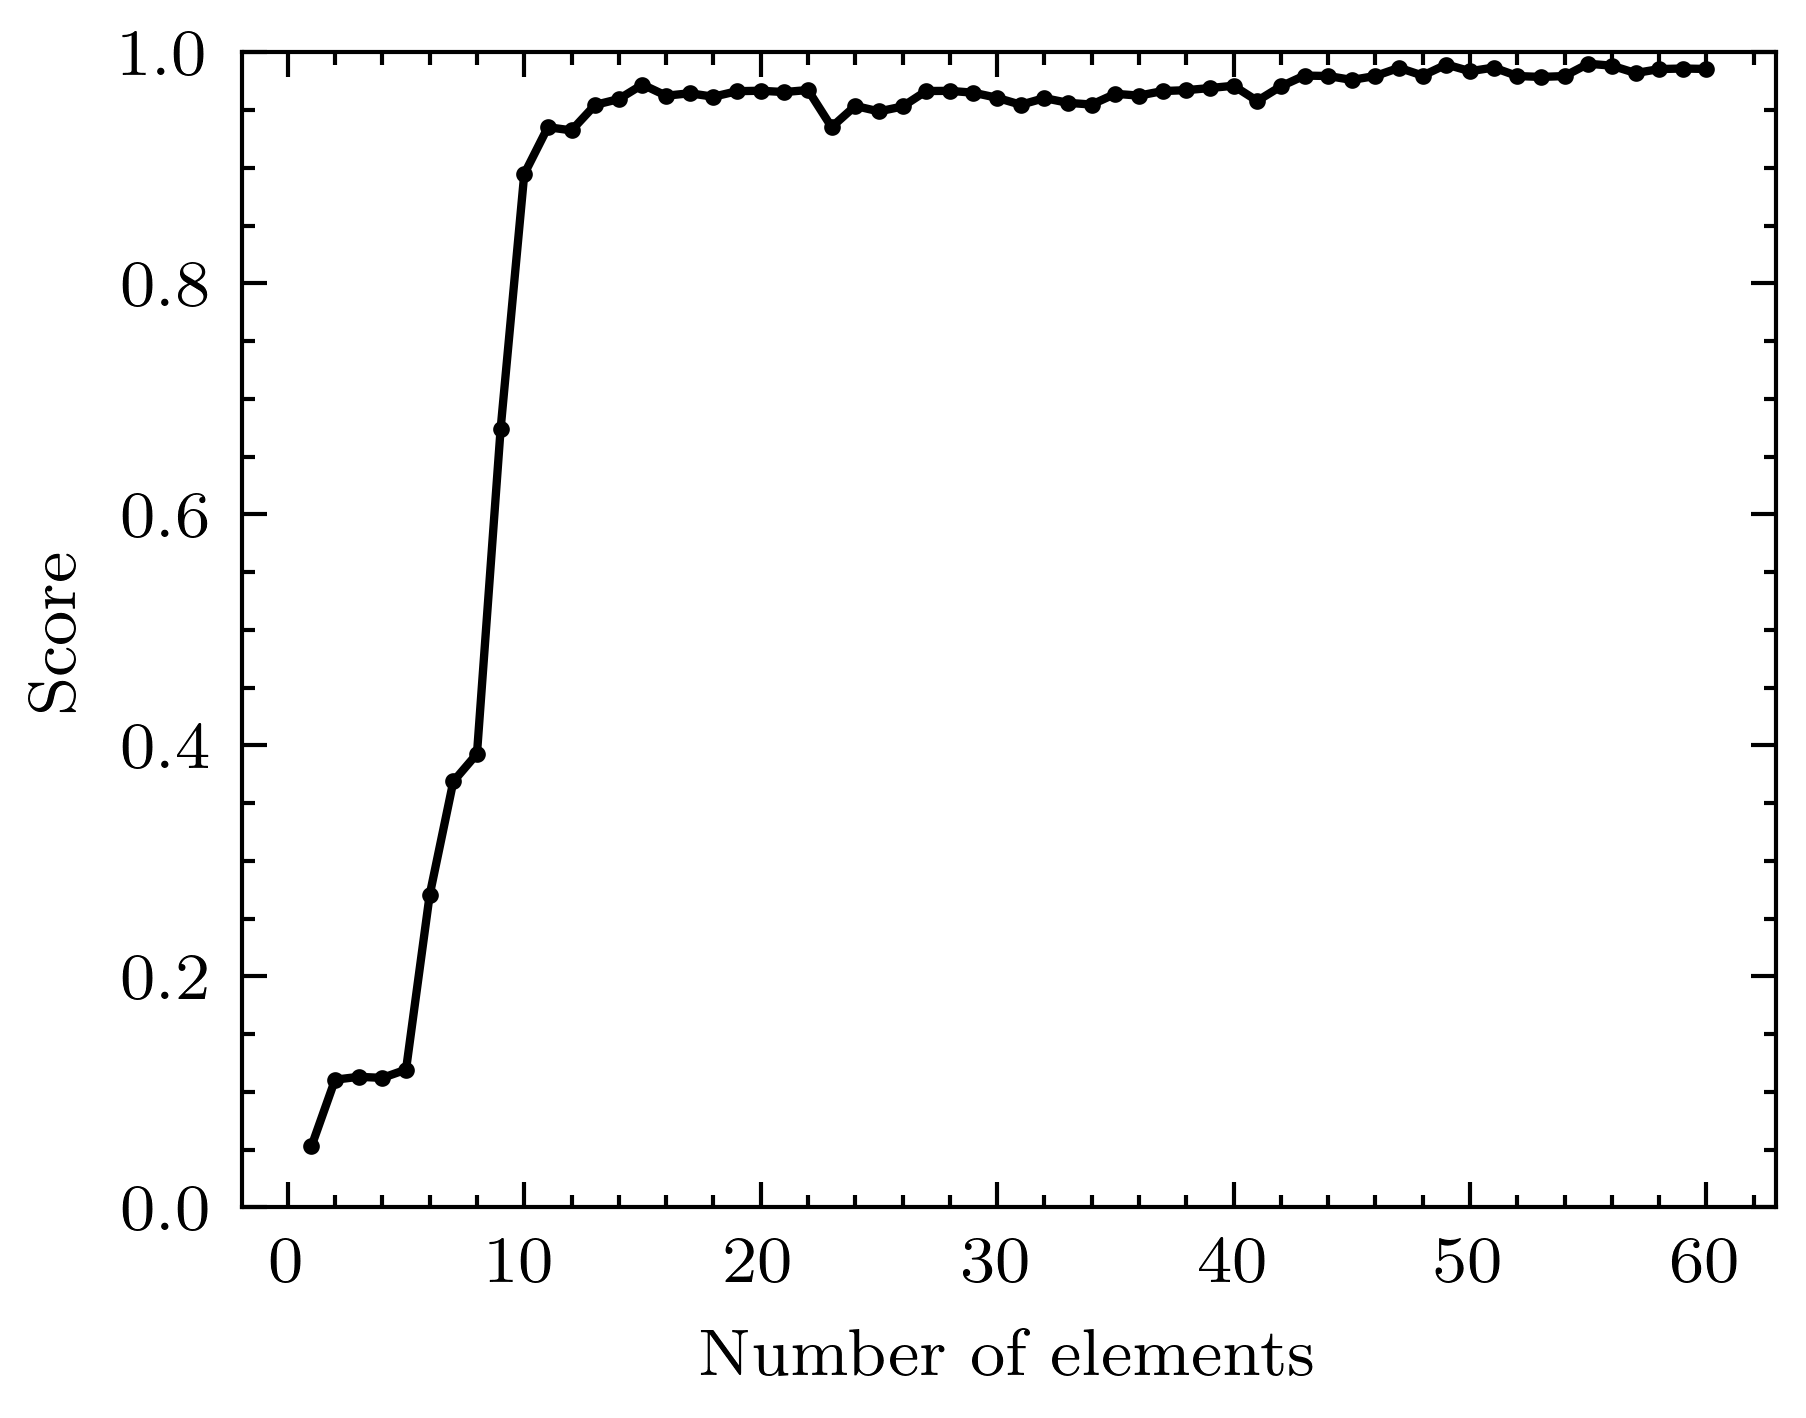

In [157]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

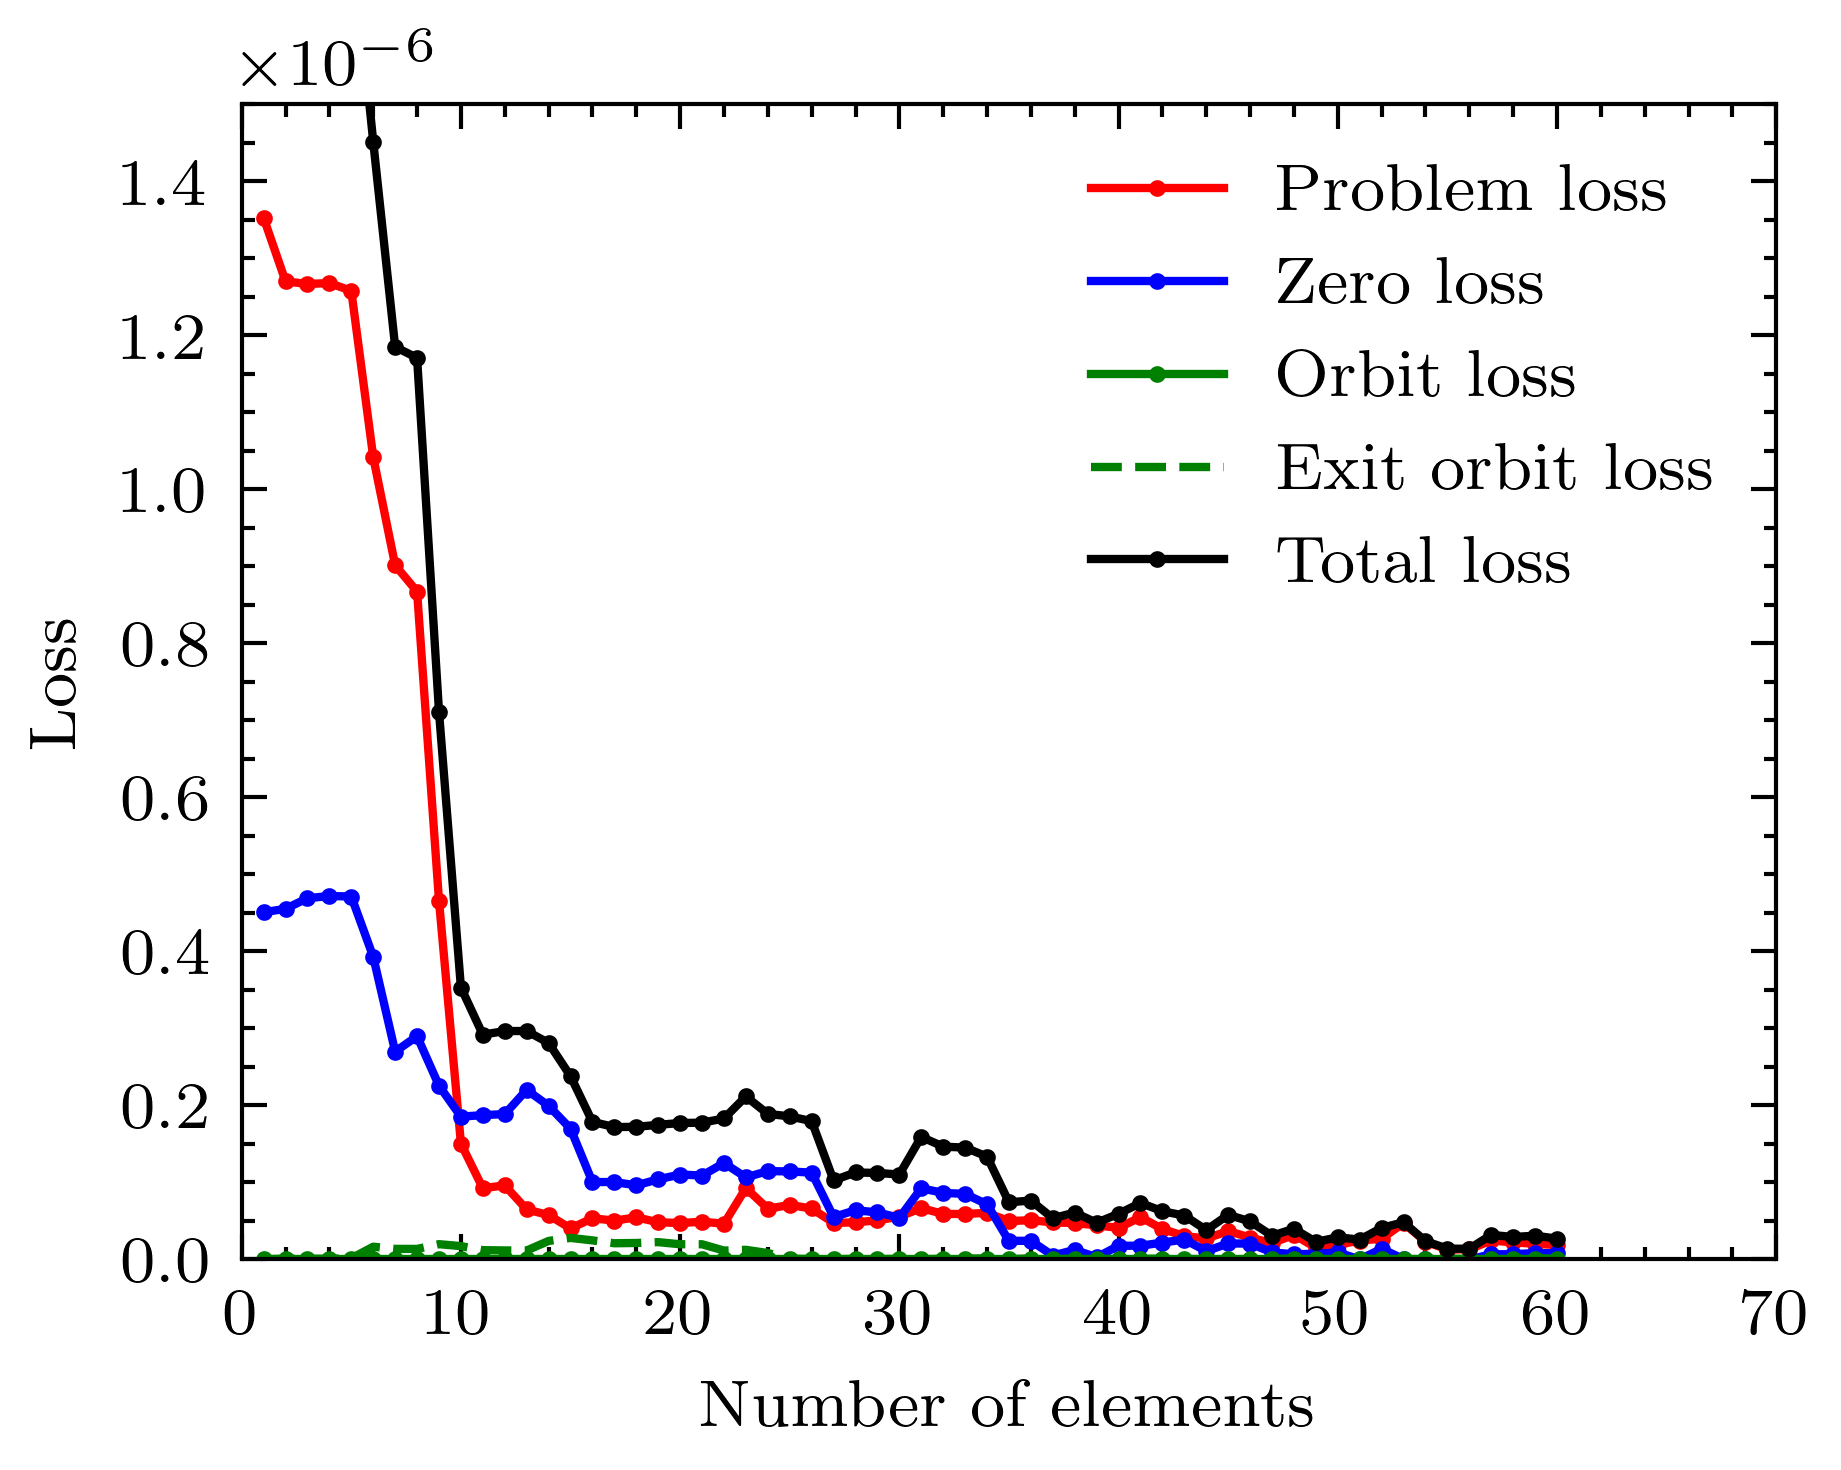

In [158]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y8**

In [165]:
FOLDER = "data/learning_storage/forward_backward/Y8_omp_zero"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
56  regularizer_mod_5_4  5.000000e-07           1   
9   regularizer_mod_5_4  5.000000e-07           2   
27  regularizer_mod_5_4  5.000000e-07           3   
22  regularizer_mod_5_4  5.000000e-07           4   
33  regularizer_mod_5_4  5.000000e-07           5   
23  regularizer_mod_5_4  5.000000e-07           6   
17  regularizer_mod_5_4  5.000000e-07           7   
6   regularizer_mod_5_4  5.000000e-07           8   
36  regularizer_mod_5_4  5.000000e-07           9   
28  regularizer_mod_5_4  5.000000e-07          10   
10  regularizer_mod_5_4  5.000000e-07          11   
18  regularizer_mod_5_4  5.000000e-07          12   
49  regularizer_mod_5_4  5.000000e-07          13   
39  regularizer_mod_5_4  5.000000e-07          14   
35  regularizer_mod_5_4  5.000000e-07          15   
42  regularizer_mod_5_4  5.000000e-07          16   
21  regularizer_mod_5_4  5.000000e-07          17   
7   regularizer_mod_5_4  5.000

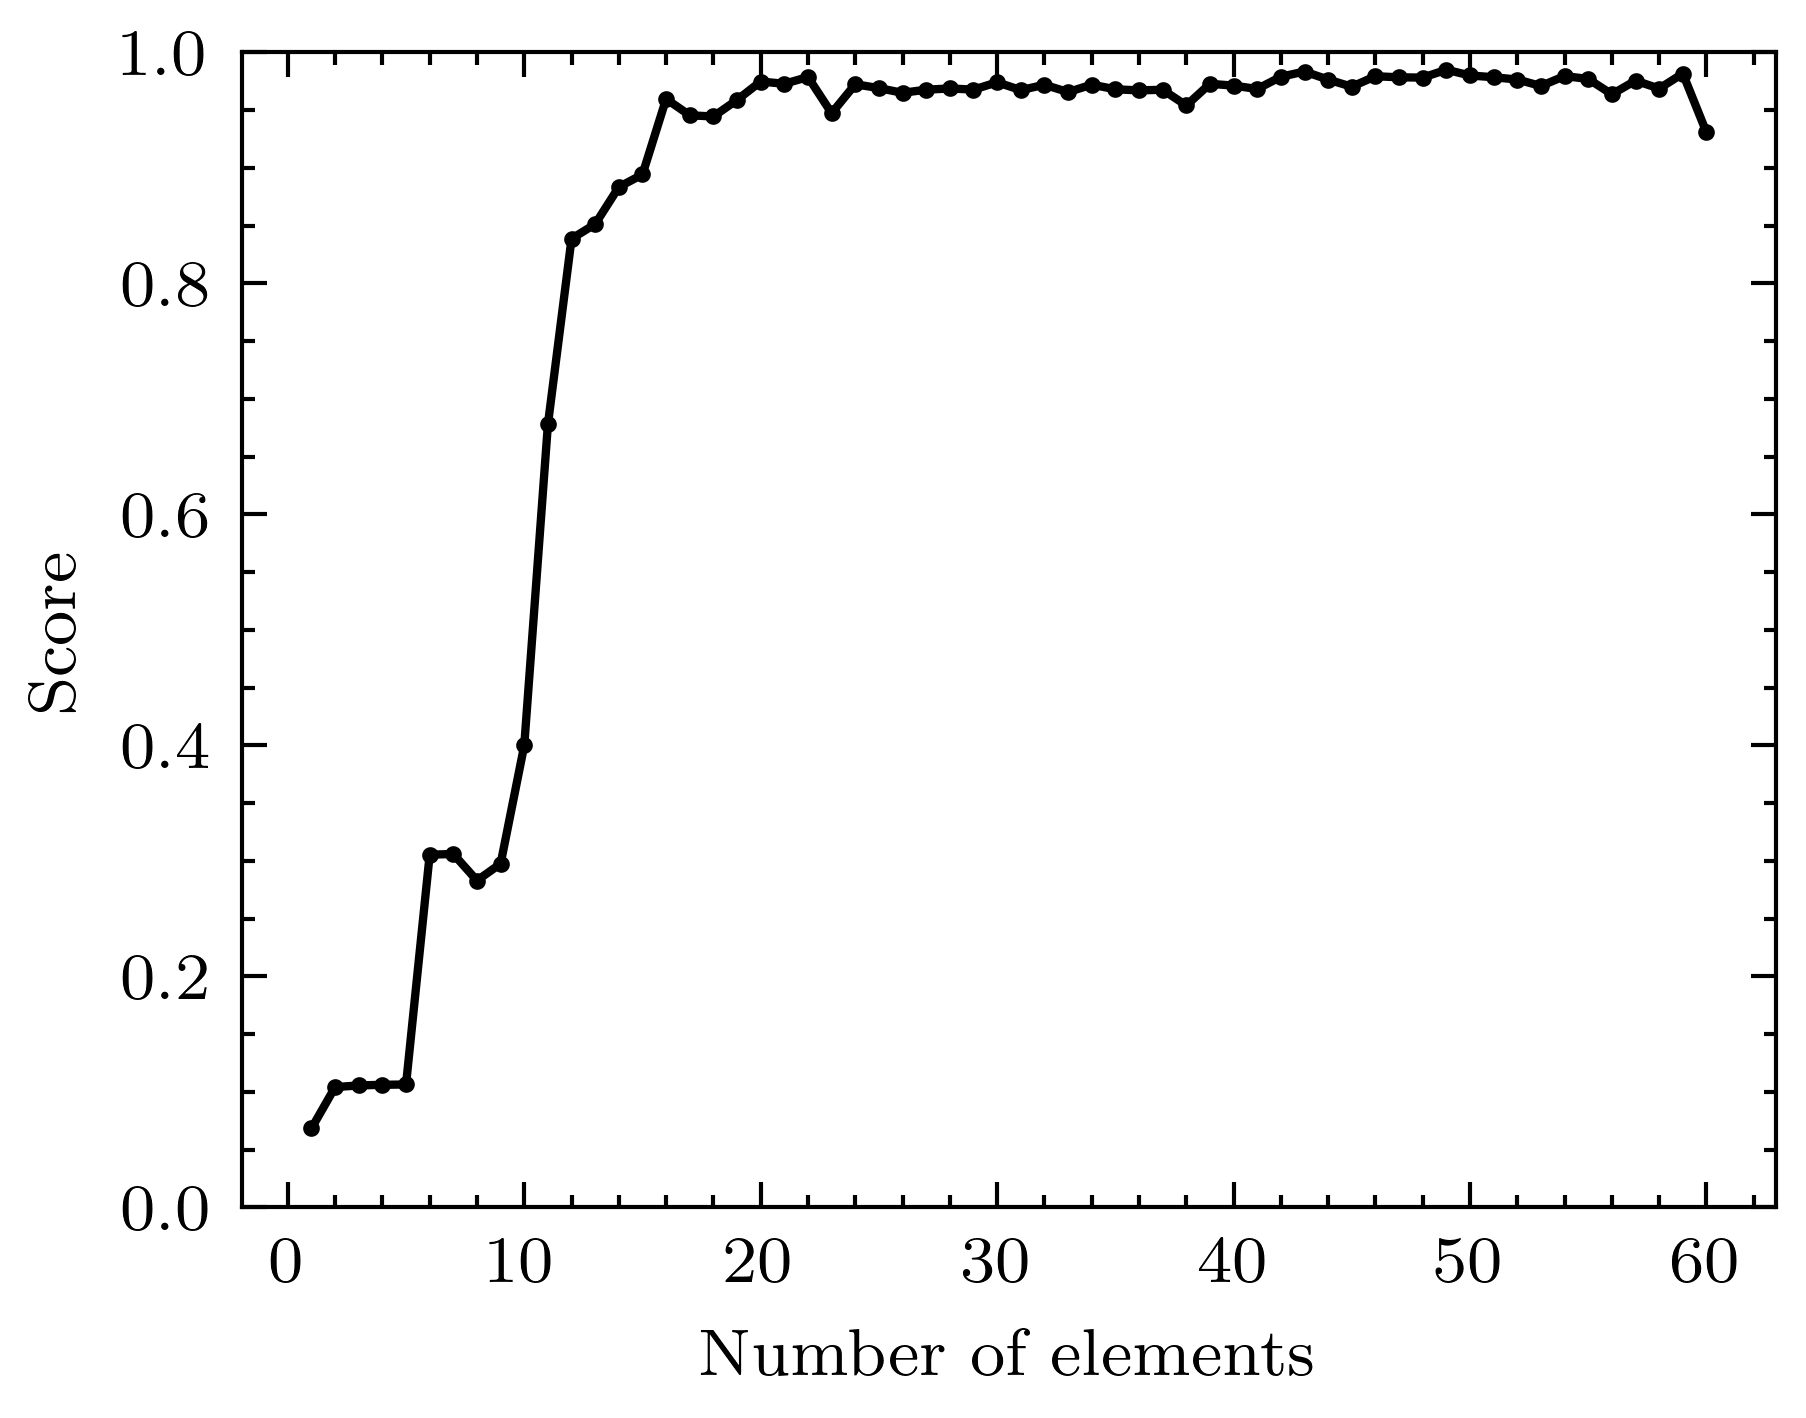

In [166]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

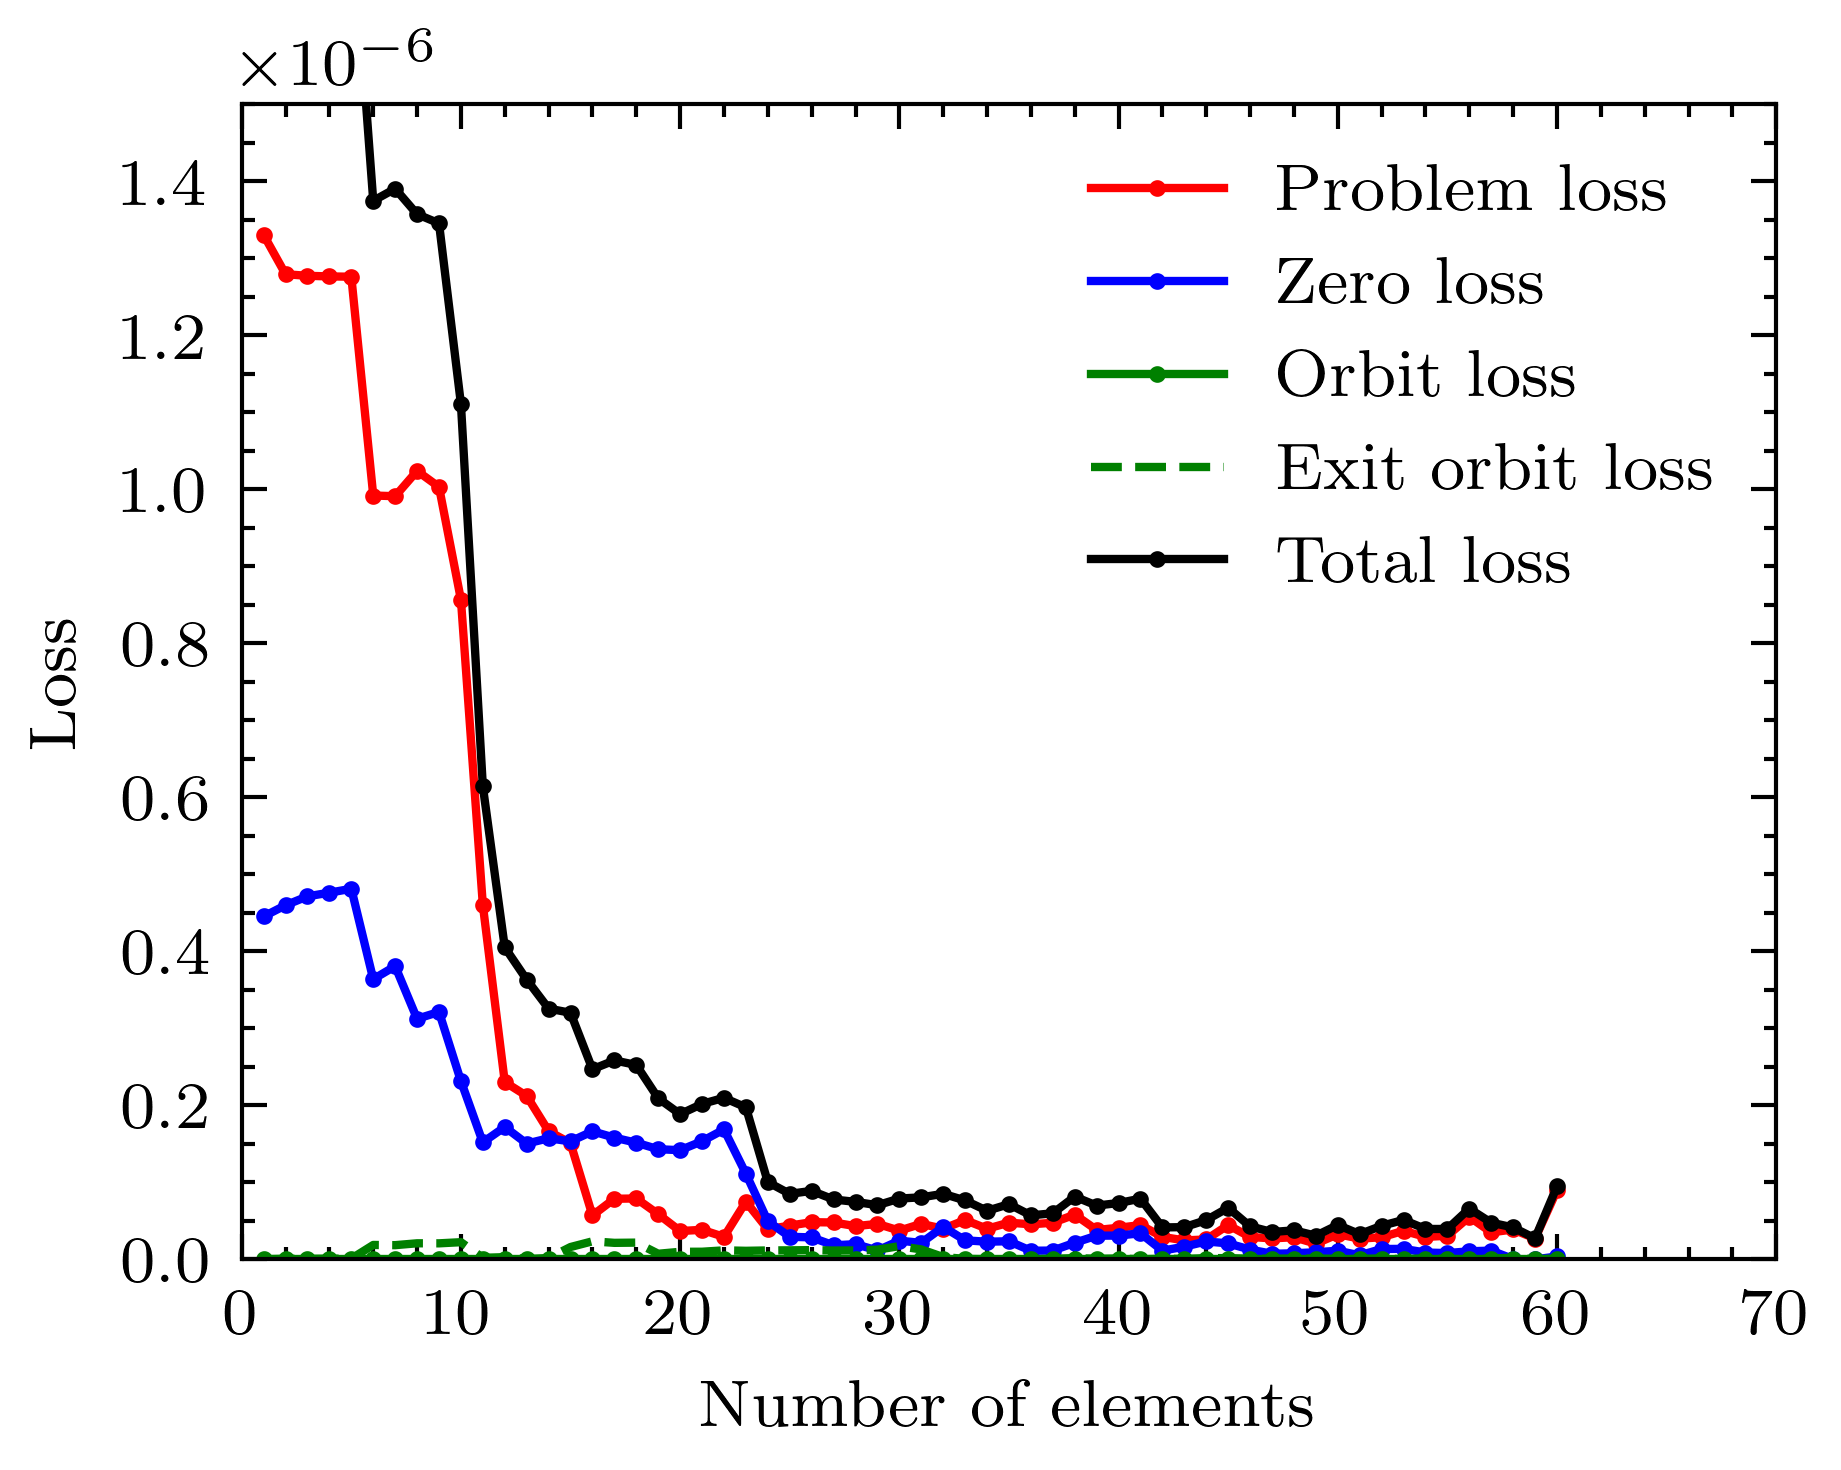

In [167]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

knob **Y9**

In [171]:
FOLDER = "data/learning_storage/forward_backward/Y9_omp_zero"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
50  regularizer_mod_5_4  5.000000e-07           1   
38  regularizer_mod_5_4  5.000000e-07           2   
40  regularizer_mod_5_4  5.000000e-07           3   
55  regularizer_mod_5_4  5.000000e-07           4   
44  regularizer_mod_5_4  5.000000e-07           5   
27  regularizer_mod_5_4  5.000000e-07           6   
13  regularizer_mod_5_4  5.000000e-07           7   
16  regularizer_mod_5_4  5.000000e-07           8   
30  regularizer_mod_5_4  5.000000e-07           9   
46  regularizer_mod_5_4  5.000000e-07          10   
20  regularizer_mod_5_4  5.000000e-07          11   
22  regularizer_mod_5_4  5.000000e-07          12   
9   regularizer_mod_5_4  5.000000e-07          13   
39  regularizer_mod_5_4  5.000000e-07          14   
6   regularizer_mod_5_4  5.000000e-07          15   
36  regularizer_mod_5_4  5.000000e-07          16   
49  regularizer_mod_5_4  5.000000e-07          17   
48  regularizer_mod_5_4  5.000

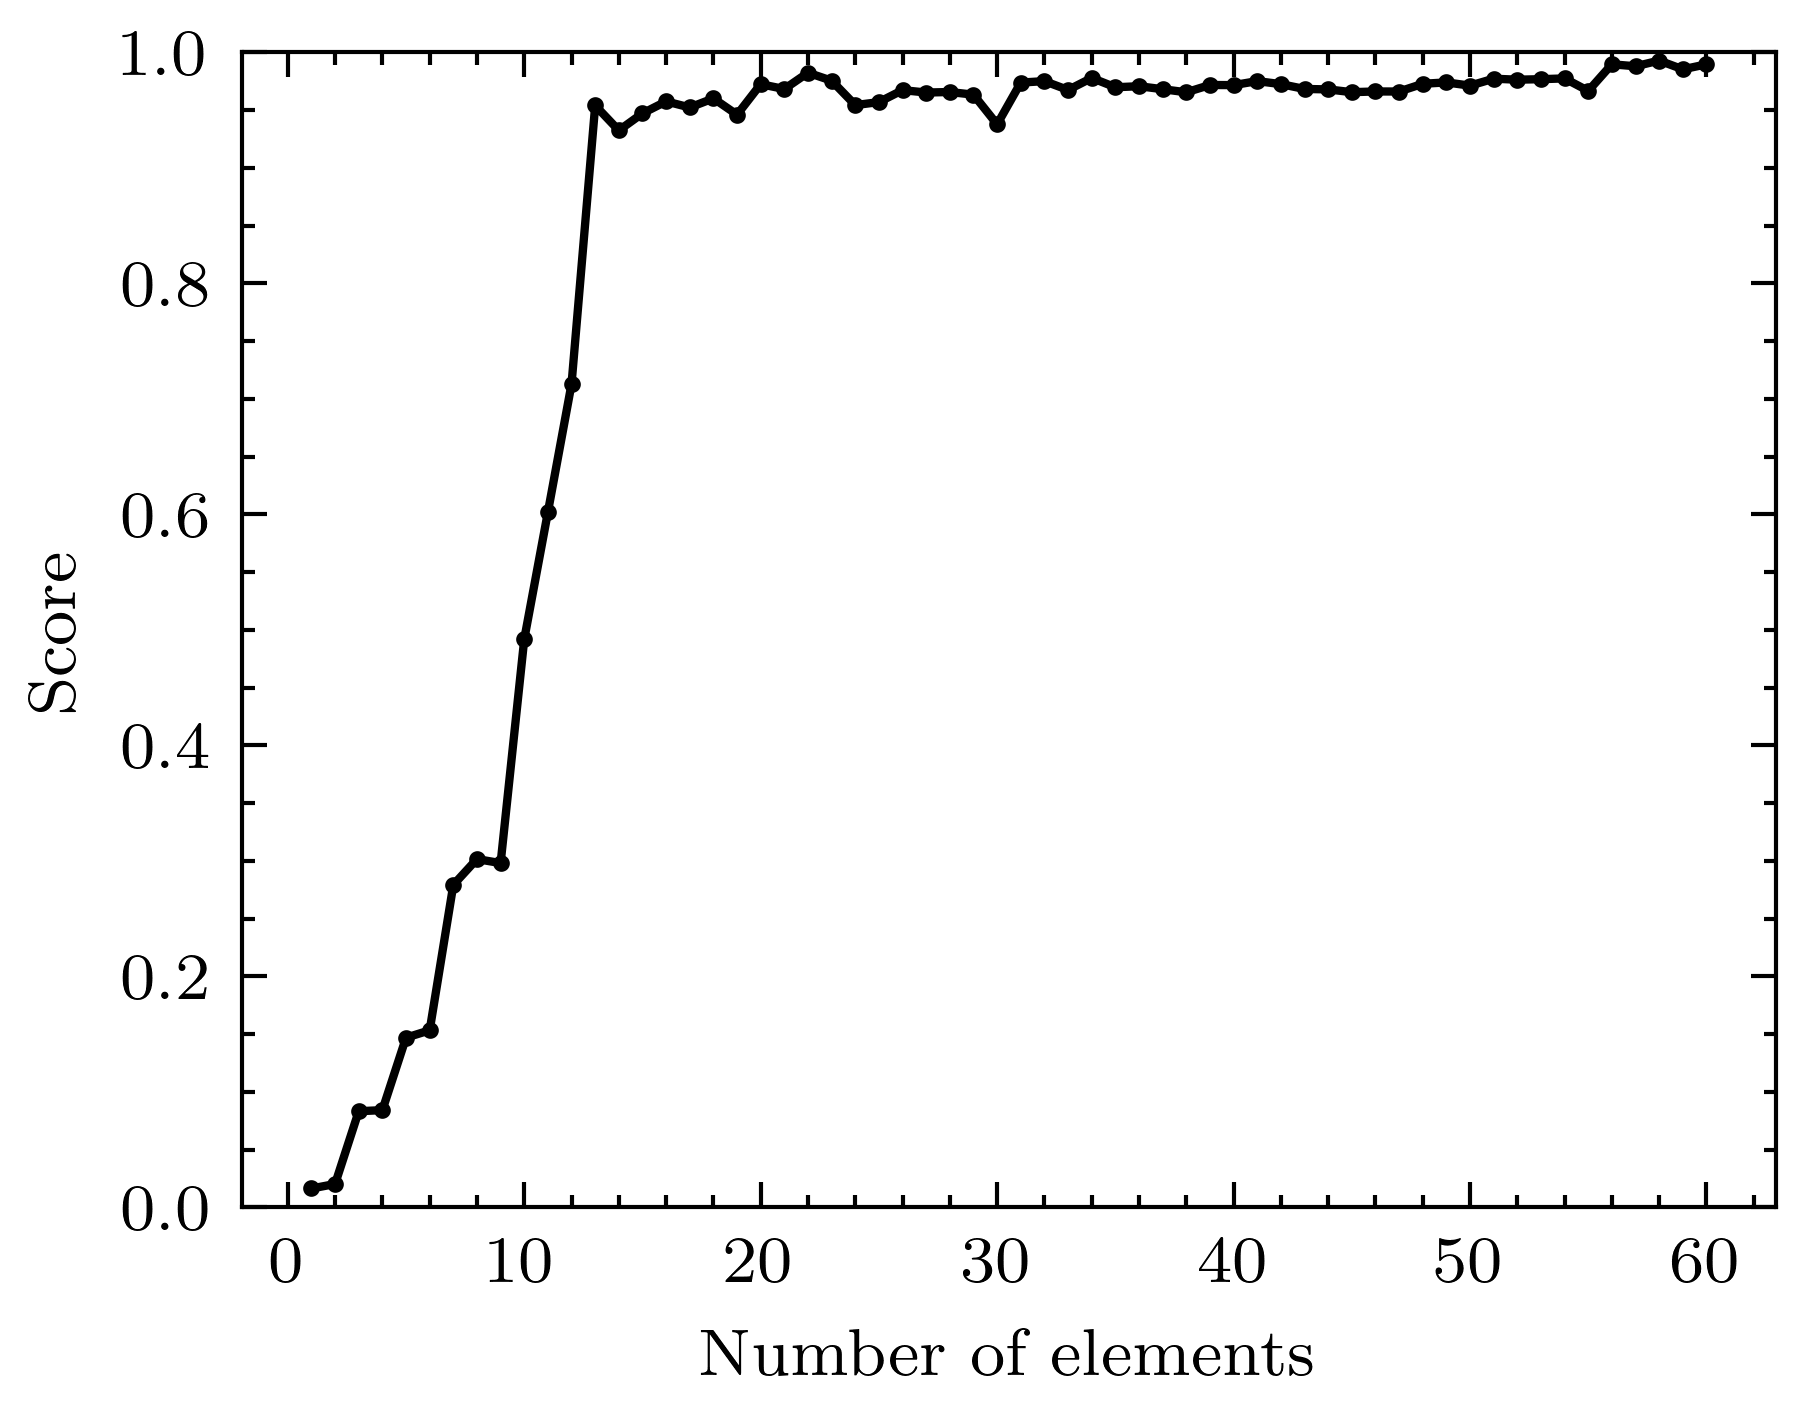

In [172]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

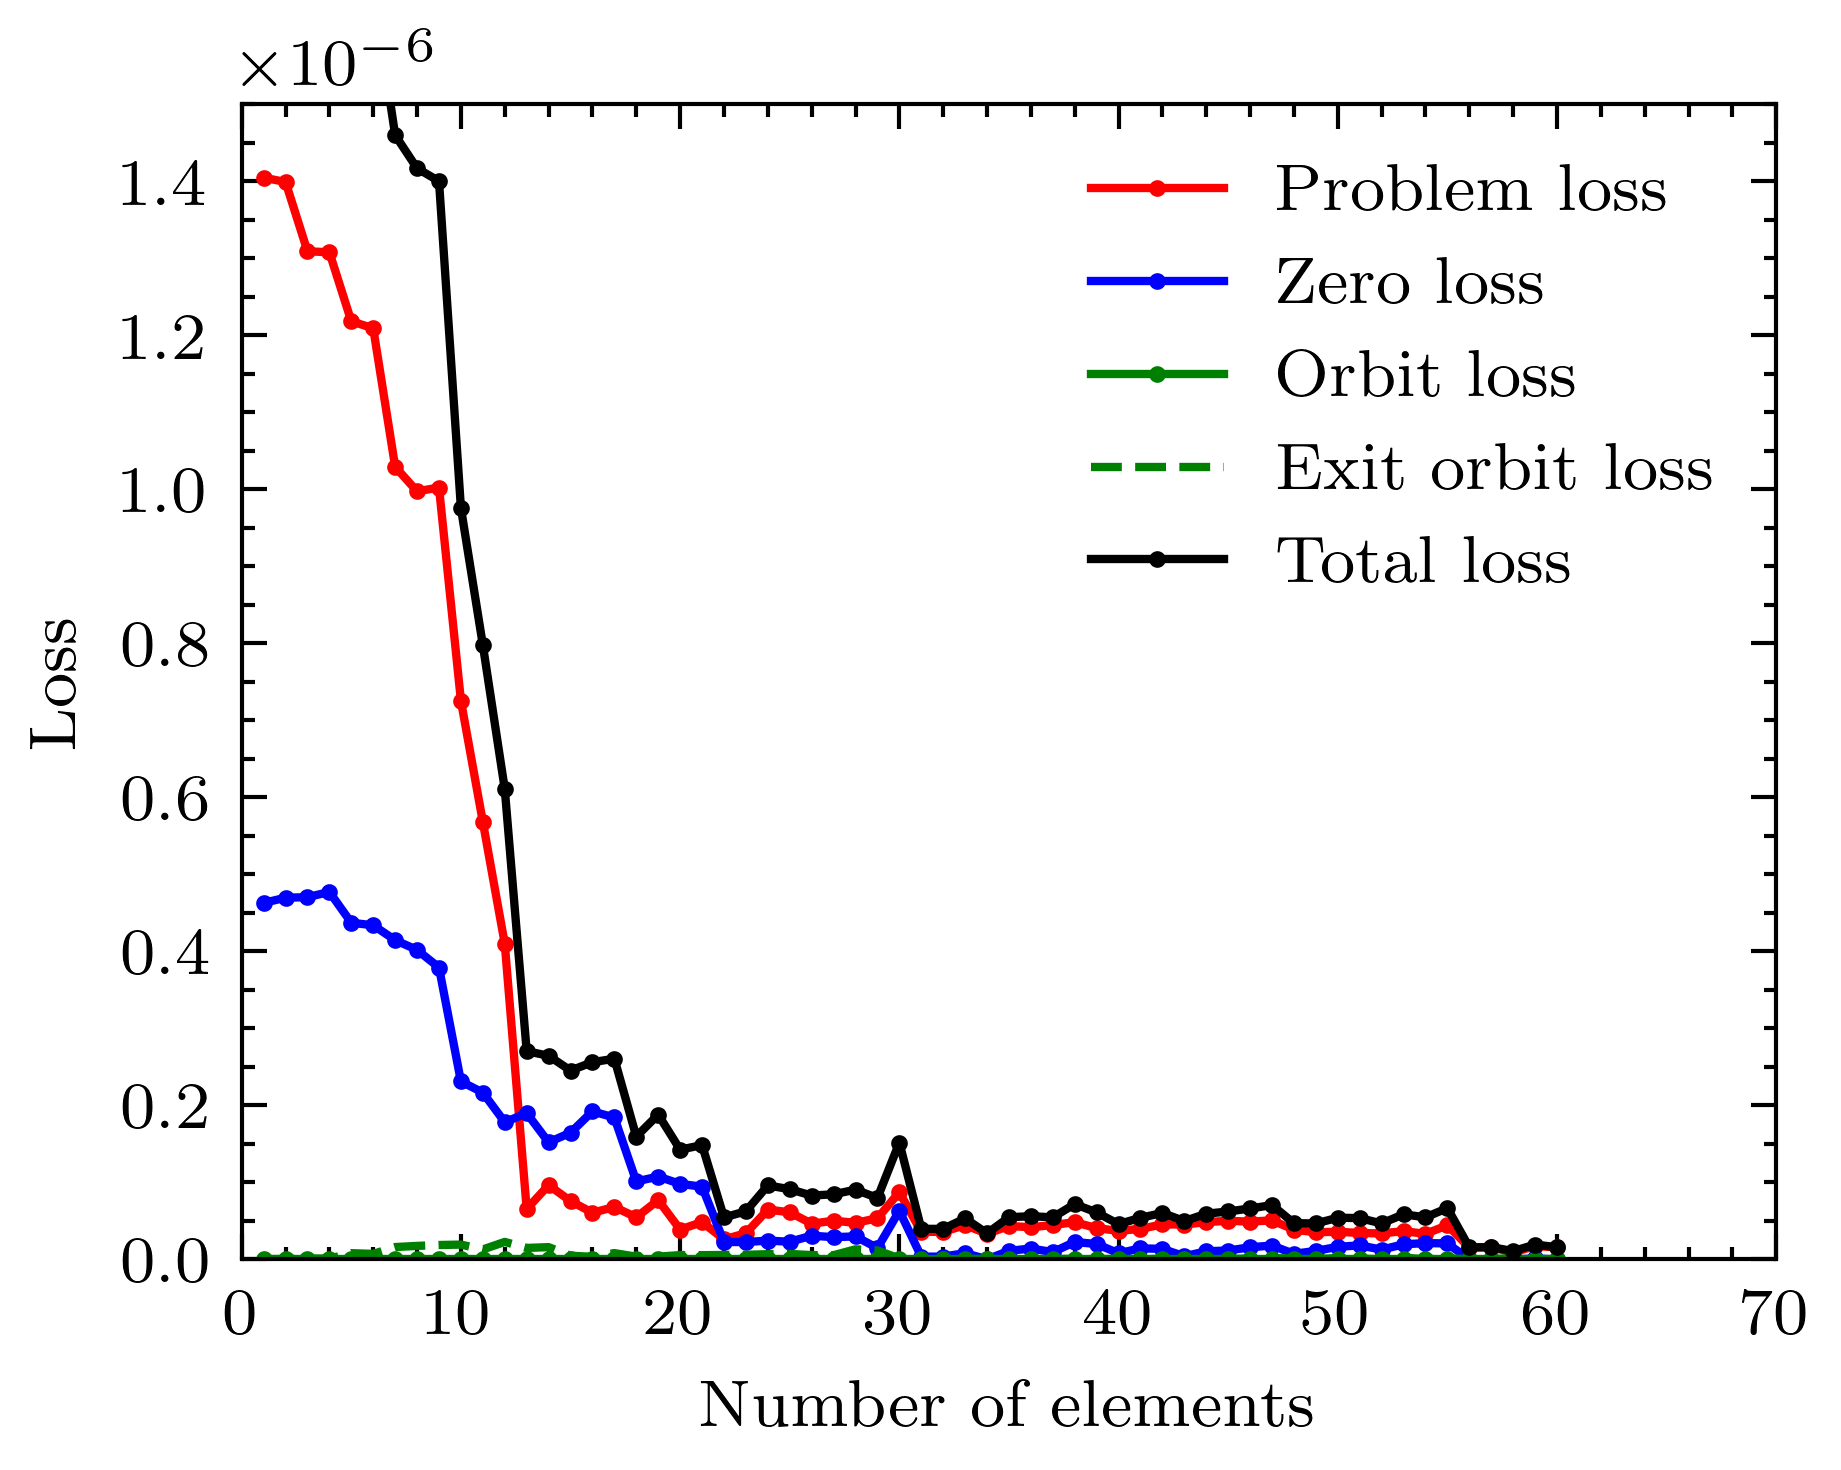

In [173]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()

Knob **Y10**

In [178]:
FOLDER = "data/learning_storage/forward_backward/Y10_omp_zero"

tmp = gather_data3(FOLDER)
omp_stats = tmp.sort_values(by = ['n_features'])
omp_stats['problem_loss'] = omp_stats.total_loss - omp_stats.orbit_loss - omp_stats.zero_loss - omp_stats.exit_orbit_loss

print(omp_stats)

Found 60 files.
         Regularization         alpha  n_features  \
0   regularizer_mod_5_4  5.000000e-07           1   
46  regularizer_mod_5_4  5.000000e-07           2   
43  regularizer_mod_5_4  5.000000e-07           3   
23  regularizer_mod_5_4  5.000000e-07           4   
31  regularizer_mod_5_4  5.000000e-07           5   
24  regularizer_mod_5_4  5.000000e-07           6   
27  regularizer_mod_5_4  5.000000e-07           7   
3   regularizer_mod_5_4  5.000000e-07           8   
58  regularizer_mod_5_4  5.000000e-07           9   
17  regularizer_mod_5_4  5.000000e-07          10   
22  regularizer_mod_5_4  5.000000e-07          11   
45  regularizer_mod_5_4  5.000000e-07          12   
20  regularizer_mod_5_4  5.000000e-07          13   
50  regularizer_mod_5_4  5.000000e-07          14   
39  regularizer_mod_5_4  5.000000e-07          15   
13  regularizer_mod_5_4  5.000000e-07          16   
57  regularizer_mod_5_4  5.000000e-07          17   
2   regularizer_mod_5_4  5.000

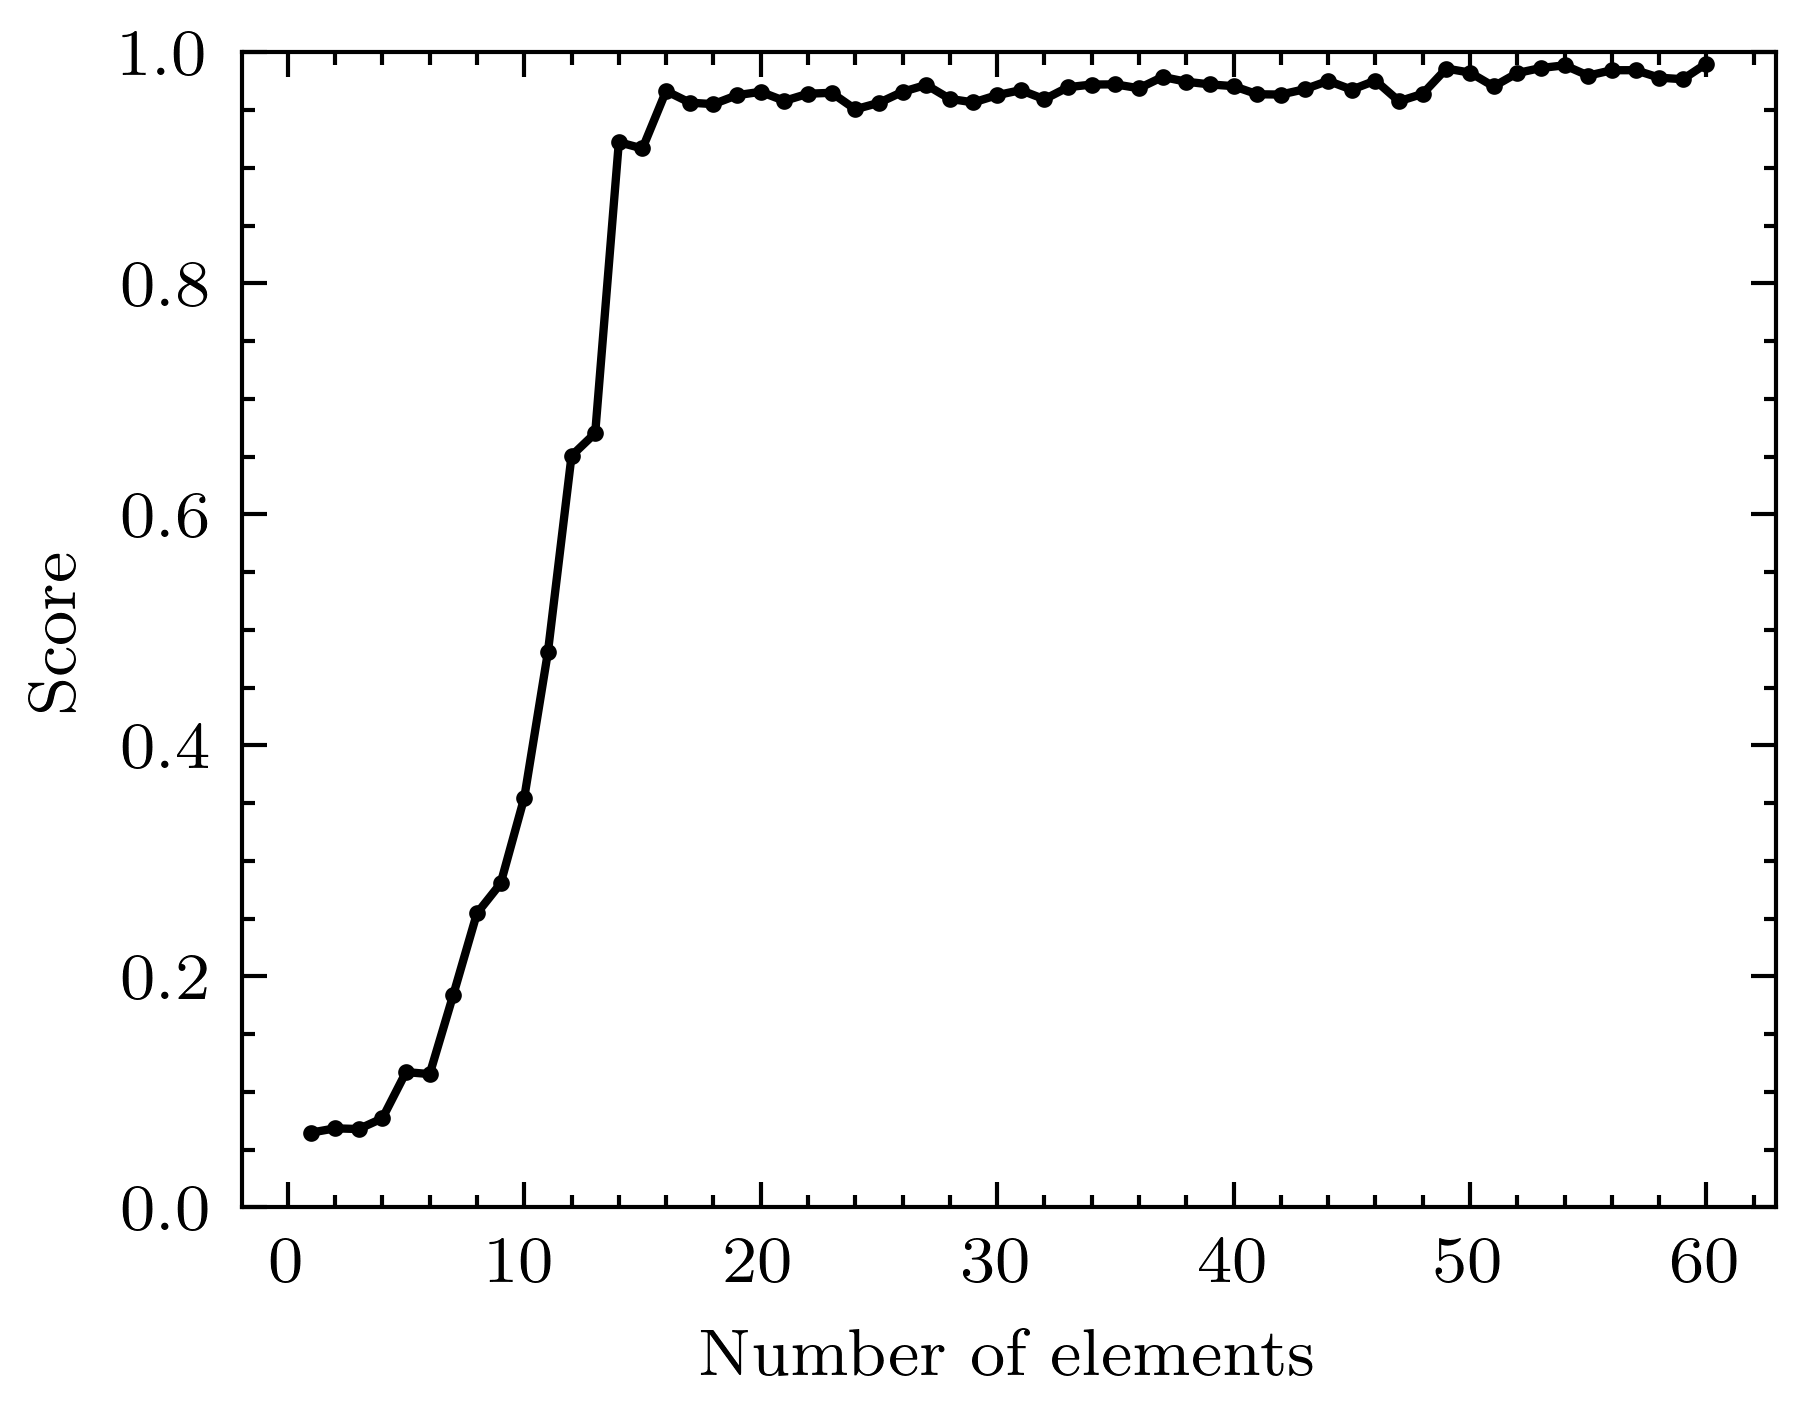

In [179]:
with plt.style.context(['science', 'ieee']):
    plt.plot(omp_stats['n_features'], omp_stats['score'], '-o', markersize = 1.0)
    
    plt.ylim(0.0, 1.0)
    plt.ylabel("Score")
    plt.xlabel("Number of elements")
    plt.show()

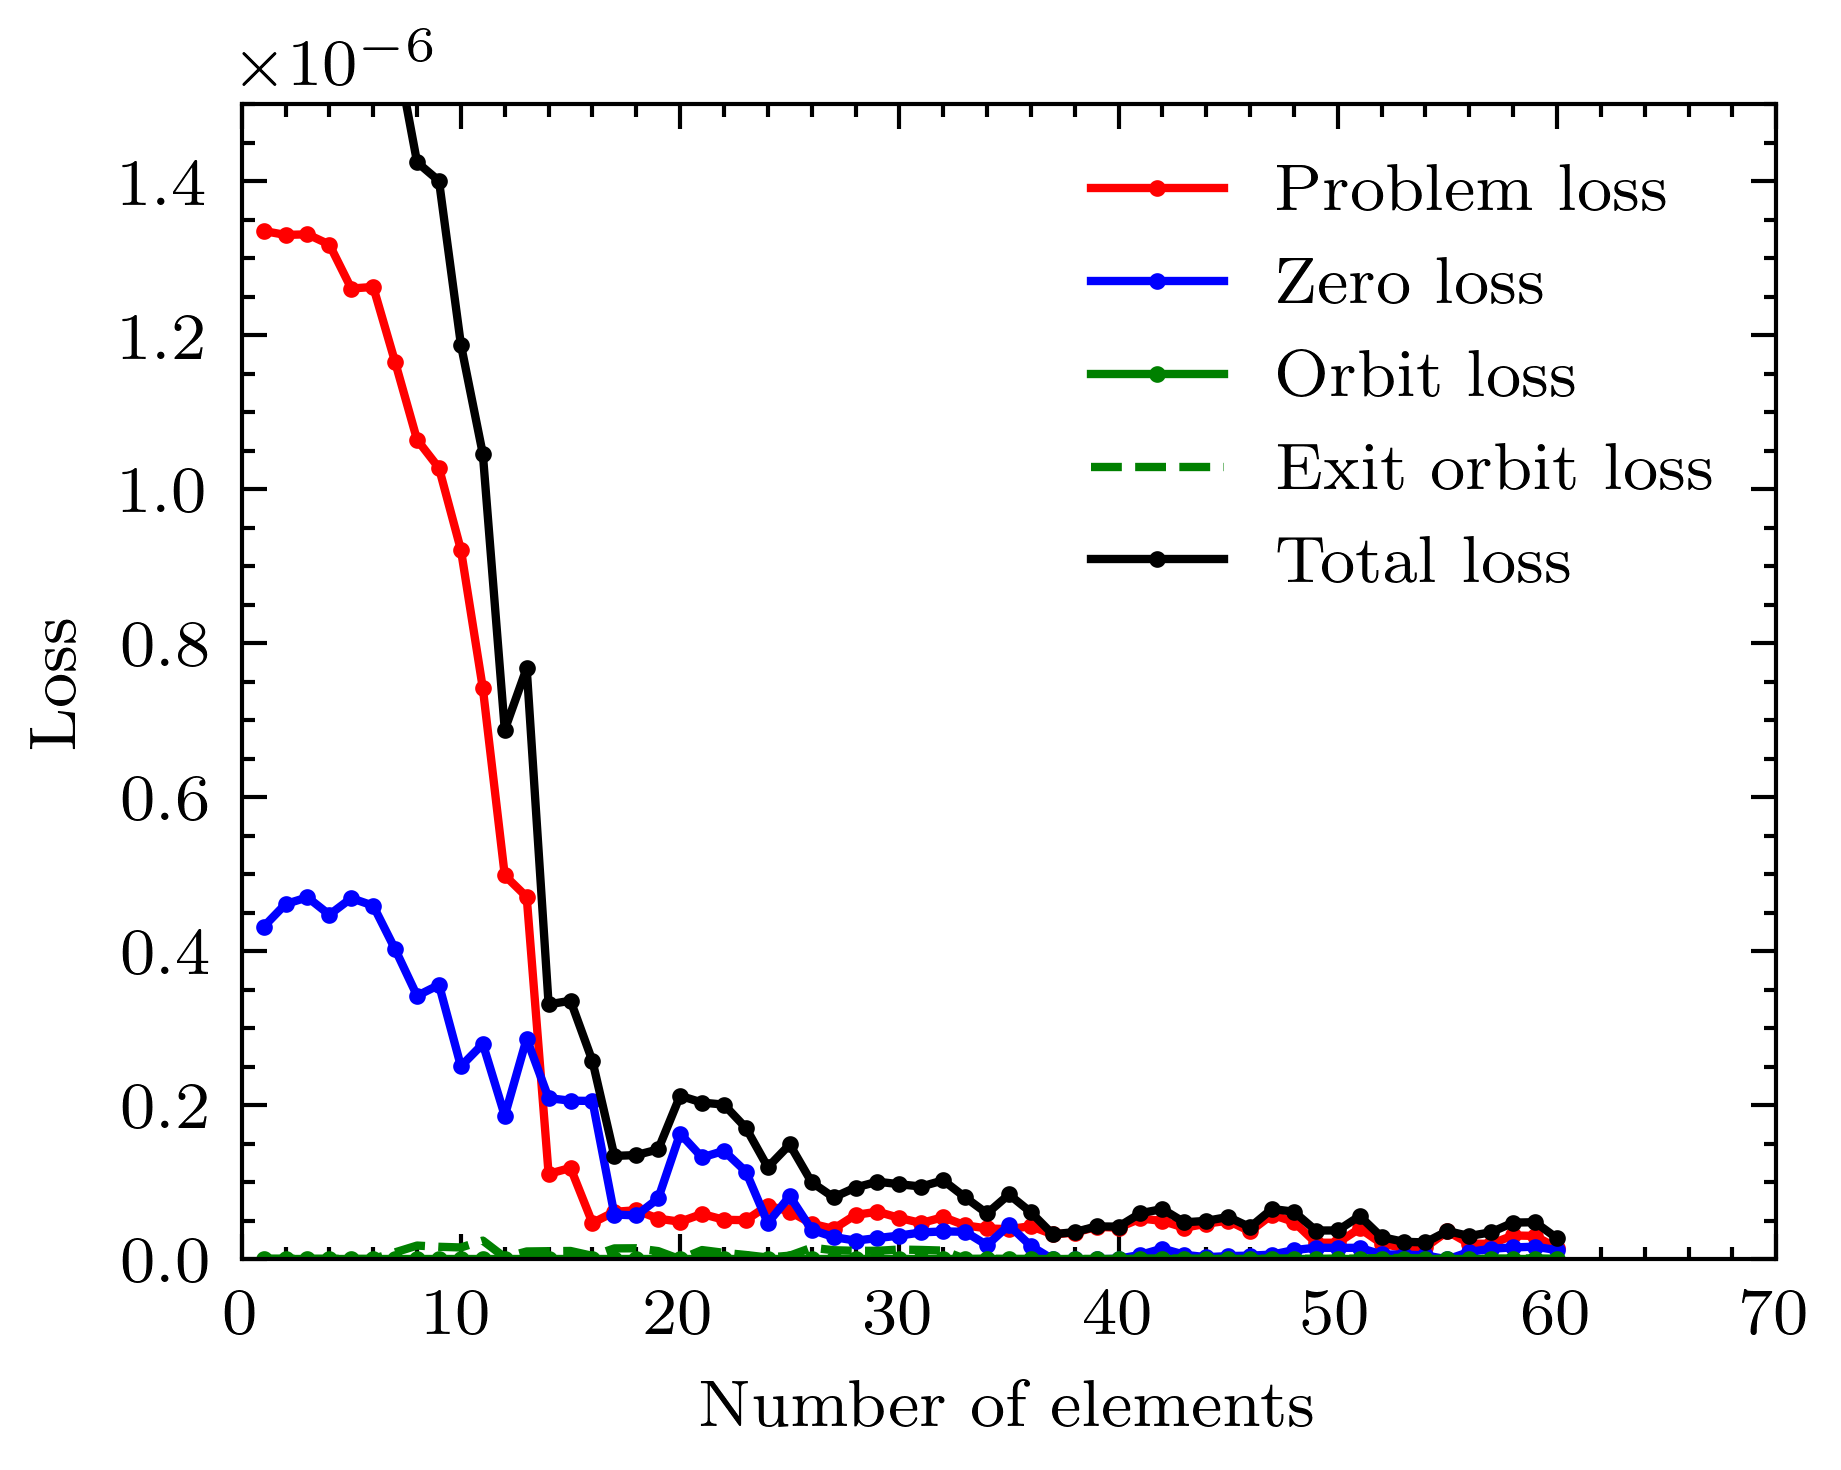

In [180]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(omp_stats.n_features, omp_stats.problem_loss, '-o', markersize = 1.0, label = "Problem loss", color = "red")
    plt.plot(omp_stats.n_features, omp_stats.zero_loss, '-o', markersize = 1.0, label = "Zero loss", color = "blue")
    plt.plot(omp_stats.n_features, omp_stats.orbit_loss, '-o', markersize = 1.0, label = "Orbit loss", color = "green")
    plt.plot(omp_stats.n_features, omp_stats.exit_orbit_loss, '--', markersize = 1.0, label = "Exit orbit loss", color = "green")

    plt.plot(omp_stats.n_features, omp_stats.total_loss, '-o', markersize = 1.0, label = "Total loss", color = "black")

    plt.xlim(0, 70)
    plt.ylim(0.0, 1.5e-6)
    
#    plt.yscale('log')
    plt.legend()
    plt.xlabel("Number of elements")
    plt.ylabel("Loss")
    plt.show()